In [2]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, hamming_loss, precision_score, recall_score, ndcg_score
import numpy as np

In [4]:
%load_ext autoreload
%autoreload 2

# from utils.DataClass import ProcessDNNTSP, ProcessSFCNTSP,ProcessGP, DataClass, ProcessLANET, ProcessTCMBN
from utils.DataClass import DataClass, ProcessFile, ProcessGP

from utils.Analysis import ModelComparison, Metric, ExperimentInfo
from utils.Analysis import avg_size_of_pred_set,  plot_label_distribution, kl_divergence, plot_probas_distribution, get_label_frequencies 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Здесь нужно определить два массива с метриками которые вы хотите взять
# metric_list - Это метрики которые считаются в постановке multilabel
# metric_list_for_labels - метрики которые считаются в постановке бинарной классификации
# массив metric_list_for_labels нужен для построение метрик per label

# в эти массивы вы передаете:
# 1. обьект функции метрики
# 2. 'pred_labels' или 'probas' в зависимости от того с чем работает метрика
# дело в том, что под капотом зашита своя стратегия выбора порогов, вместо взятия 
# обычного 0.5, которое делает sklearn, если передать ему вероятности, а не сами лейблы
# - именнованным аргументом name передаете как назвать метрику(для отображения на графиках)
# если этот параметр не передать, по умолчанию будет взят
# metric_func + str(kwargs)
# - далее передаете желаемые аргументы kwargs, которые вы можете захотеть подставить в
# саму метрику. Например, передавая параметр average=<...> в инициализатор
# при вызове соотвествующей метрики, этот параметр будет подставлен


metric_list_for_set_sizes = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted', zero_division=1.0),
    Metric(hamming_loss, 'pred_labels'),
]

metric_list = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted'),
    Metric(hamming_loss, 'pred_labels'),
    Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),
    Metric(ndcg_score, 'probas', name=f'ndcg {10}', k=10)
    
]

    # Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),


metric_list_for_labels = [
    Metric(accuracy_score, 'pred_labels'),
    Metric(precision_score, 'pred_labels')
]

## Updated Example

In [3]:
 # кастомный класс для загрузки и предобработки в нужный формат
 # создан по правилам описаным в readme

sfcntsp = ProcessFile('DC_preprocessed', '/app/All_models/model_pred_and_gt/SFCNTSP', 'SFCNTSP')
# передаю наследника класса processed dataset в DataClass

sfcntsp = DataClass(sfcntsp)

dnntsp = ProcessFile('DC_preprocessed', '/app/All_models/model_pred_and_gt/DNNTSP', 'DNNTSP')
dnntsp = DataClass(dnntsp)

lanet = ProcessFile('DC_preprocessed', '/app/All_models/model_pred_and_gt/LANET', 'LANET')
lanet = DataClass(lanet)

gp = ProcessGP('DC_preprocessed', '/app/MyGP_topfreq/model_pred_and_gt')

tcmbn = ProcessFile('DC_preprocessed', '/app/All_models/model_pred_and_gt/TCMBN', 'TCMBN')
tcmbn = DataClass(tcmbn)


# В инициализатор класса ModelComparison
# передаем обьекты DataClass, от разных моделей на одном датасете, которые мы хотим сравнивать
# Во время инициализации произойдет проверка того что данные получены из одного датасета
# И соотвествующие сообщения будут распечатаны
test_comp = ModelComparison(sfcntsp, dnntsp, lanet, gp, tcmbn)

# У обьекта класса ModelComparison вызываете метод evaluate_and_save
# он построит все графики, посчитает метрики и сохранит их
# при подсчете будут использованы метрики,  которые вы перечислили в массивах выше
# также есть именованные параметры show и save
# show отвечает за вывод графиков(при False, графики не будут выведены),
# нужен чтобы не засорять вывод если нужно
# save отвечает за сохранение

test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)


## Dunnhumby Carbo analysis 

In [ ]:
# def eval_dataset(dataset_name) -> ModelComparison:

#     sfcntsp = ProcessFile(dataset_name, '/app/All_models/model_pred_and_gt/SFCNTSP', 'SFCNTSP')
#     sfcntsp = DataClass(sfcntsp)

#     dunnhumby_dnntsp = ProcessFile(dataset_name,  '/app/All_models/model_pred_and_gt/DNNTSP', 'DNNTSP')
#     dunnhumby_dnntsp = DataClass(dunnhumby_dnntsp)

#     dunnhumby_gp = ProcessGP(dataset_name)
#     dunnhumby_gp = DataClass(dunnhumby_gp)

#     dunnhumby_lanet = ProcessLANET(dataset_name)
#     dunnhumby_lanet = DataClass(dunnhumby_lanet)
    
#     dunnhumby_tcmbn = ProcessTCMBN(dataset_name)
#     dunnhumby_tcmbn = DataClass(dunnhumby_tcmbn)

#     print('Running tests... ')
    
#     test_comp = ModelComparison(dunnhumby_sfcntsp_dataclass, dunnhumby_dnntsp, dunnhumby_lanet, dunnhumby_gp, dunnhumby_tcmbn)
#     # test_comp = ModelComparison(dunnhumby_sfcntsp_dataclass, dunnhumby_dnntsp, dunnhumby_lanet, dunnhumby_tcmbn)
#     print('Done')
#     return test_comp

In [19]:
test_comp = eval_dataset("DC_preprocessed")

Running tests... 
Experiments are performed on dataset with common name
Max set sizes are equal between datasets
All checks are succesful
Done


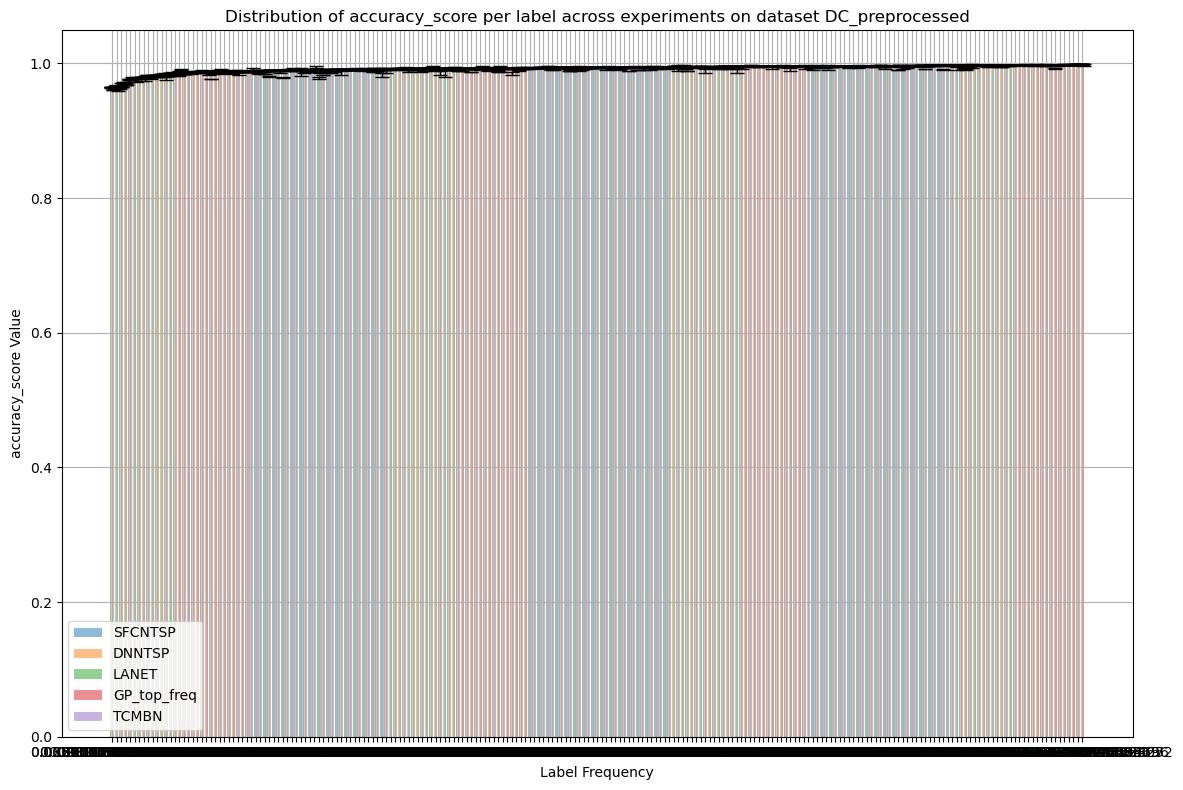

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

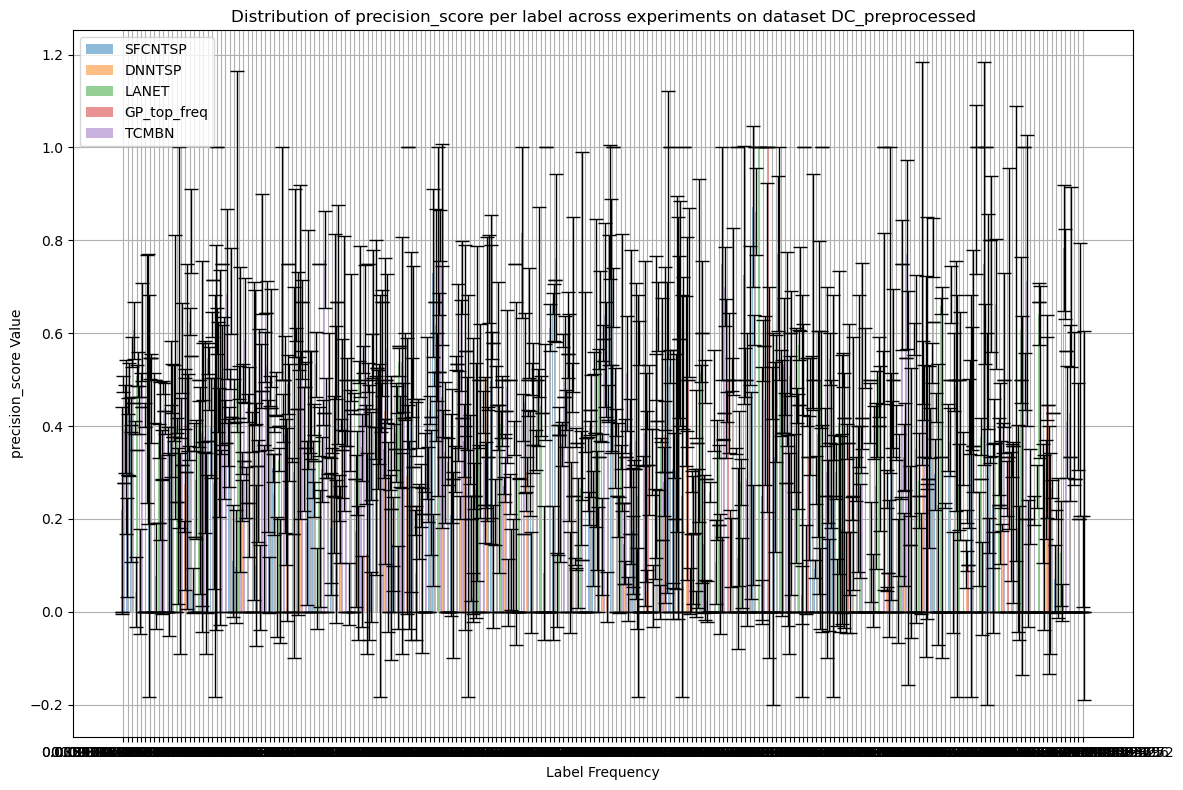

217
[0.00677026 0.00732519 0.00288568 0.00566038 0.00477248 0.00743618
 0.00210877 0.00421754 0.00621532 0.00743618 0.01032186 0.00788013
 0.00399556 0.00488346 0.00732519 0.00443951 0.00388457 0.0063263
 0.00532741 0.00665927 0.00554939 0.00643729 0.01642619 0.00765816
 0.00965594 0.00843507 0.01254162 0.00321865 0.00732519 0.00788013
 0.00521643 0.0127636  0.00721421 0.01043285 0.00432852 0.00355161
 0.00443951 0.00510544 0.00266371 0.00277469 0.00144284 0.00421754
 0.00854606 0.01021088 0.00654828 0.01176471 0.00221976 0.00610433
 0.00677026 0.00443951 0.01265261 0.00443951 0.00599334 0.00510544
 0.00477248 0.00332963 0.00887902 0.00466149 0.00554939 0.00499445
 0.00355161 0.02319645 0.01187569 0.00488346 0.00566038 0.0054384
 0.00277469 0.0099889  0.00643729 0.00721421 0.00554939 0.00754717
 0.00332963 0.00288568 0.00477248 0.0054384  0.0045505  0.0036626
 0.00266371 0.00266371 0.00255272 0.01187569 0.00421754 0.00266371
 0.00399556 0.00865705 0.00566038 0.01154273 0.00388457 0.004

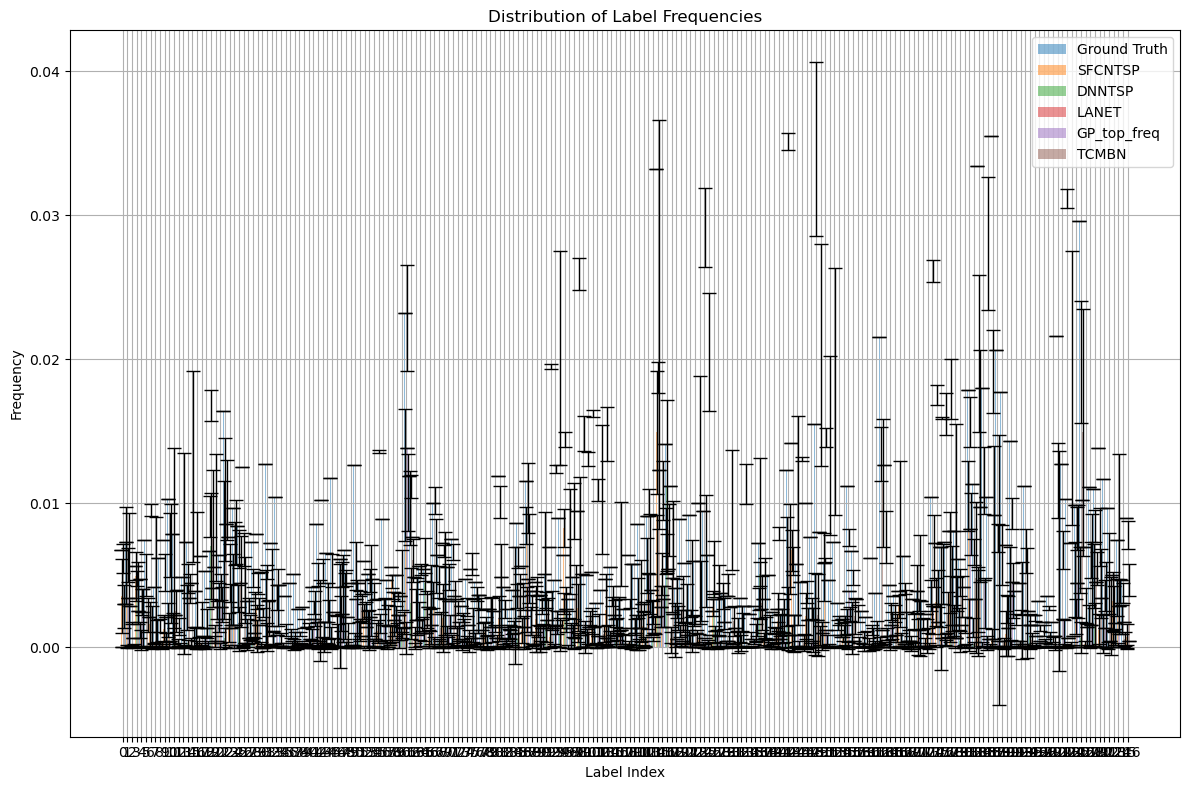

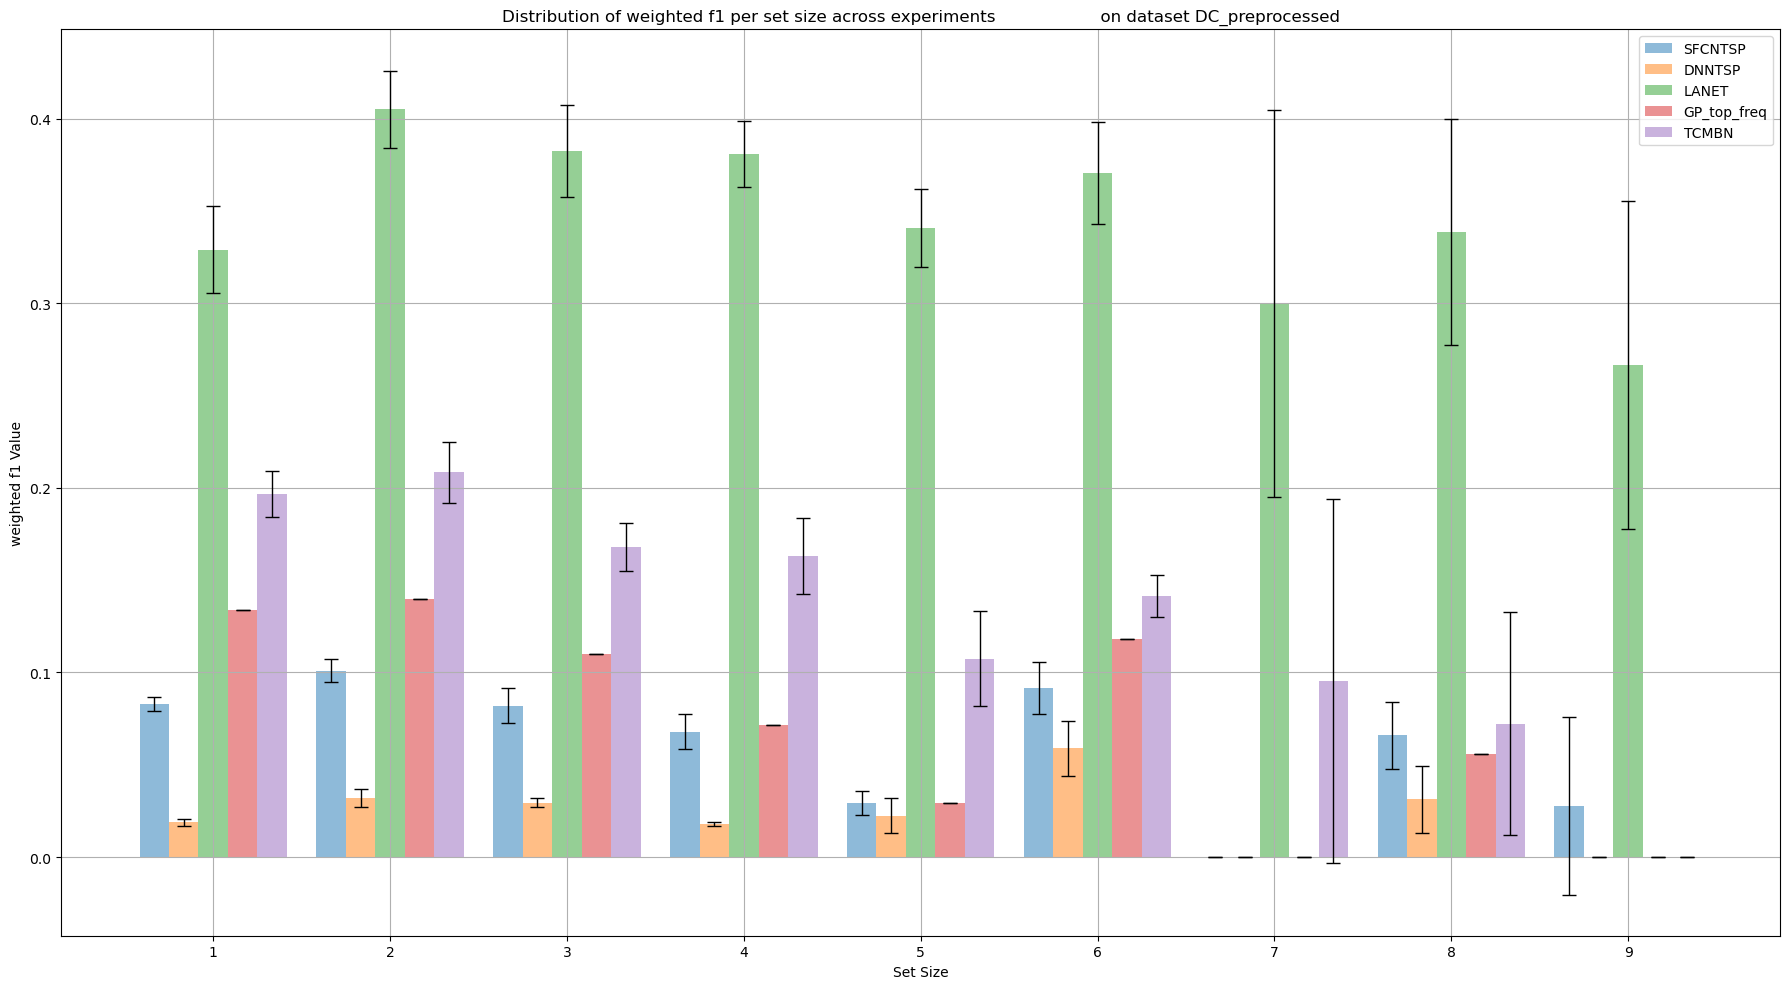

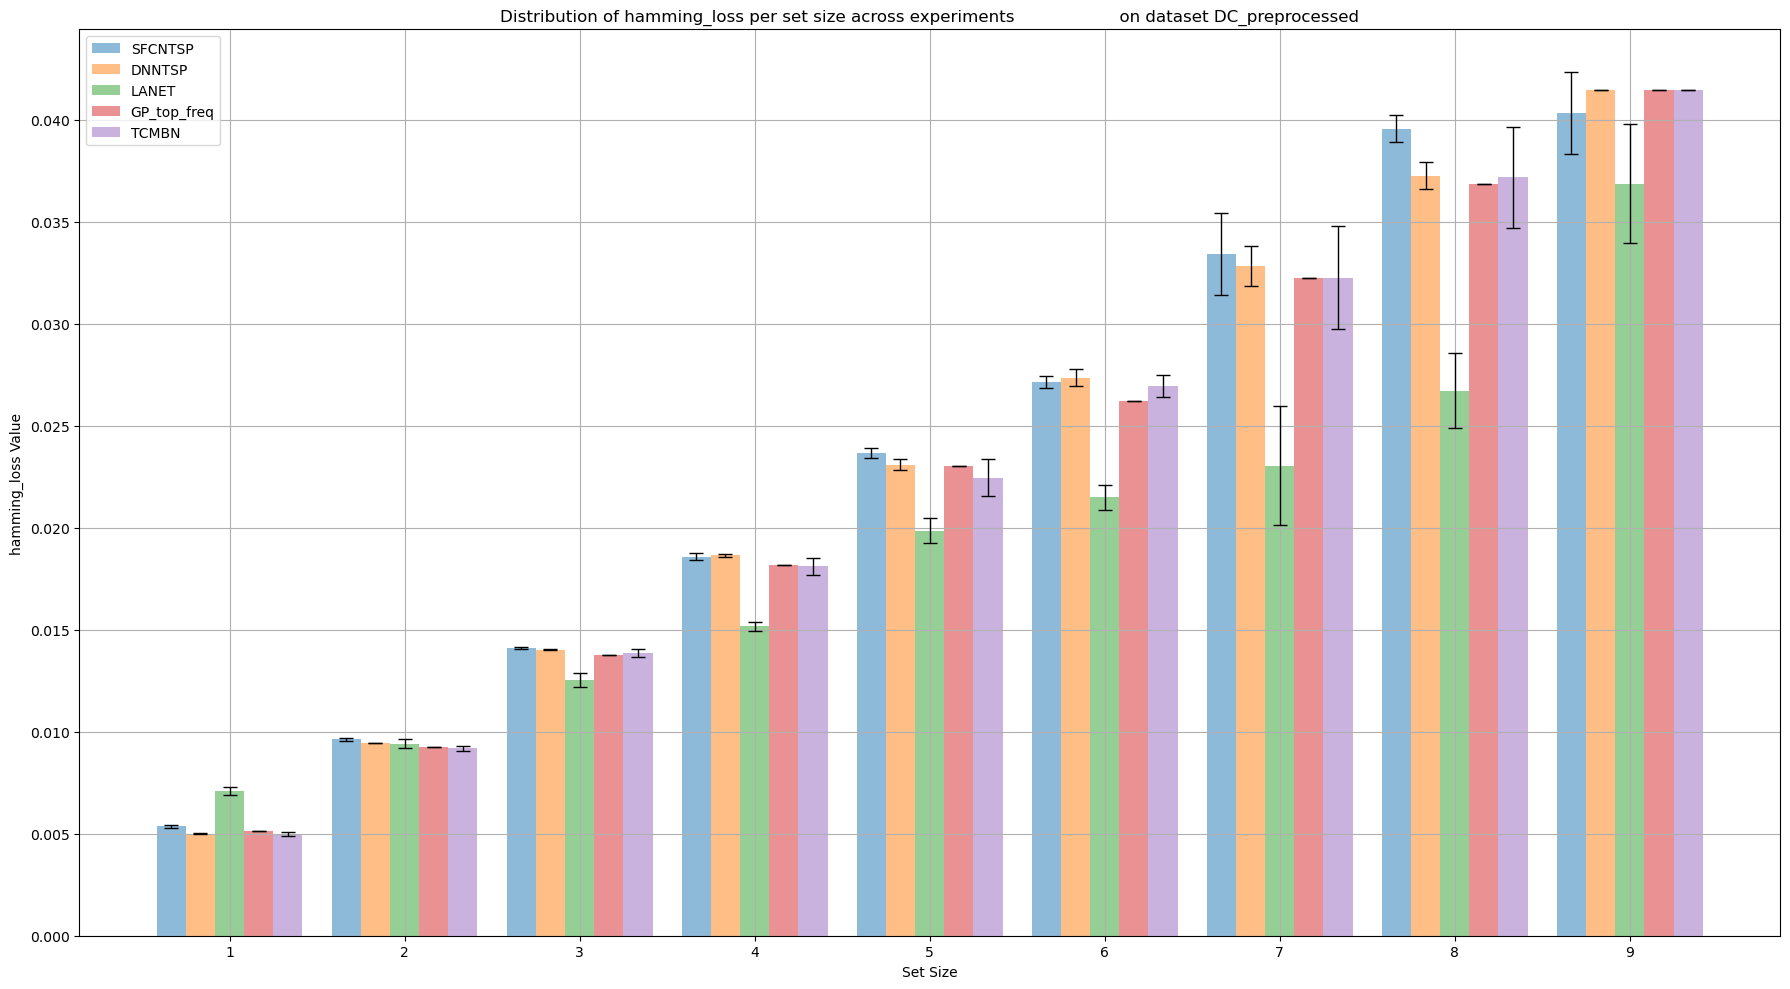

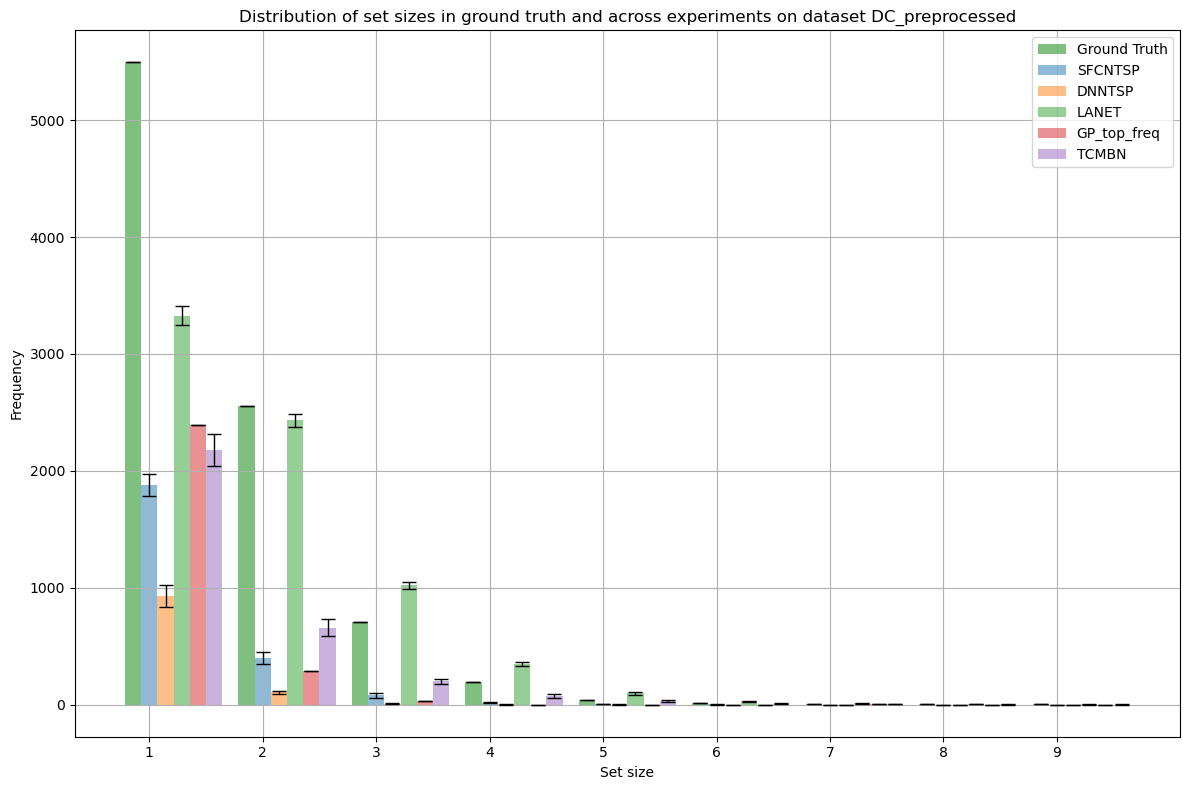

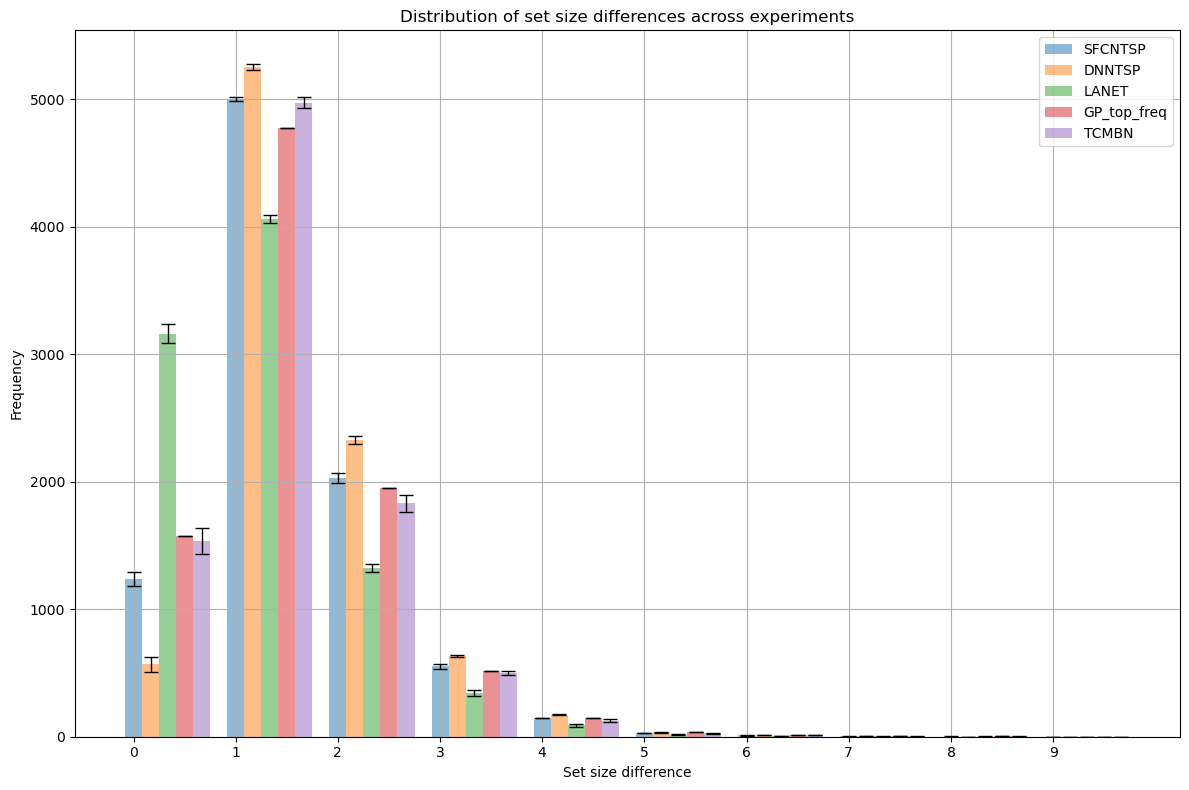

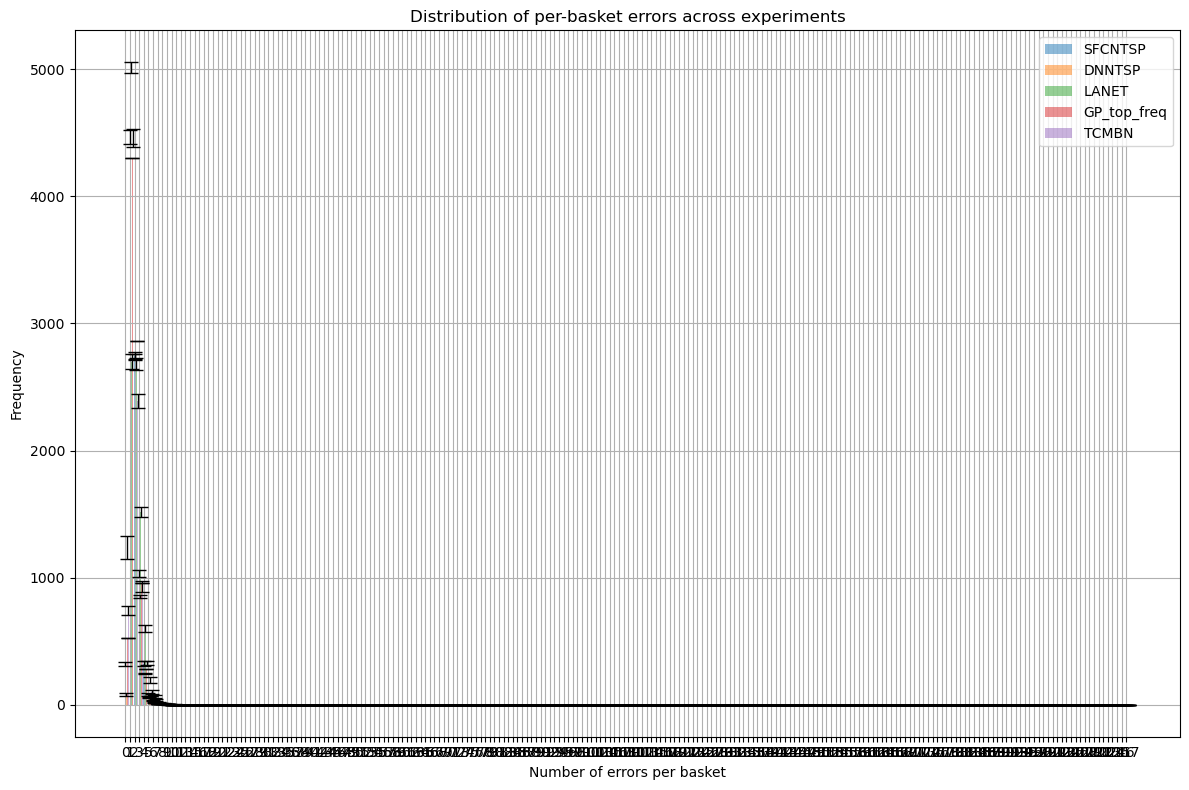

SFCNTSP    DNNTSP     LANET  GP_top_freq     TCMBN
weighted f1(mean)       0.088633  0.025881  0.361998     0.130695  0.196755
weighted f1(std)        0.005386  0.002735  0.022405     0.000000  0.013378
hamming_loss(mean)      0.007683  0.007407  0.008457     0.007417  0.007283
hamming_loss(std)       0.000073  0.000023  0.000210     0.000000  0.000104
weighted ROC AUC(mean)  0.701383  0.678385  0.985667     0.679749  0.893197
weighted ROC AUC(std)   0.002381  0.000025  0.001695     0.000000  0.004785
ndcg 10(mean)           0.306542  0.316819  0.669951     0.332947  0.419810
ndcg 10(std)            0.001933  0.000625  0.019761     0.000000  0.017960

In [20]:
test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)

## DunnHumby analysis

In [16]:
dataset_name = 'dunnhumby_preprocessed'

In [17]:
 # кастомный класс для загрузки и предобработки в нужный формат
 # создан по правилам описаным в readme
dunnhumby_sfcntsp = ProcessSFCNTSP(dataset_name)
dunnhumby_sfcntsp_dataclass = DataClass(dunnhumby_sfcntsp)

In [23]:

dunnhumby_dnntsp = ProcessDNNTSP(dataset_name)
# передаю наследника класса processed dataset в DataClass
dunnhumby_dnntsp = DataClass(dunnhumby_dnntsp)


In [24]:
dunnhumby_gp = ProcessGP(dataset_name)
dunnhumby_gp = DataClass(dunnhumby_gp)

In [25]:
dunnhumby_lanet = ProcessLANET(dataset_name)
dunnhumby_lanet = DataClass(dunnhumby_lanet)

In [26]:
dunnhumby_tcmbn = ProcessTCMBN(dataset_name)
dunnhumby_tcmbn = DataClass(dunnhumby_tcmbn)

In [27]:
# В инициализатор класса ModelComparison
# передаем обьекты DataClass, от разных моделей на одном датасете, которые мы хотим сравнивать
# Во время инициализации произойдет проверка того что данные получены из одного датасета
# И соотвествующие сообщения будут распечатаны
# test_comp = ModelComparison(dunnhumby_dnntsp, dunnhumby_sfcntsp, dunnhumby_gp)
test_comp = ModelComparison(dunnhumby_sfcntsp_dataclass, dunnhumby_dnntsp, dunnhumby_lanet, dunnhumby_gp, dunnhumby_tcmbn)

Experiments are performed on dataset with common name
Gt frequencies are equal between experiments
Max set sizes are equal between datasets
All checks are succesful


In [4]:
# Здесь нужно определить два массива с метриками которые вы хотите взять
# metric_list - Это метрики которые считаются в постановке multilabel
# metric_list_for_labels - метрики которые считаются в постановке бинарной классификации
# массив metric_list_for_labels нужен для построение метрик per label

# в эти массивы вы передаете:
# 1. обьект функции метрики
# 2. 'pred_labels' или 'probas' в зависимости от того с чем работает метрика
# дело в том, что под капотом зашита своя стратегия выбора порогов, вместо взятия 
# обычного 0.5, которое делает sklearn, если передать ему вероятности, а не сами лейблы
# - именнованным аргументом name передаете как назвать метрику(для отображения на графиках)
# если этот параметр не передать, по умолчанию будет взят
# metric_func + str(kwargs)
# - далее передаете желаемые аргументы kwargs, которые вы можете захотеть подставить в
# саму метрику. Например, передавая параметр average=<...> в инициализатор
# при вызове соотвествующей метрики, этот параметр будет подставлен

metric_list_for_set_sizes = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted', zero_division=1.0),
    Metric(hamming_loss, 'pred_labels'),
]

metric_list = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted'),
    Metric(hamming_loss, 'pred_labels'),
    Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),
    
]

    # Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),


metric_list_for_labels = [
    Metric(accuracy_score, 'pred_labels'),
    Metric(precision_score, 'pred_labels')
]

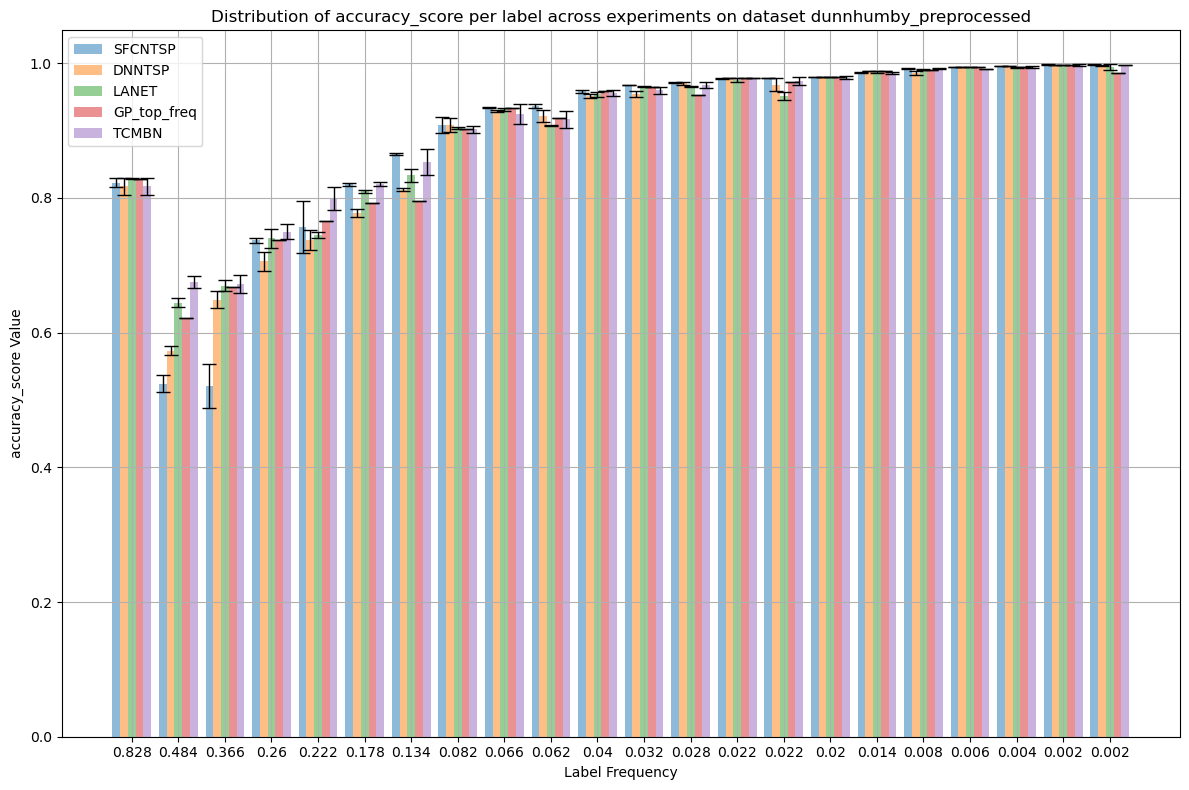

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

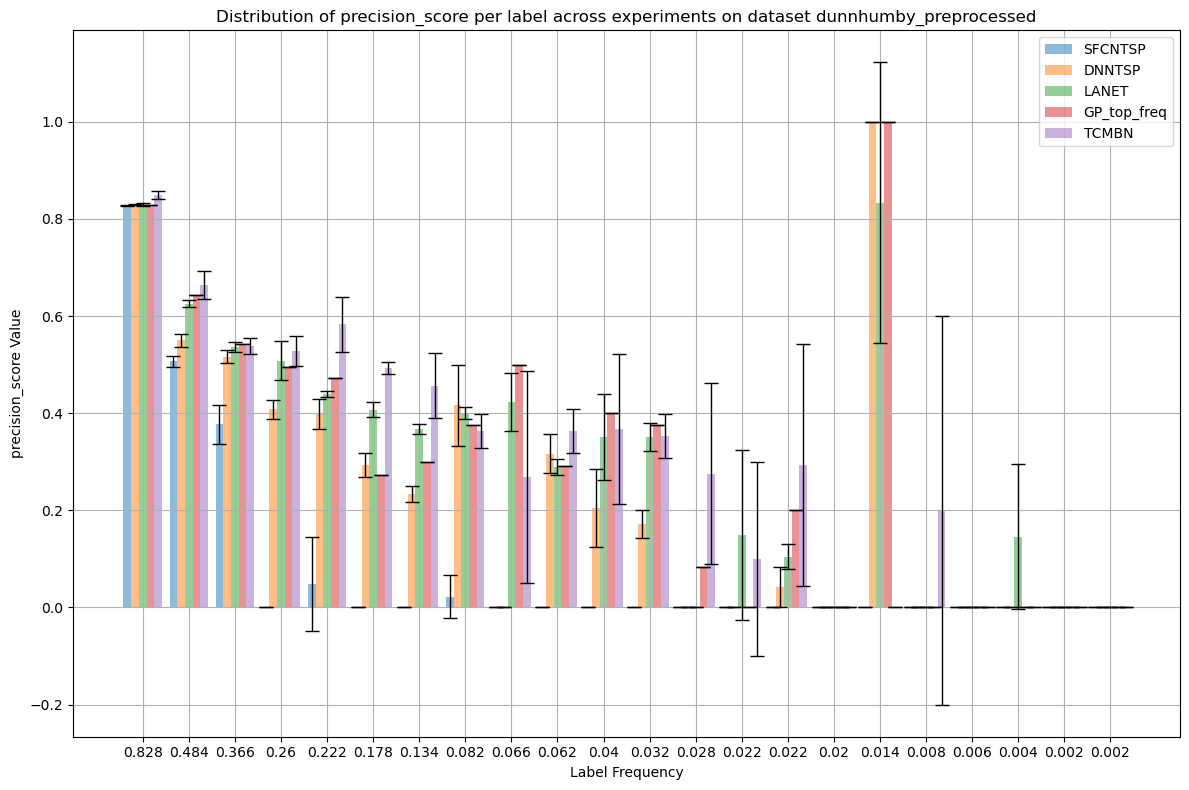

22
[0.04  0.002 0.022 0.002 0.178 0.484 0.02  0.004 0.828 0.082 0.222 0.26
 0.028 0.014 0.062 0.134 0.366 0.032 0.022 0.066 0.008 0.006]


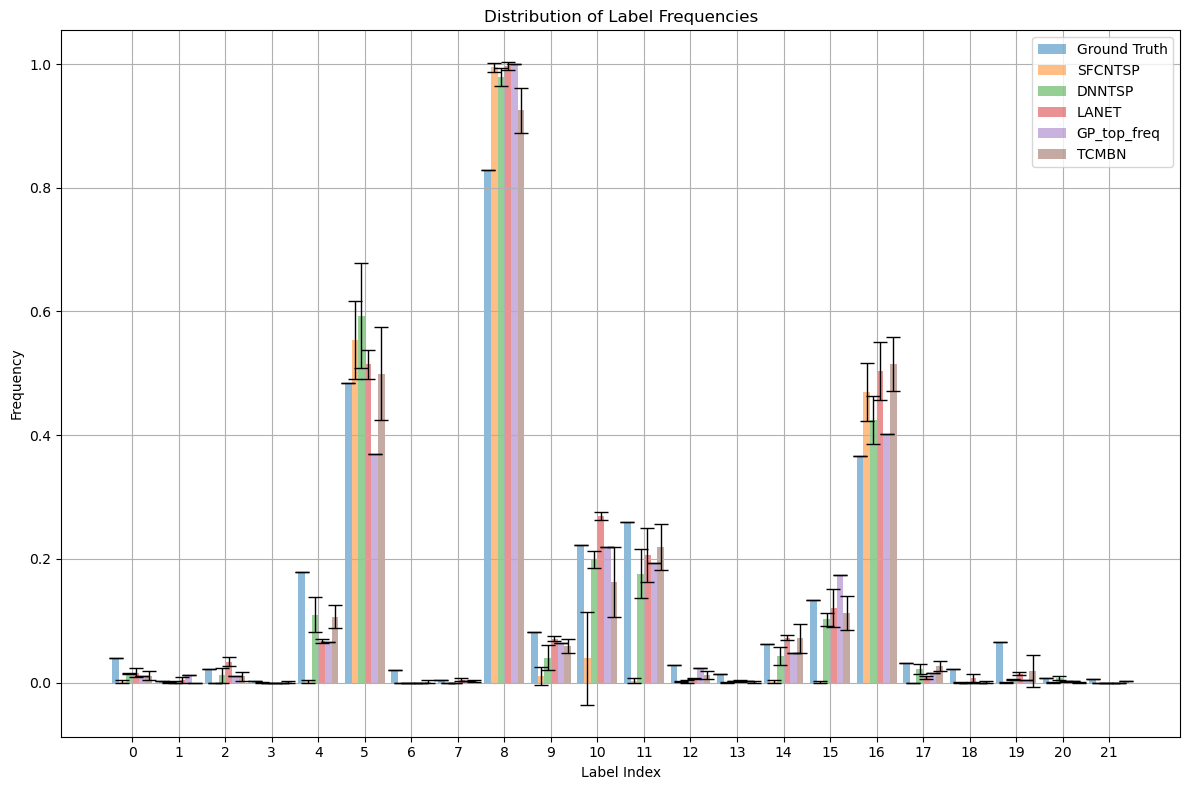

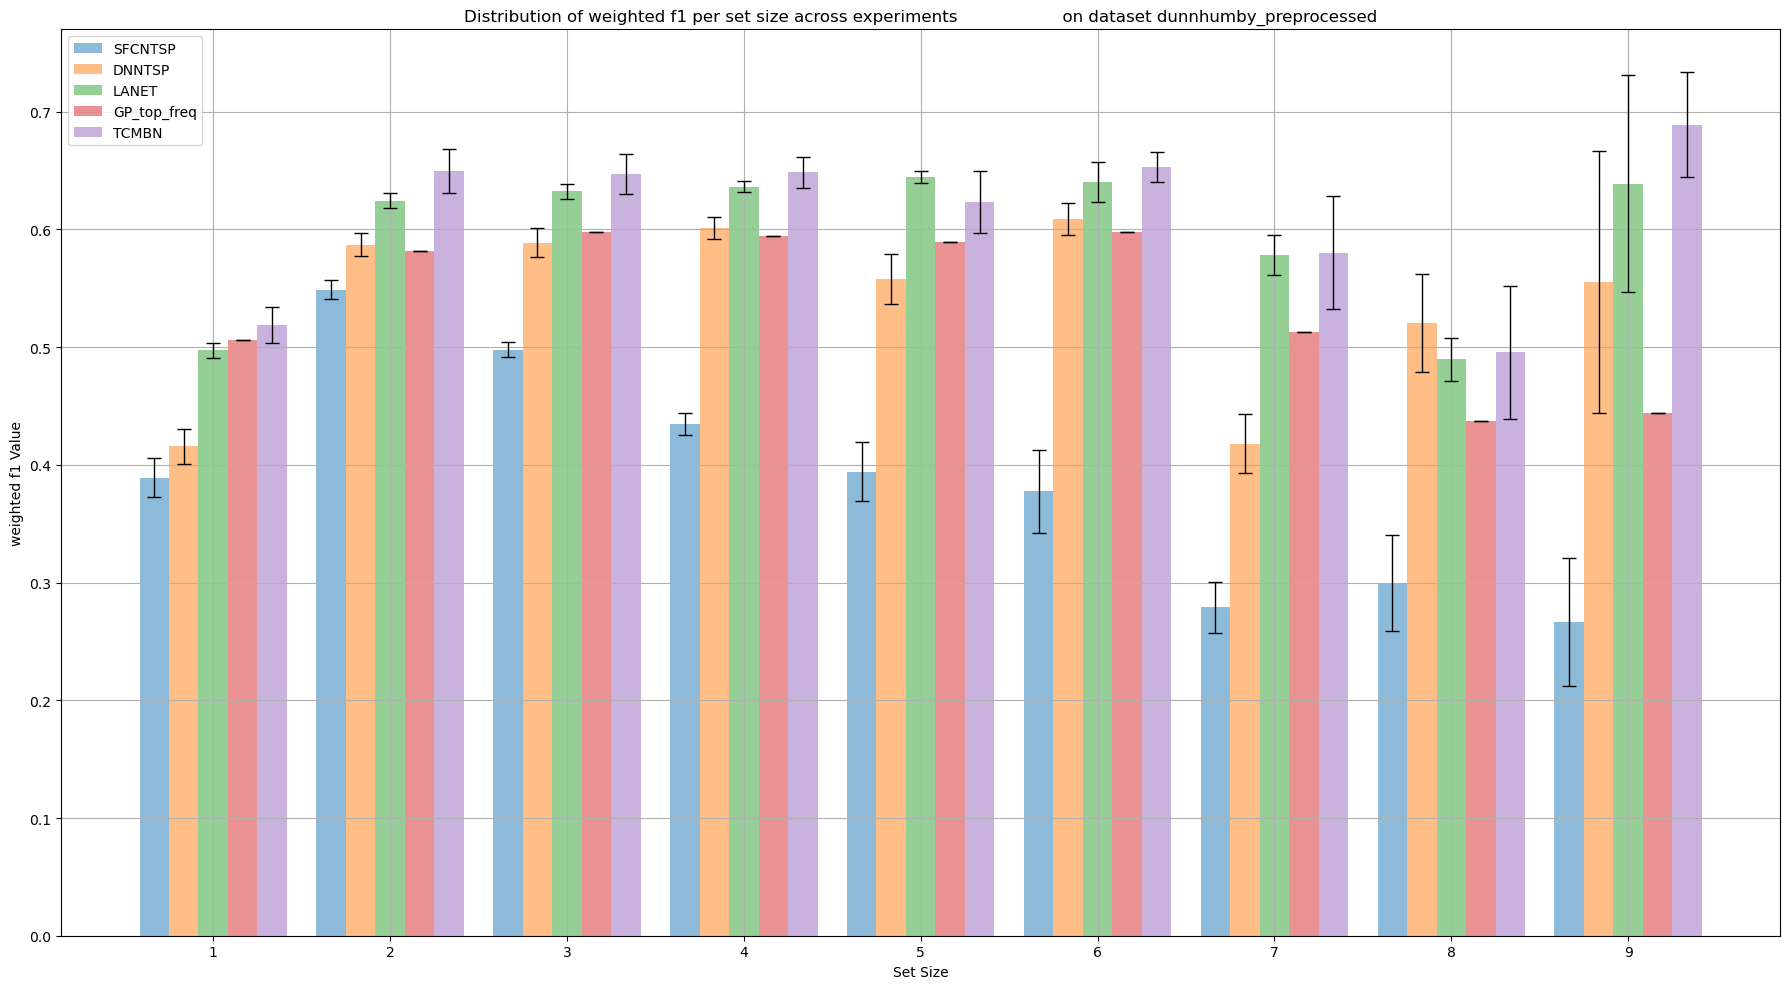

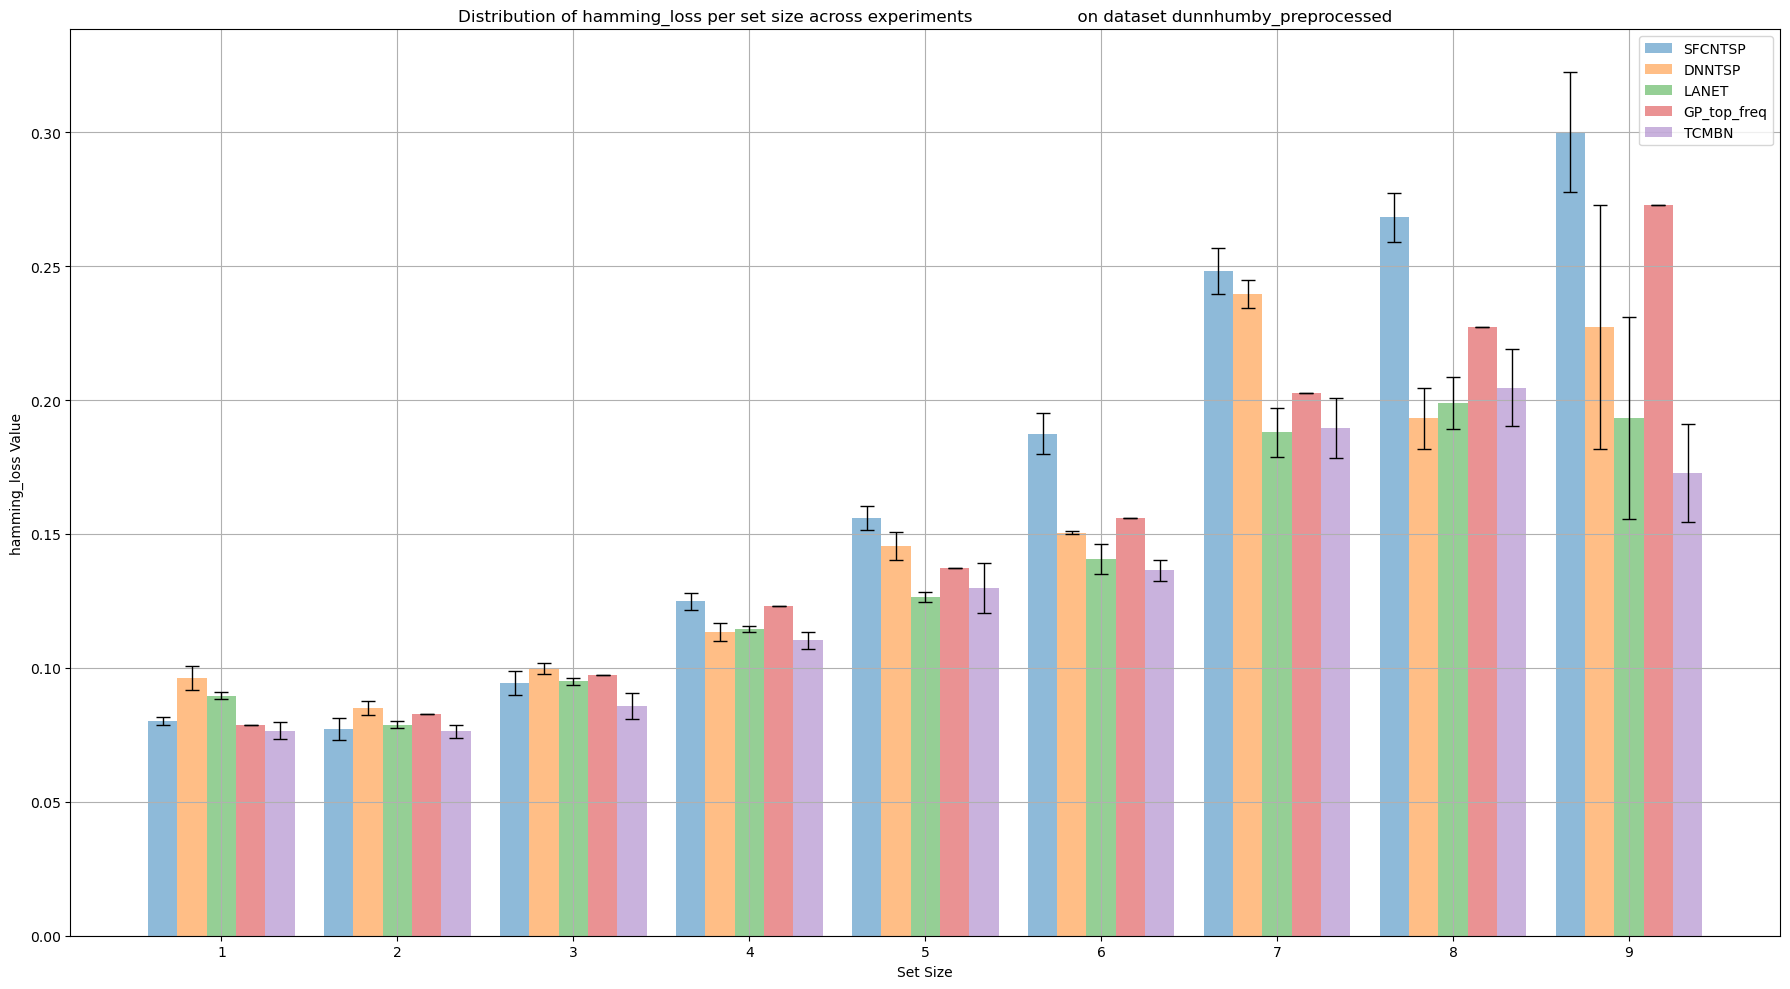

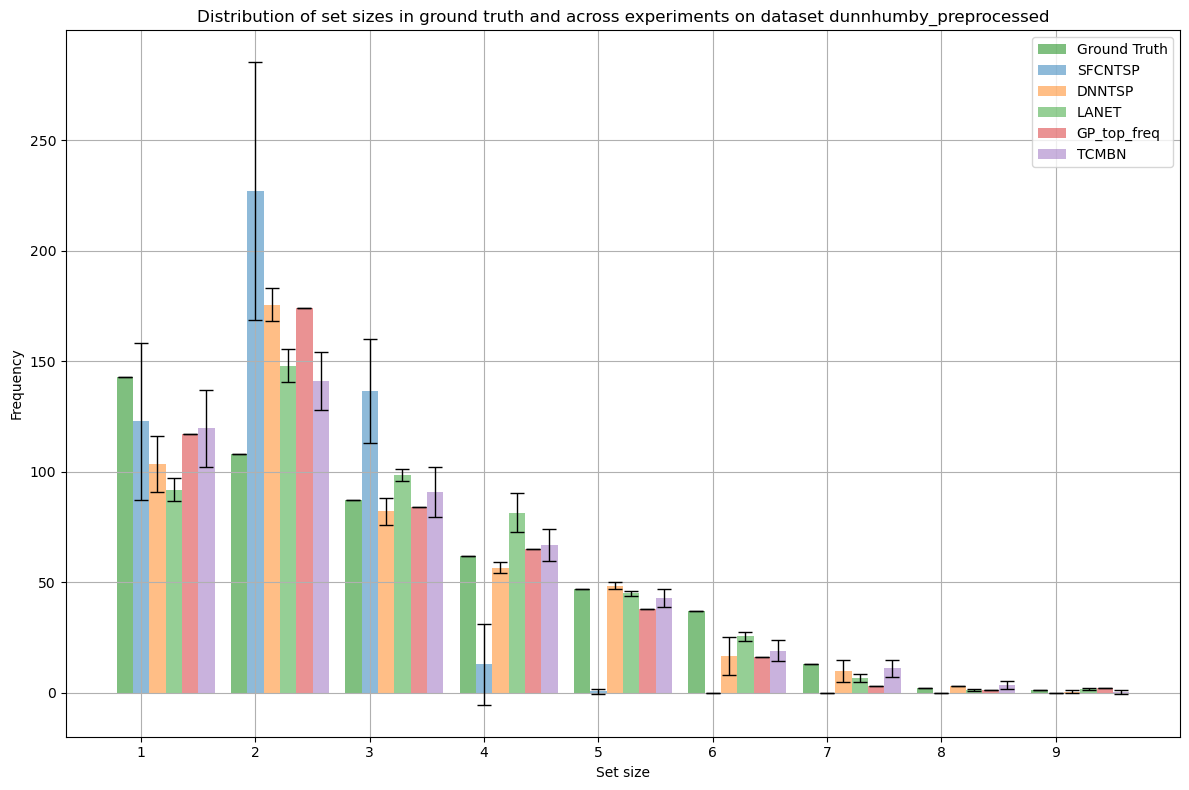

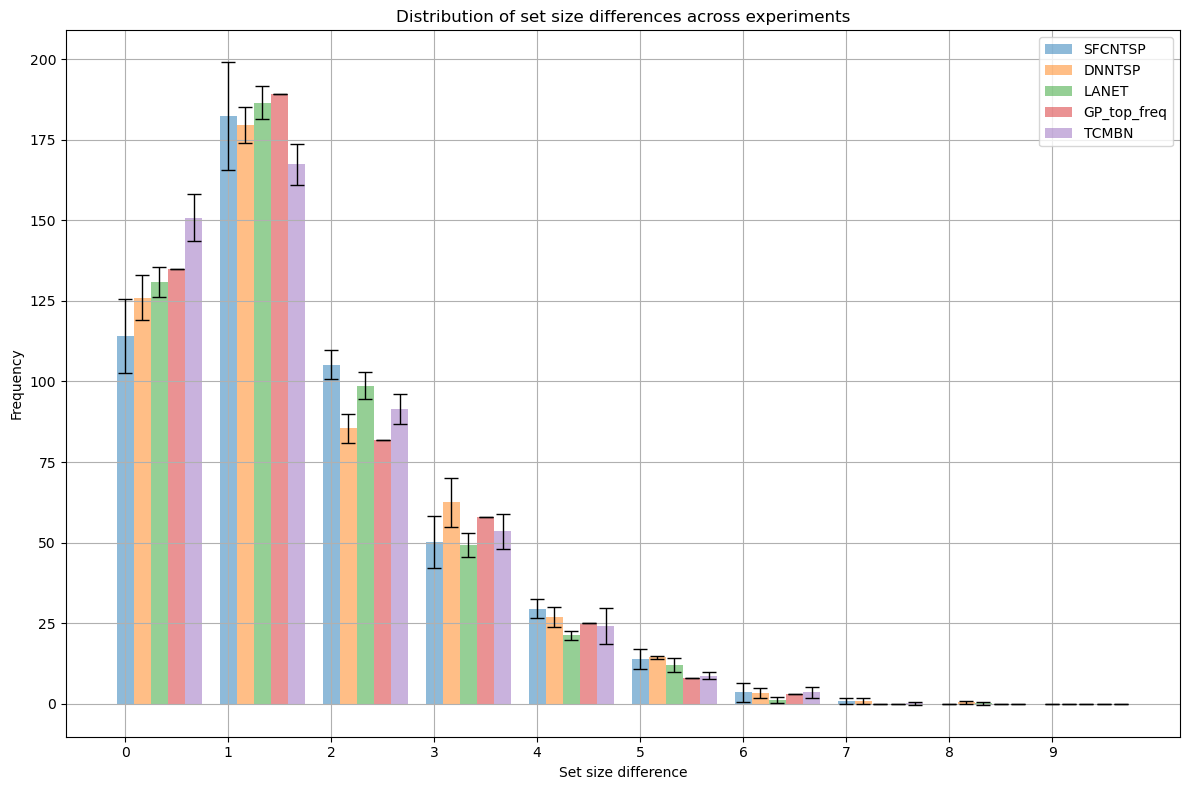

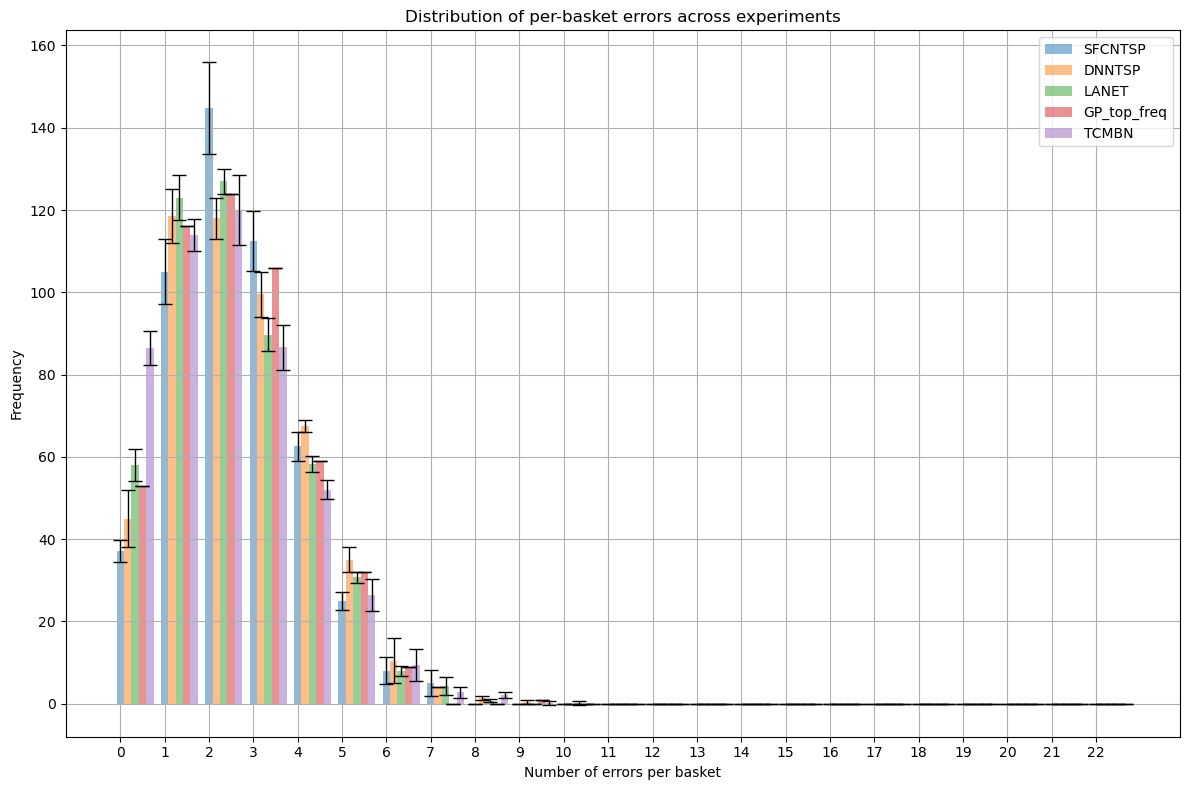

SFCNTSP    DNNTSP     LANET  GP_top_freq     TCMBN
weighted f1(mean)       0.407509  0.527610  0.581289     0.549235  0.597363
weighted f1(std)        0.007359  0.012627  0.002240     0.000000  0.009744
hamming_loss(mean)      0.108200  0.109591  0.101750     0.103727  0.095382
hamming_loss(std)       0.002039  0.001045  0.000433     0.000000  0.001915
weighted ROC AUC(mean)  0.528930  0.638166  0.698389     0.686894  0.769453
weighted ROC AUC(std)   0.010304  0.007189  0.011737     0.000000  0.010630

In [29]:
# У обьекта класса ModelComparison вызываете метод evaluate_and_save
# он построит все графики, посчитает метрики и сохранит их
# при подсчете будут использованы метрики,  которые вы перечислили в массивах выше
# также есть именованные параметры show и save
# show отвечает за вывод графиков(при False, графики не будут выведены),
# нужен чтобы не засорять вывод если нужно
# save отвечает за сохранение


test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)

## TMS Analysis

In [3]:
dataset_name = 'TMS'

In [4]:
 # кастомный класс для загрузки и предобработки в нужный формат
 # создан по правилам описаным в readme
dunnhumby_sfcntsp = ProcessSFCNTSP(dataset_name)
dunnhumby_sfcntsp_dataclass = DataClass(dunnhumby_sfcntsp)

In [5]:

dunnhumby_dnntsp = ProcessDNNTSP(dataset_name)
# передаю наследника класса processed dataset в DataClass
dunnhumby_dnntsp = DataClass(dunnhumby_dnntsp)


In [6]:
dunnhumby_gp = ProcessGP(dataset_name)
dunnhumby_gp = DataClass(dunnhumby_gp)

In [ ]:
dunnhumby_lanet = ProcessLANET(dataset_name)
dunnhumby_tcmbn = DataClass(dunnhumby_lanet)

In [7]:
# В инициализатор класса ModelComparison
# передаем обьекты DataClass, от разных моделей на одном датасете, которые мы хотим сравнивать
# Во время инициализации произойдет проверка того что данные получены из одного датасета
# И соотвествующие сообщения будут распечатаны
# test_comp = ModelComparison(dunnhumby_dnntsp, dunnhumby_sfcntsp, dunnhumby_gp)
test_comp = ModelComparison(dunnhumby_sfcntsp_dataclass, dunnhumby_dnntsp, dunnhumby_gp)

Experiments are performed on dataset with common name
Gt frequencies are equal between experiments
Max set sizes are equal between datasets
Ground truth set sizes distributions are equal
All checks are succesful


In [8]:
# Здесь нужно определить два массива с метриками которые вы хотите взять
# metric_list - Это метрики которые считаются в постановке multilabel
# metric_list_for_labels - метрики которые считаются в постановке бинарной классификации
# массив metric_list_for_labels нужен для построение метрик per label

# в эти массивы вы передаете:
# 1. обьект функции метрики
# 2. 'pred_labels' или 'probas' в зависимости от того с чем работает метрика
# дело в том, что под капотом зашита своя стратегия выбора порогов, вместо взятия 
# обычного 0.5, которое делает sklearn, если передать ему вероятности, а не сами лейблы
# - именнованным аргументом name передаете как назвать метрику(для отображения на графиках)
# если этот параметр не передать, по умолчанию будет взят
# metric_func + str(kwargs)
# - далее передаете желаемые аргументы kwargs, которые вы можете захотеть подставить в
# саму метрику. Например, передавая параметр average=<...> в инициализатор
# при вызове соотвествующей метрики, этот параметр будет подставлен

metric_list_for_set_sizes = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted', zero_division=1.0),
    Metric(hamming_loss, 'pred_labels'),
]

metric_list = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted'),
    Metric(hamming_loss, 'pred_labels'),
    Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),
    
]

    # Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),


metric_list_for_labels = [
    Metric(accuracy_score, 'pred_labels'),
    Metric(precision_score, 'pred_labels')
]

In [11]:
test_comp.experiments[0].set_info.set_sizes_distribution

array([   0,  880, 1104,  716,  311,  135])

In [12]:
import numpy as np

In [13]:
max_errors = max([exp.label_info.num_of_labels for exp in test_comp.experiments])

# Create an index array for plotting
index = np.arange(max_errors + 1) 

for i, exp in enumerate(test_comp.experiments):
    # Calculate the number of errors per basket
    er = []
    for j in range(len(exp.gt)):                
        errors_per_basket = np.sum(np.abs(exp.gt[j] - exp.pred_labels[j]), axis=1)
        errors_distribution = [np.sum(errors_per_basket == k) for k in index]
        er.append(errors_distribution)
    
    errors_distribution = np.mean(er, axis=0)

In [14]:
max_errors

792

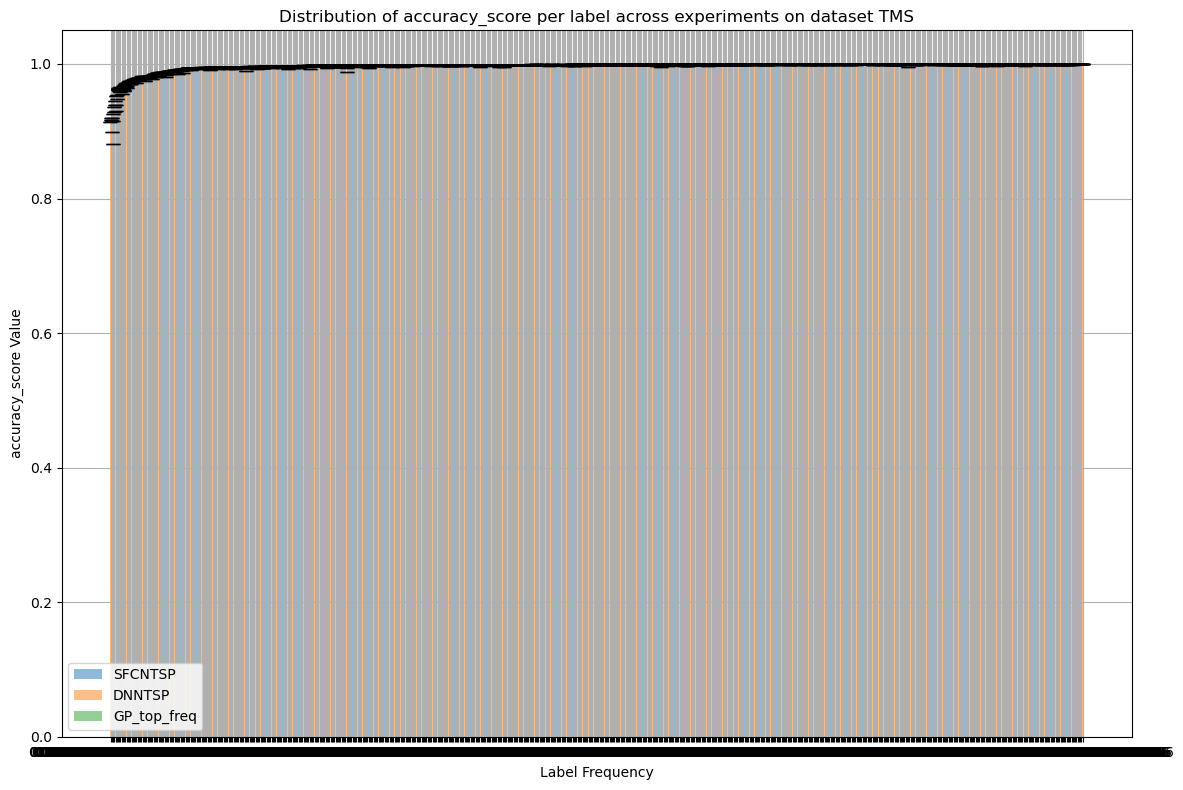

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

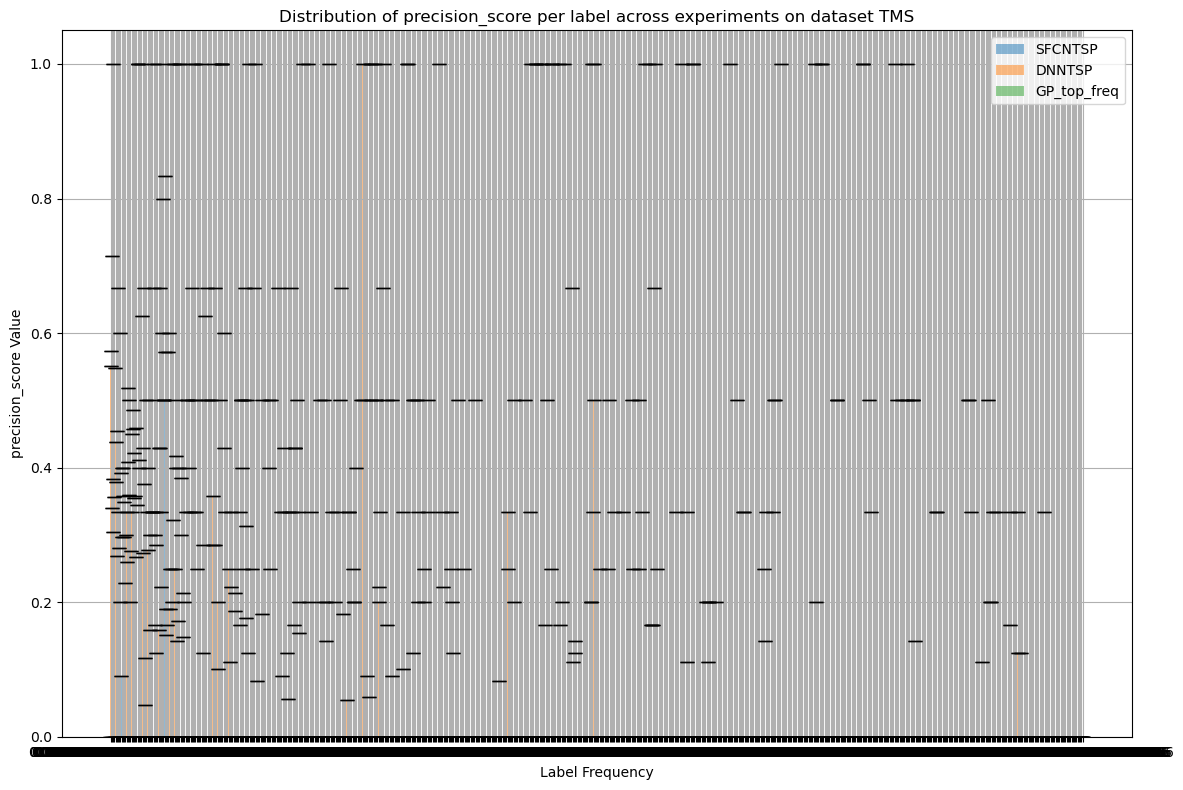

792
[0.01970757 0.00286078 0.00095359 0.0740623  0.01875397 0.00540369
 0.01048951 0.00095359 0.00031786 0.01970757 0.00921805 0.00190718
 0.00031786 0.08455181 0.03687222 0.00317864 0.00158932 0.02193261
 0.00031786 0.02542912 0.0044501  0.00158932 0.03242212 0.00508582
 0.00063573 0.00063573 0.00095359 0.00921805 0.01684679 0.00286078
 0.02161475 0.00031786 0.00095359 0.00095359 0.00158932 0.02828989
 0.05499046 0.00222505 0.01335029 0.00953592 0.00921805 0.00381437
 0.00222505 0.00095359 0.00699301 0.02415766 0.00190718 0.0855054
 0.01303242 0.00095359 0.04513668 0.00731087 0.00158932 0.00031786
 0.00158932 0.00031786 0.00095359 0.00031786 0.02574698 0.00063573
 0.00063573 0.00158932 0.00063573 0.01875397 0.00413223 0.03623649
 0.00031786 0.00127146 0.00190718 0.00317864 0.00254291 0.00254291
 0.0114431  0.02701844 0.00286078 0.00858233 0.01907184 0.00127146
 0.00031786 0.00127146 0.00286078 0.00063573 0.01335029 0.01621106
 0.03560076 0.00572155 0.00413223 0.00063573 0.00031786 0.0

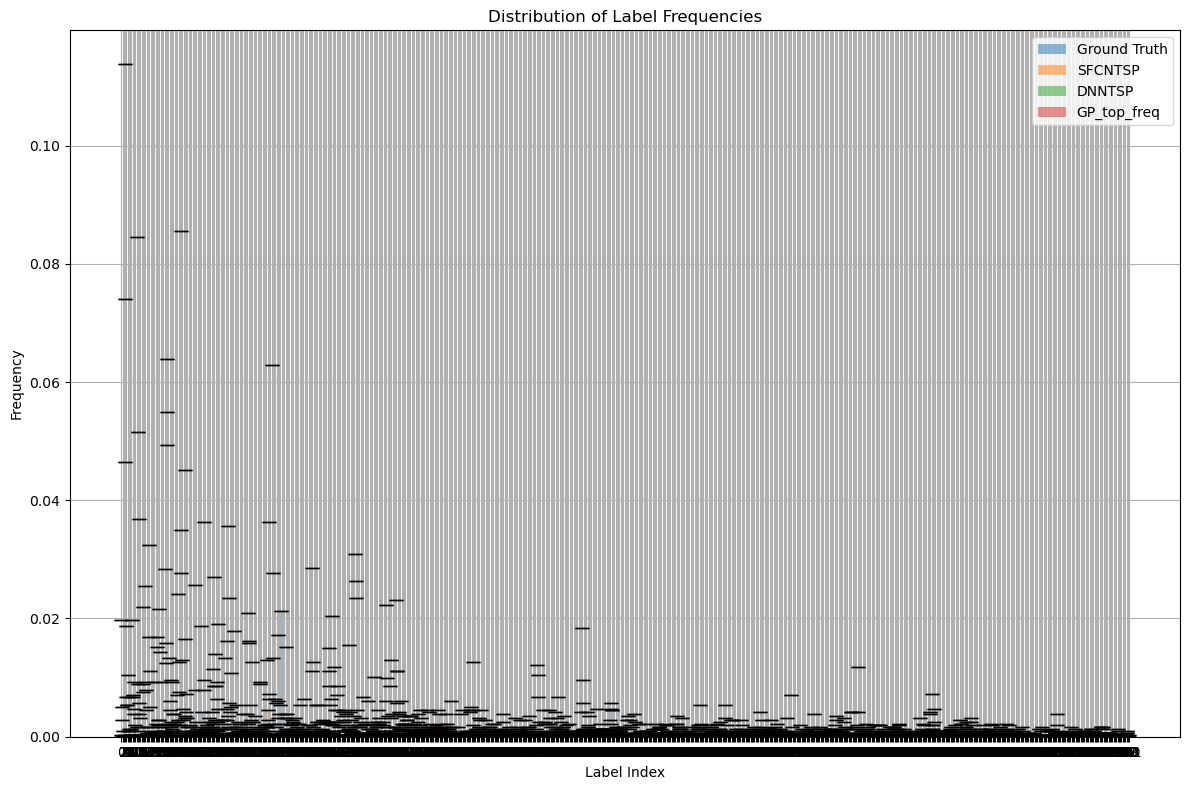

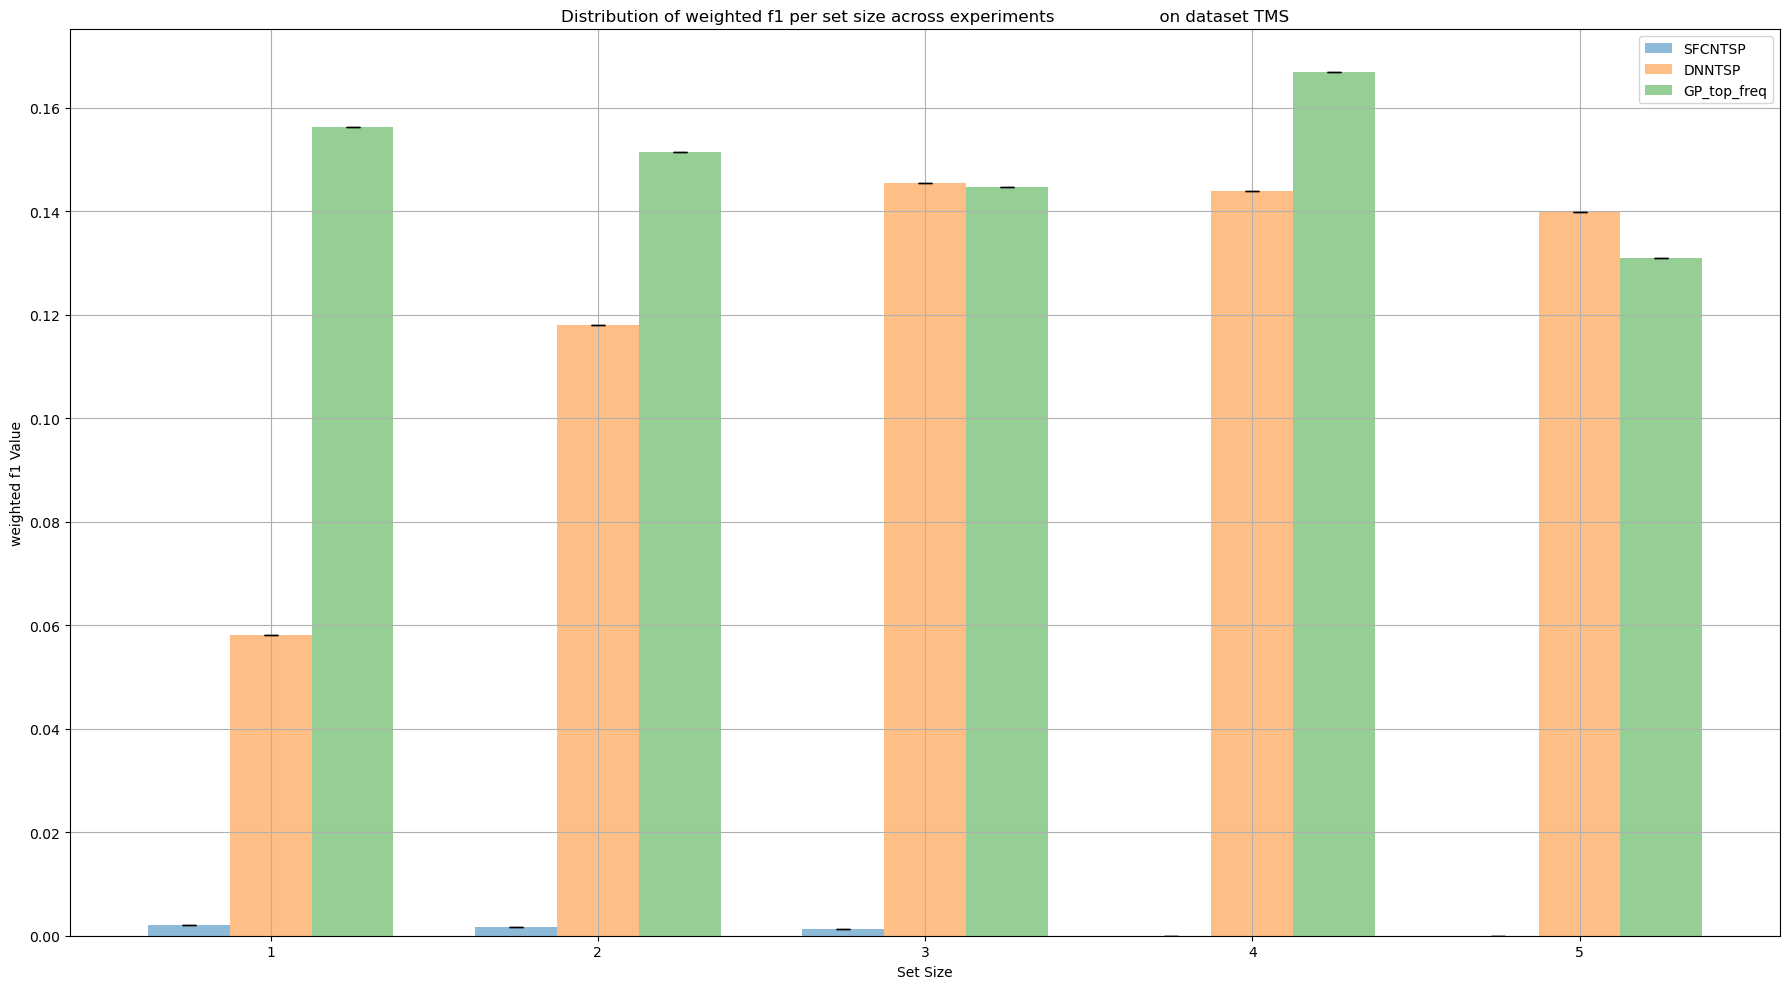

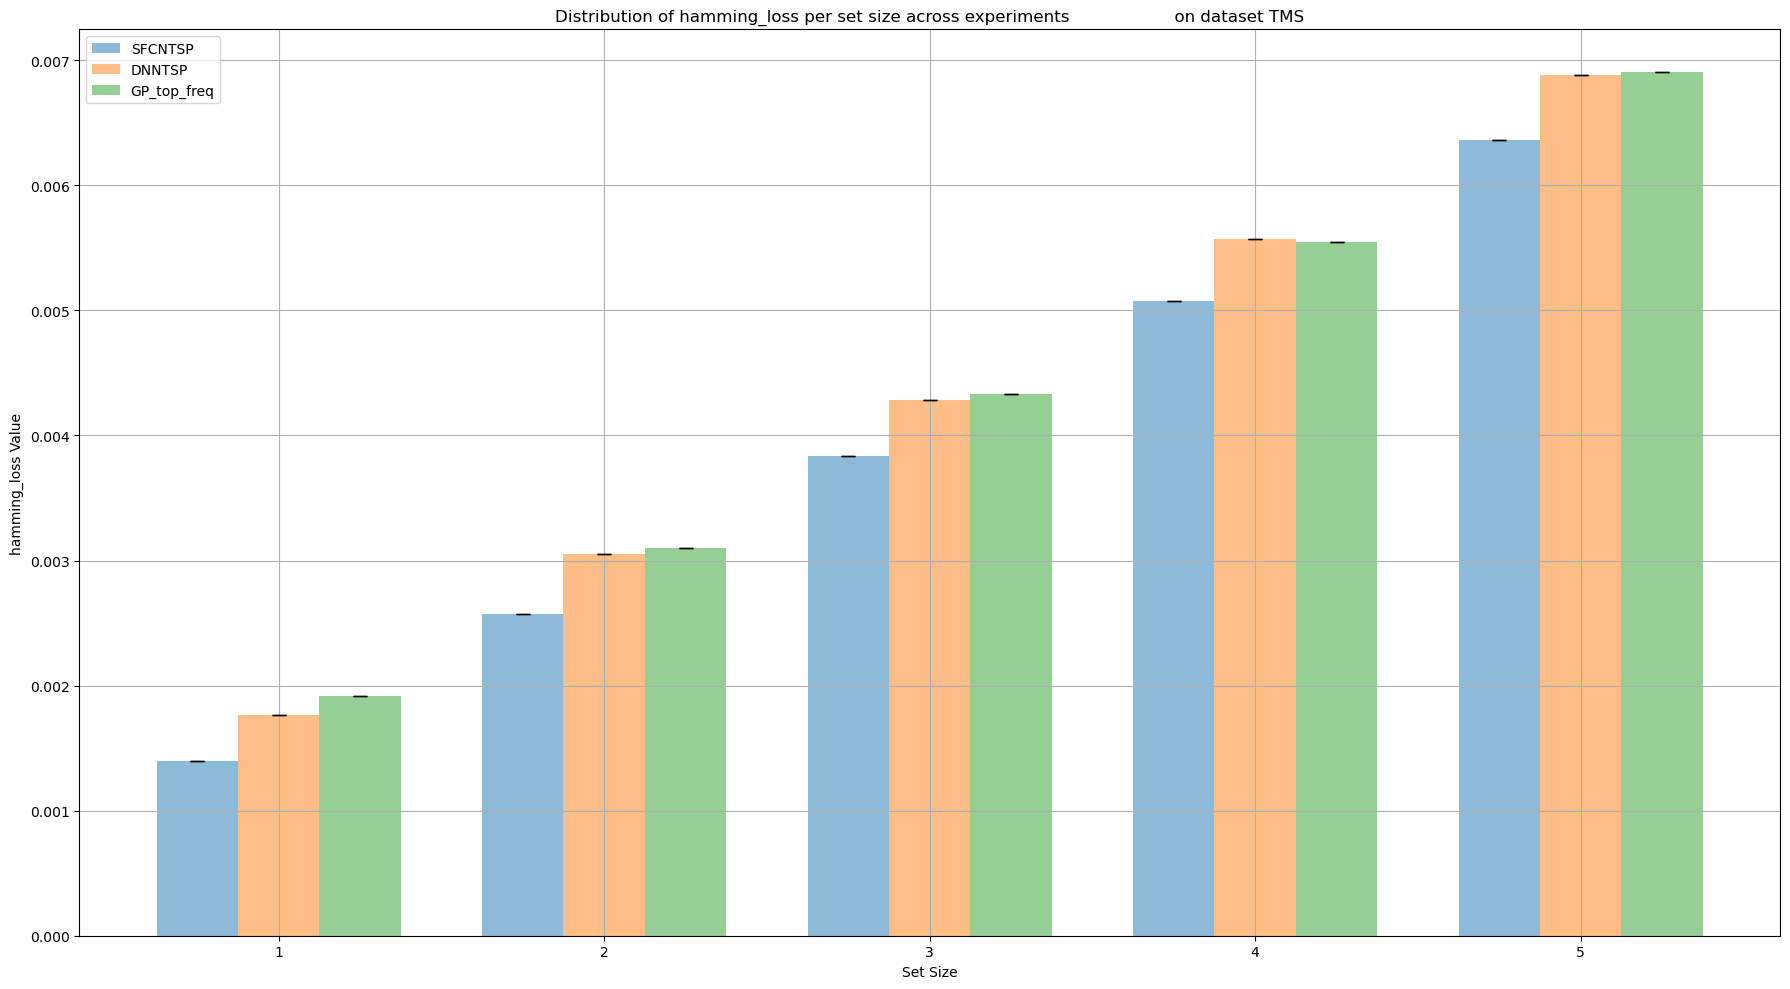

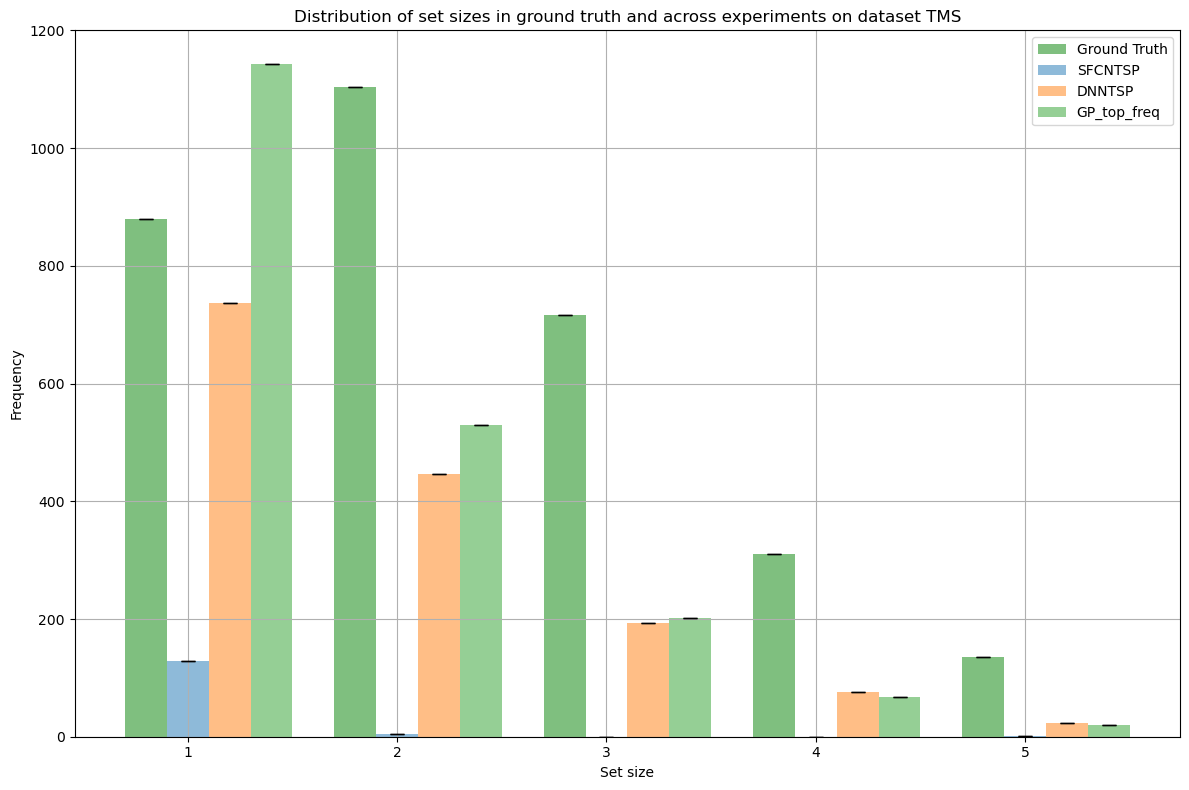

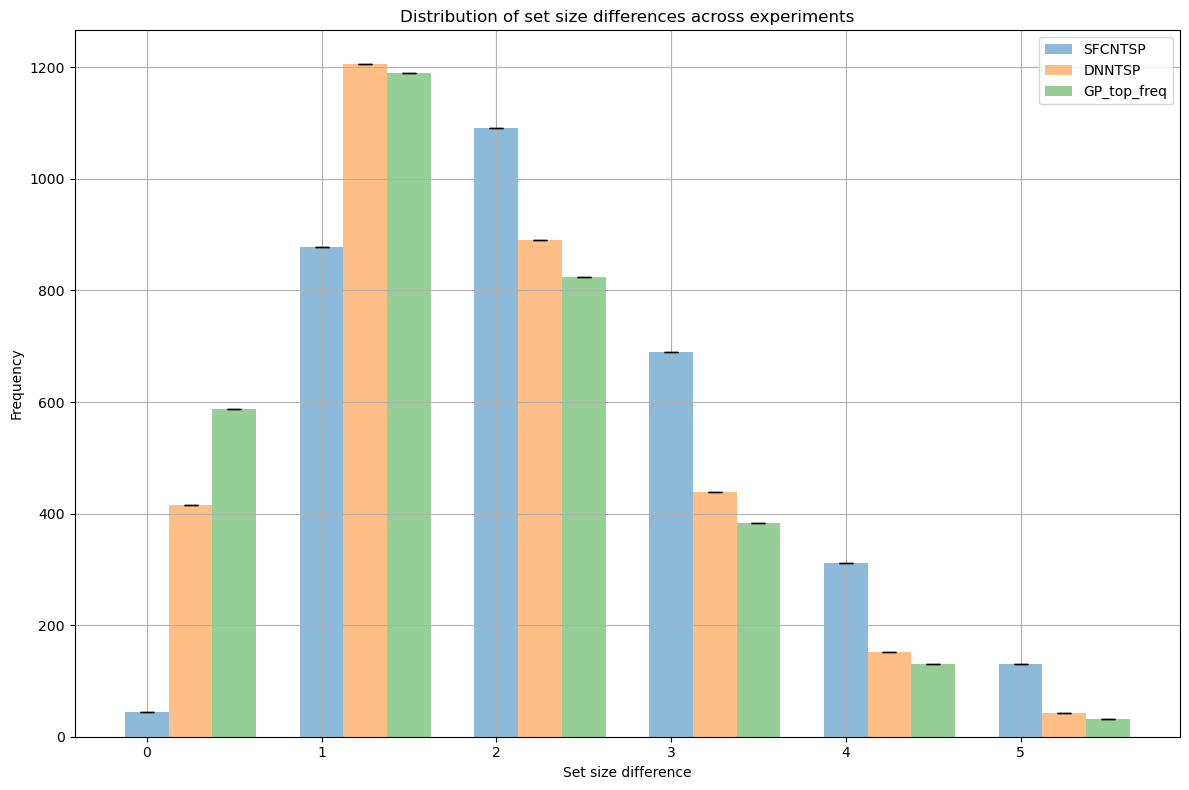

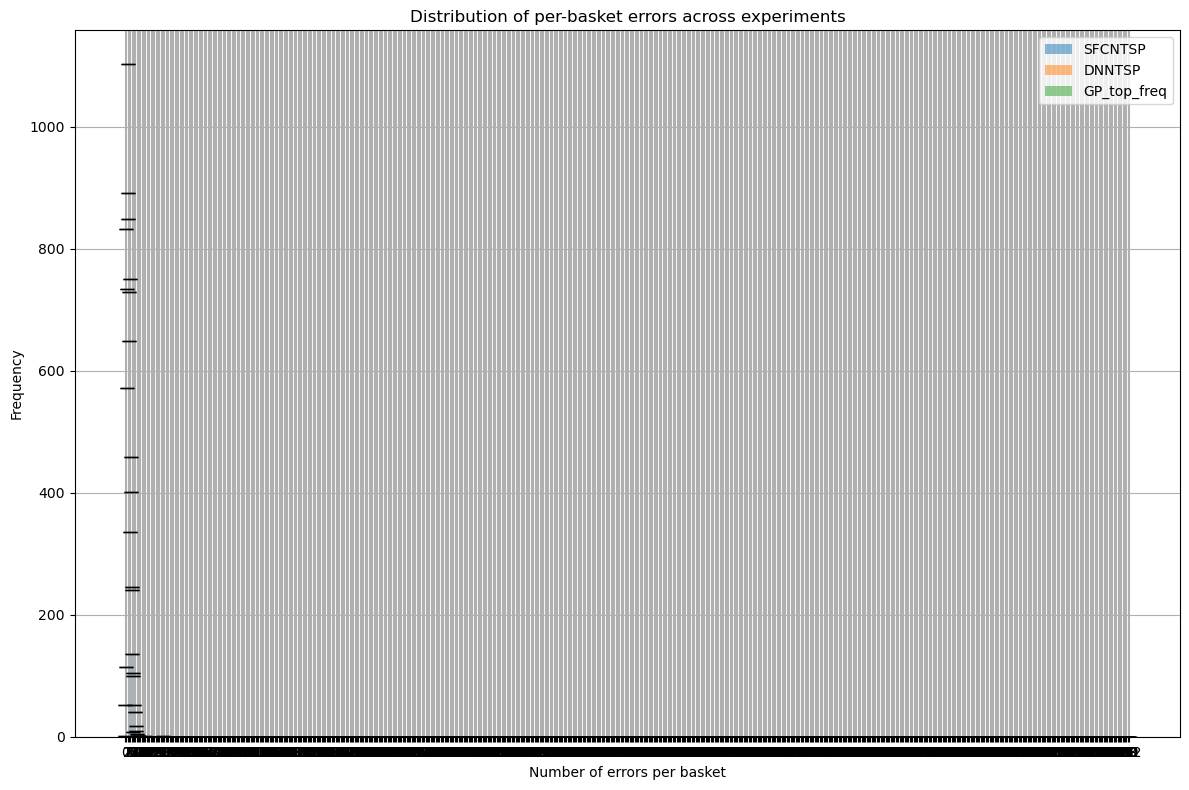

SFCNTSP    DNNTSP  GP_top_freq
weighted f1(mean)       0.001125  0.128875     0.151392
weighted f1(std)        0.000000  0.000000     0.000000
hamming_loss(mean)      0.002943  0.003385     0.003454
hamming_loss(std)       0.000000  0.000000     0.000000
weighted ROC AUC(mean)  0.689632  0.714051     0.718897
weighted ROC AUC(std)   0.000000  0.000000     0.000000

In [9]:
# У обьекта класса ModelComparison вызываете метод evaluate_and_save
# он построит все графики, посчитает метрики и сохранит их
# при подсчете будут использованы метрики,  которые вы перечислили в массивах выше
# также есть именованные параметры show и save
# show отвечает за вывод графиков(при False, графики не будут выведены),
# нужен чтобы не засорять вывод если нужно
# save отвечает за сохранение


test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)

## Mimic3

In [7]:
test_comp = eval_dataset("mimic3_preprocessed")

Running tests... 
Experiments are performed on dataset with common name
Max set sizes are equal between datasets
All checks are succesful
Done


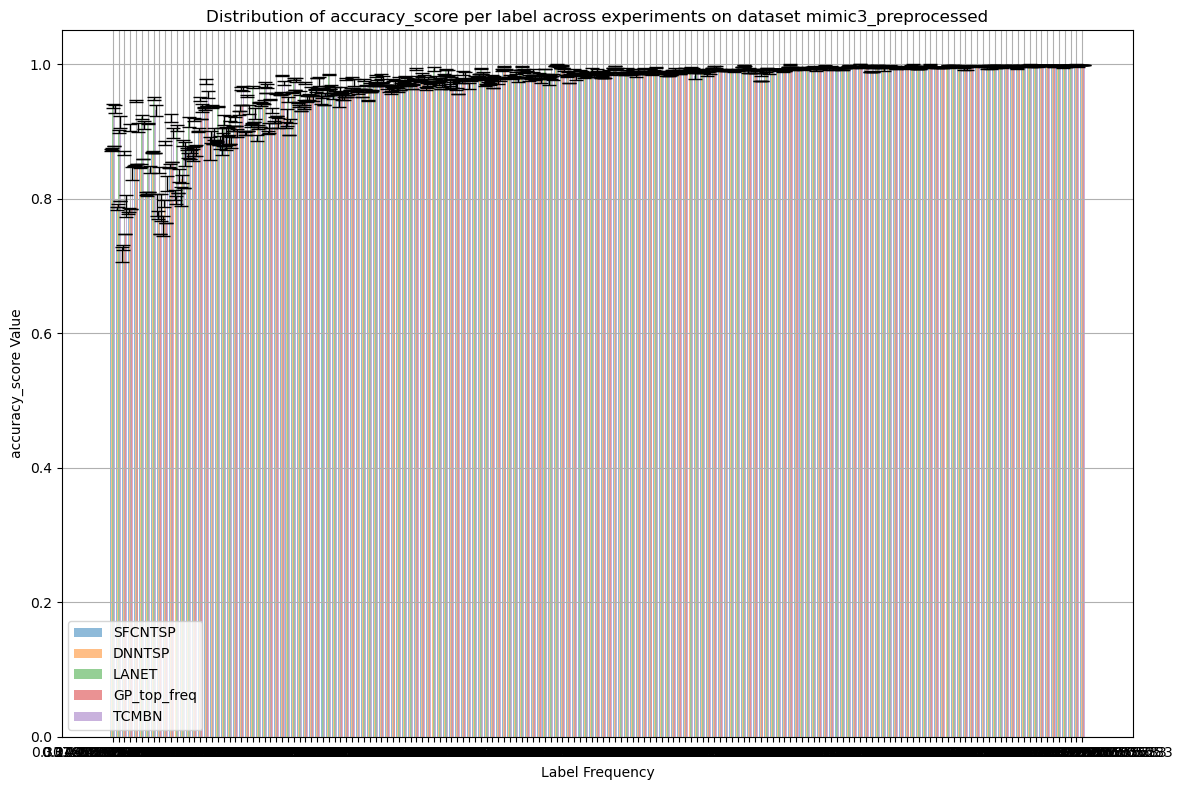

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

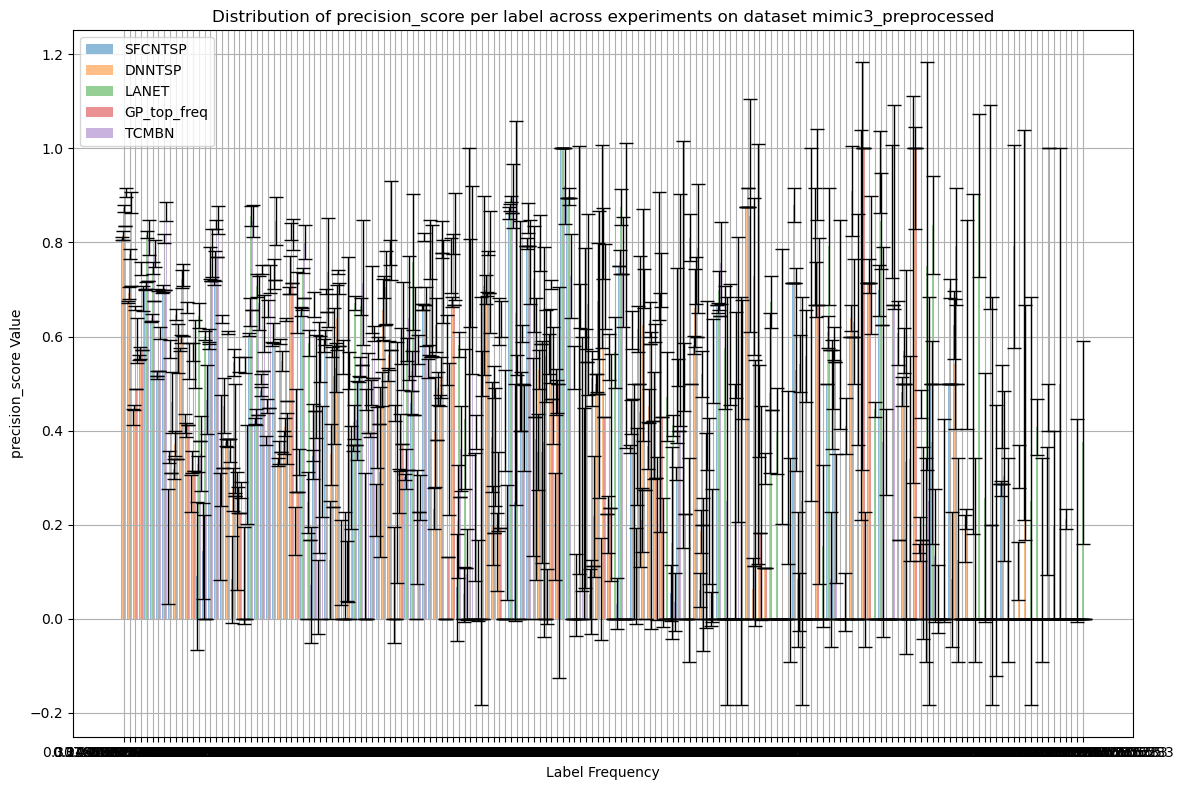

167
[0.00301432 0.1763376  0.09419744 0.00527506 0.06179352 0.00527506
 0.00452148 0.01055011 0.00527506 0.00452148 0.01959307 0.00452148
 0.0037679  0.00452148 0.02185381 0.00979653 0.01130369 0.00301432
 0.00602864 0.02411454 0.0037679  0.01657875 0.00678222 0.00452148
 0.02034665 0.01657875 0.00828937 0.00150716 0.01733233 0.01055011
 0.00226074 0.00828937 0.0037679  0.21853806 0.12057272 0.01205727
 0.00150716 0.09269028 0.00452148 0.08666164 0.09796534 0.01808591
 0.04521477 0.0075358  0.01130369 0.01431801 0.09871891 0.01431801
 0.01582517 0.02788244 0.00602864 0.0075358  0.00904295 0.00075358
 0.00226074 0.09721176 0.00904295 0.19969857 0.06706858 0.33760362
 0.00828937 0.02110023 0.00452148 0.06932931 0.32856066 0.01130369
 0.22456669 0.02110023 0.02185381 0.04370761 0.02712886 0.01431801
 0.00828937 0.04144687 0.08967596 0.01356443 0.03089676 0.03014318
 0.0919367  0.00452148 0.24792766 0.02863602 0.02863602 0.04220045
 0.00452148 0.17709118 0.02034665 0.02185381 0.01431801 0.

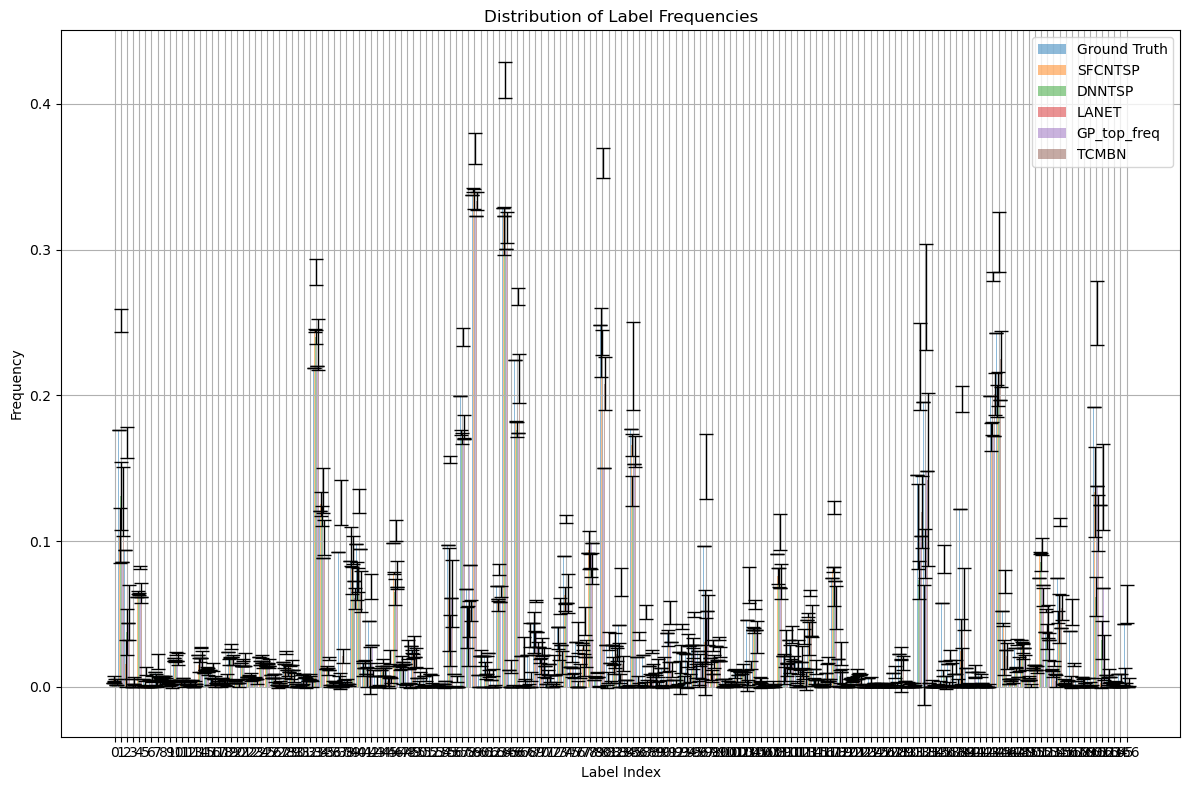

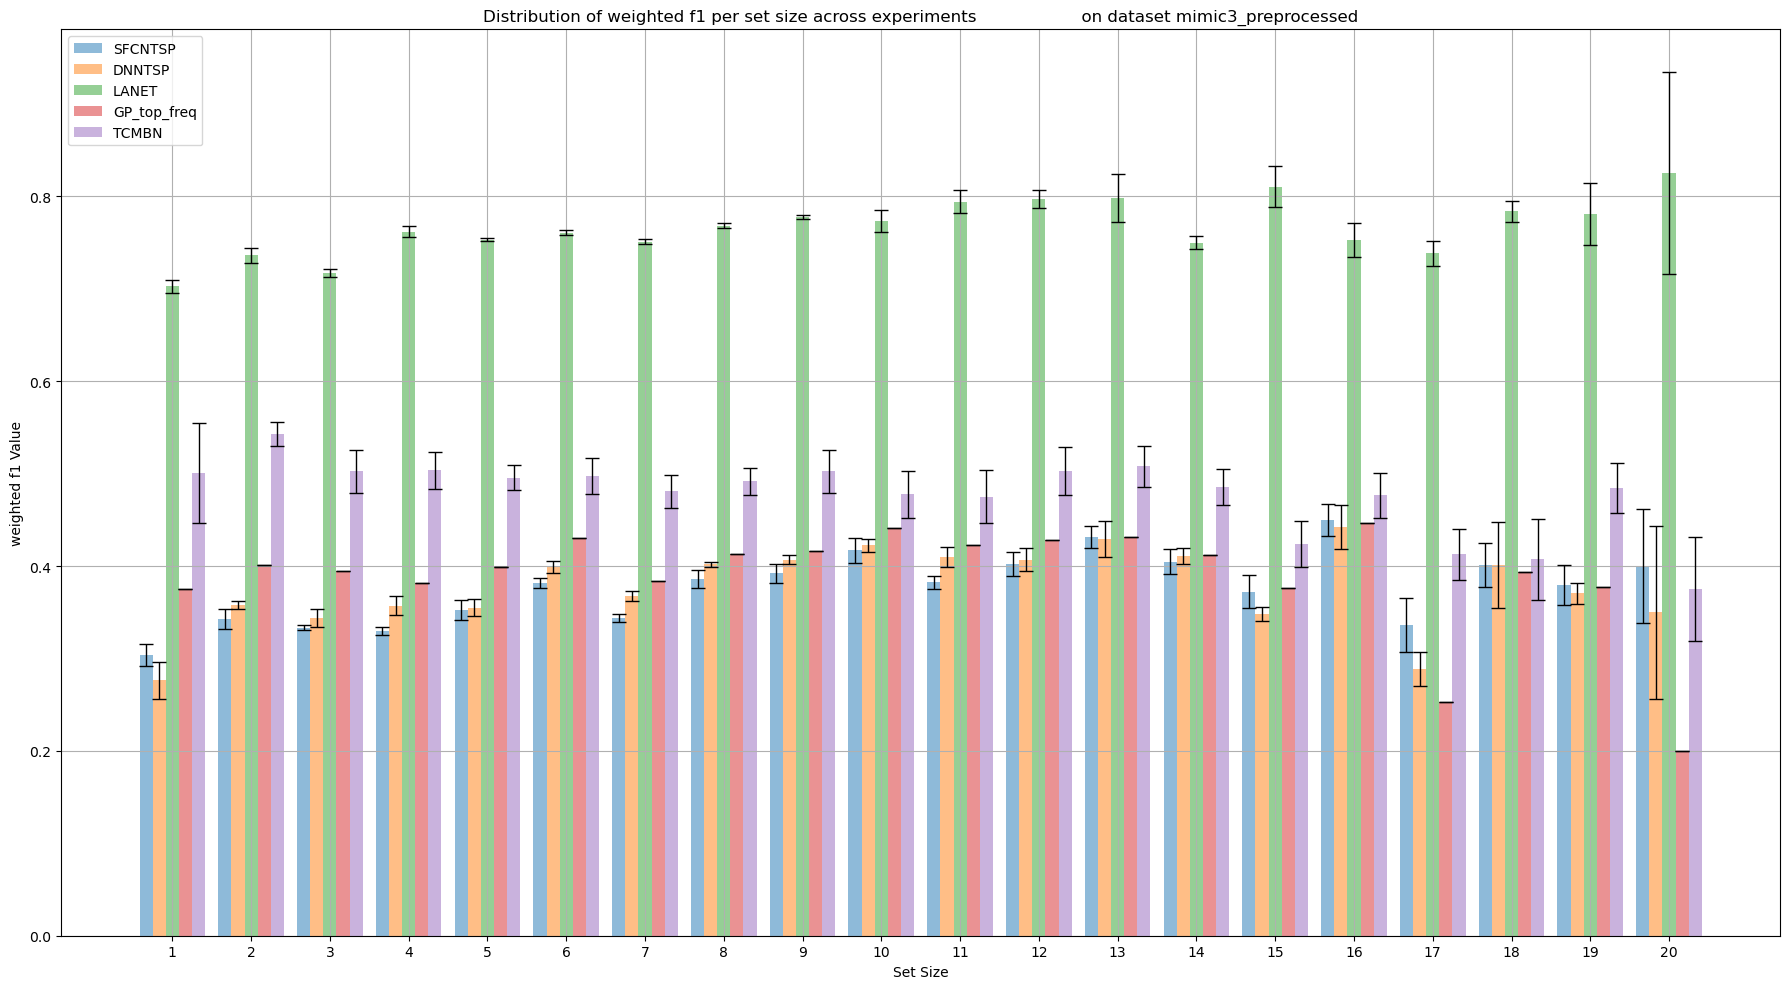

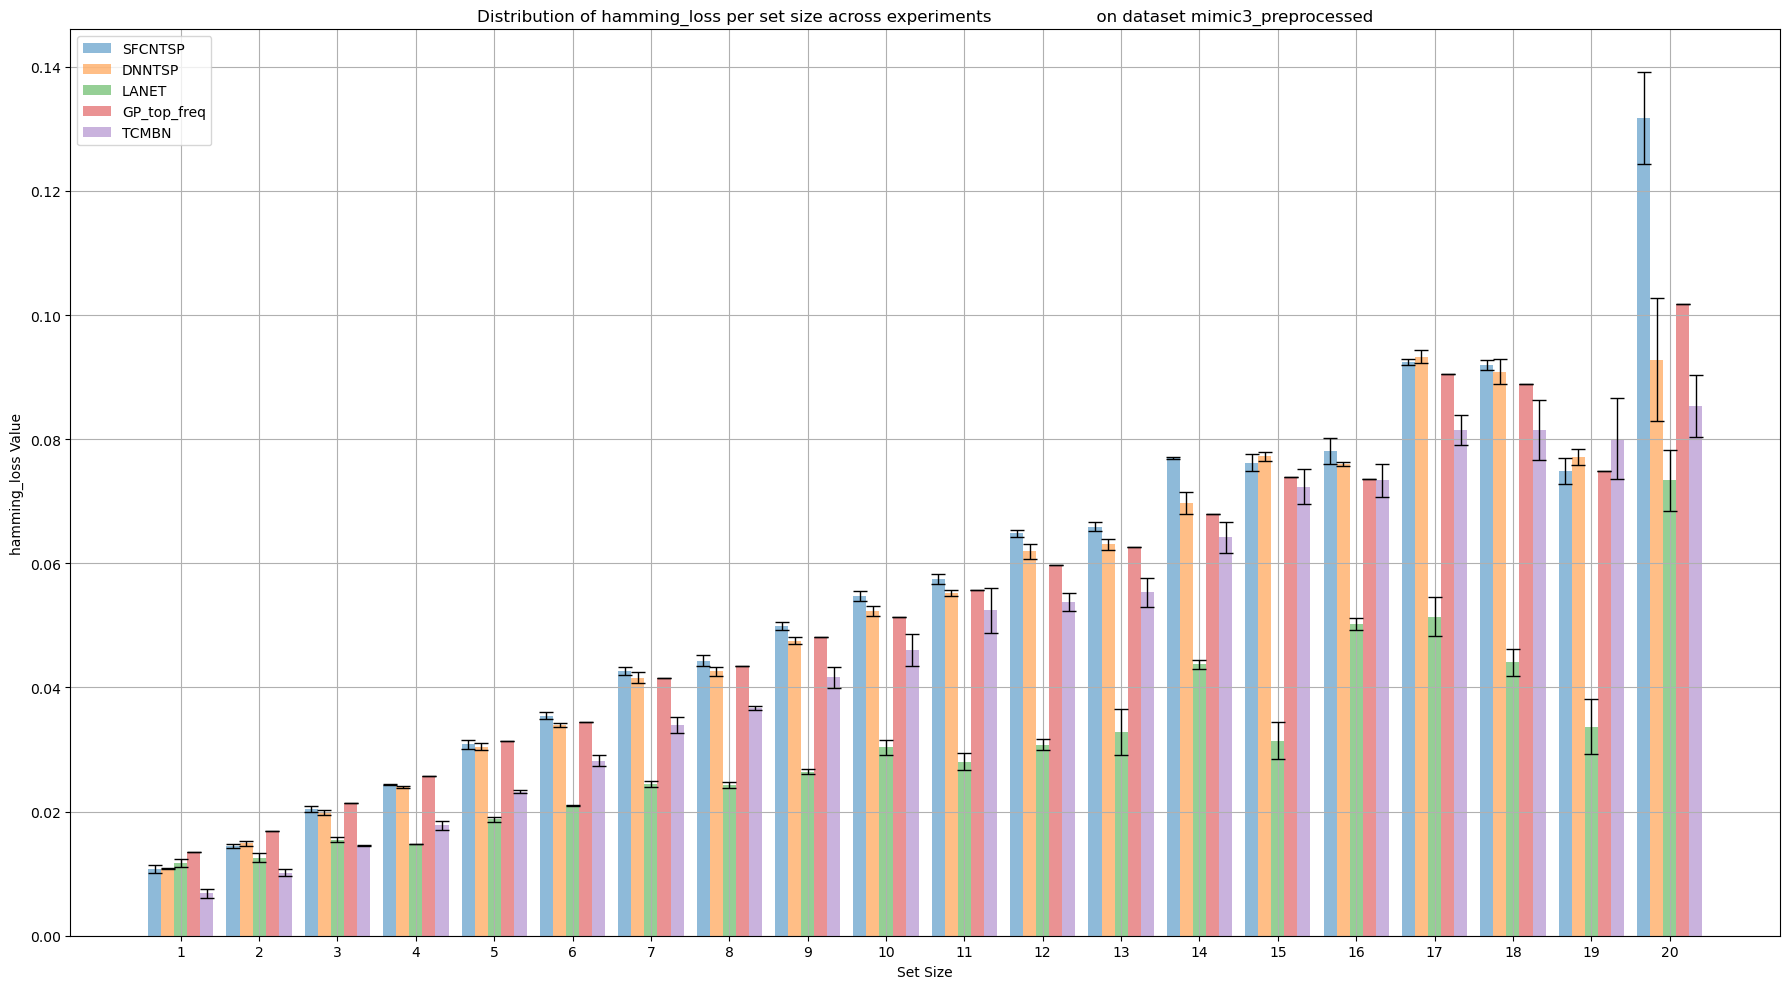

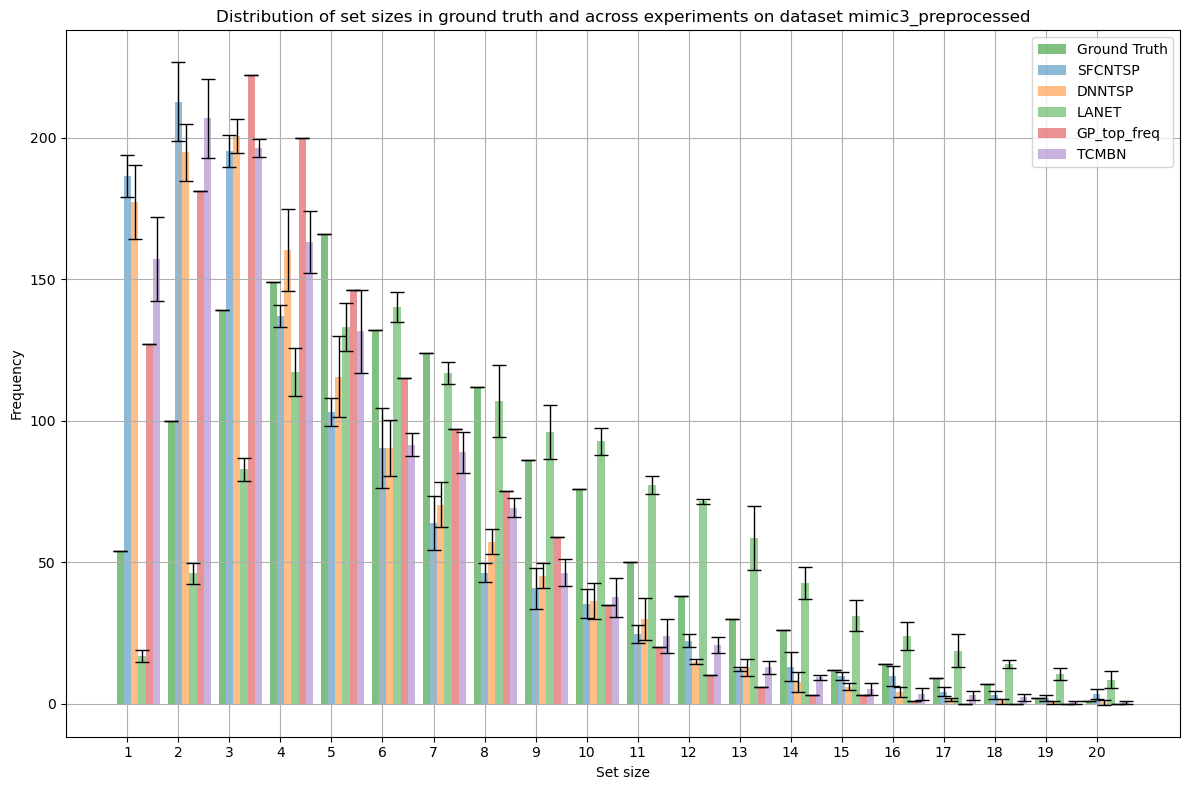

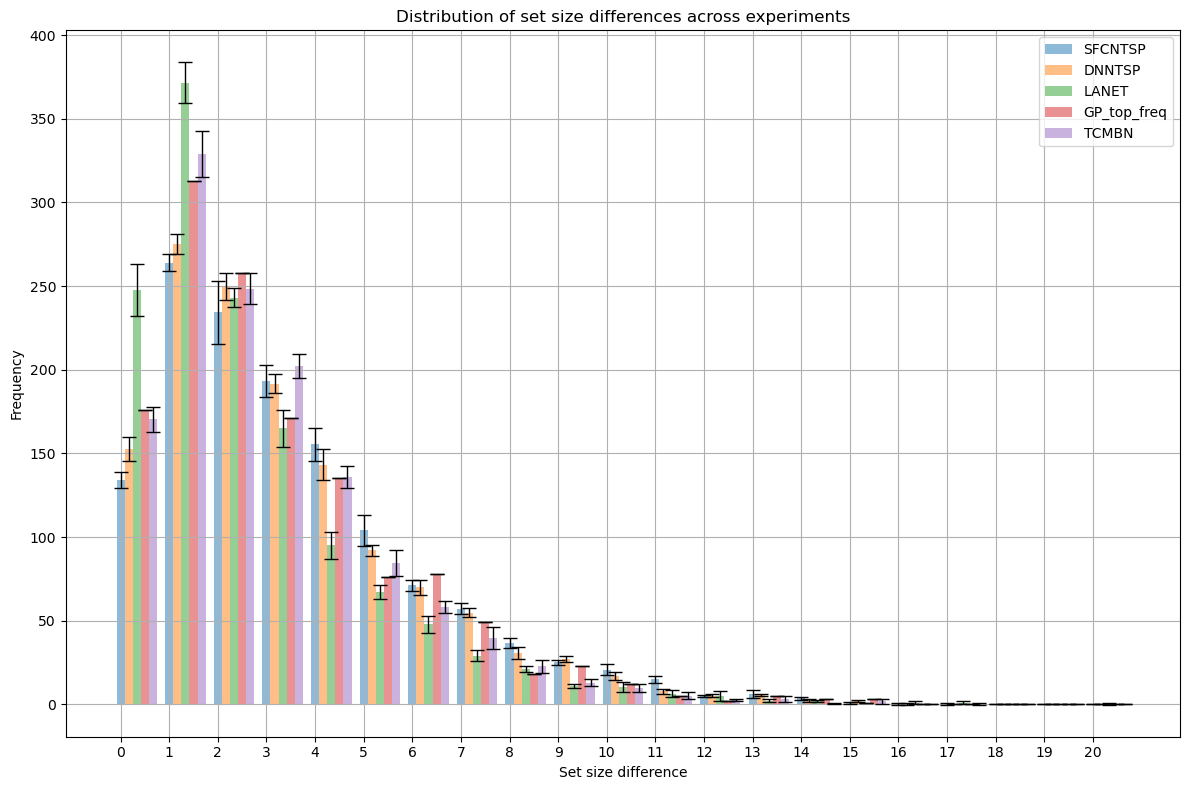

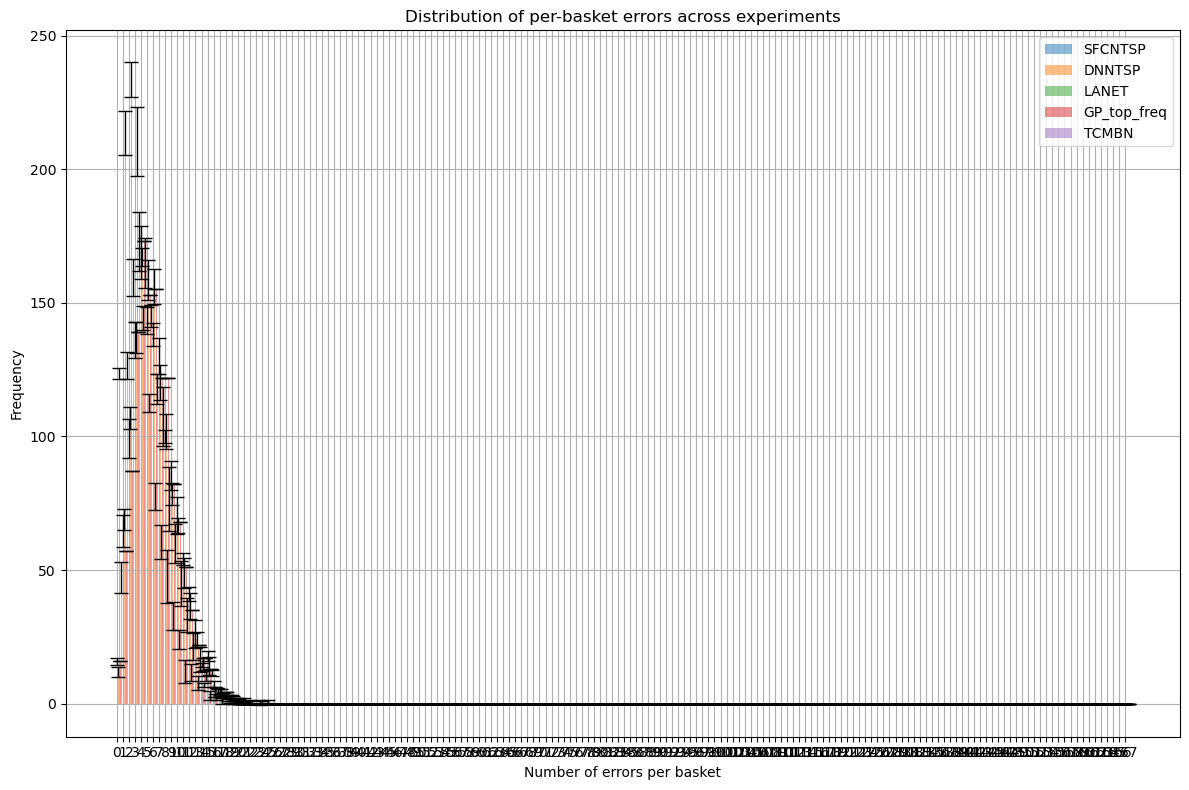

SFCNTSP    DNNTSP     LANET  GP_top_freq     TCMBN
weighted f1(mean)       0.379096  0.392790  0.751004     0.410067  0.497896
weighted f1(std)        0.008144  0.003021  0.003229     0.000000  0.017963
hamming_loss(mean)      0.037746  0.036520  0.021955     0.037178  0.030497
hamming_loss(std)       0.000450  0.000270  0.000129     0.000000  0.000753
weighted ROC AUC(mean)  0.703369  0.692634  0.973816     0.692325  0.867047
weighted ROC AUC(std)   0.002379  0.000288  0.000630     0.000000  0.009460

In [8]:
test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)

## DeFi

In [4]:
dataset_name = 'defi_preprocessed'

In [12]:
 # кастомный класс для загрузки и предобработки в нужный формат
 # создан по правилам описаным в readme
dunnhumby_sfcntsp = ProcessSFCNTSP(dataset_name)
dunnhumby_sfcntsp = DataClass(dunnhumby_sfcntsp)

In [13]:

dunnhumby_dnntsp = ProcessDNNTSP(dataset_name)
# передаю наследника класса processed dataset в DataClass
dunnhumby_dnntsp = DataClass(dunnhumby_dnntsp)


In [14]:
dunnhumby_gp = ProcessGP(dataset_name)
dunnhumby_gp = DataClass(dunnhumby_gp)

In [15]:
dunnhumby_lanet = ProcessLANET(dataset_name)
dunnhumby_lanet = DataClass(dunnhumby_lanet)

In [16]:
dunnhumby_tcmbn = ProcessTCMBN(dataset_name)
dunnhumby_tcmbn = DataClass(dunnhumby_tcmbn)

In [18]:
# В инициализатор класса ModelComparison
# передаем обьекты DataClass, от разных моделей на одном датасете, которые мы хотим сравнивать
# Во время инициализации произойдет проверка того что данные получены из одного датасета
# И соотвествующие сообщения будут распечатаны
# test_comp = ModelComparison(dunnhumby_dnntsp, dunnhumby_sfcntsp, dunnhumby_gp)
test_comp = ModelComparison(dunnhumby_sfcntsp, dunnhumby_dnntsp, dunnhumby_lanet, dunnhumby_gp, dunnhumby_tcmbn)

Experiments are performed on dataset with common name
Max set sizes are equal between datasets
All checks are succesful


In [19]:
# Здесь нужно определить два массива с метриками которые вы хотите взять
# metric_list - Это метрики которые считаются в постановке multilabel
# metric_list_for_labels - метрики которые считаются в постановке бинарной классификации
# массив metric_list_for_labels нужен для построение метрик per label

# в эти массивы вы передаете:
# 1. обьект функции метрики
# 2. 'pred_labels' или 'probas' в зависимости от того с чем работает метрика
# дело в том, что под капотом зашита своя стратегия выбора порогов, вместо взятия 
# обычного 0.5, которое делает sklearn, если передать ему вероятности, а не сами лейблы
# - именнованным аргументом name передаете как назвать метрику(для отображения на графиках)
# если этот параметр не передать, по умолчанию будет взят
# metric_func + str(kwargs)
# - далее передаете желаемые аргументы kwargs, которые вы можете захотеть подставить в
# саму метрику. Например, передавая параметр average=<...> в инициализатор
# при вызове соотвествующей метрики, этот параметр будет подставлен

metric_list_for_set_sizes = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted', zero_division=1.0),
    Metric(hamming_loss, 'pred_labels'),
]

metric_list = [
    Metric(f1_score, 'pred_labels', name='weighted f1', average='weighted'),
    Metric(hamming_loss, 'pred_labels'),
    Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),
    
]

    # Metric(roc_auc_score, 'probas', name='weighted ROC AUC', average='weighted'),


metric_list_for_labels = [
    Metric(accuracy_score, 'pred_labels'),
    Metric(precision_score, 'pred_labels')
]

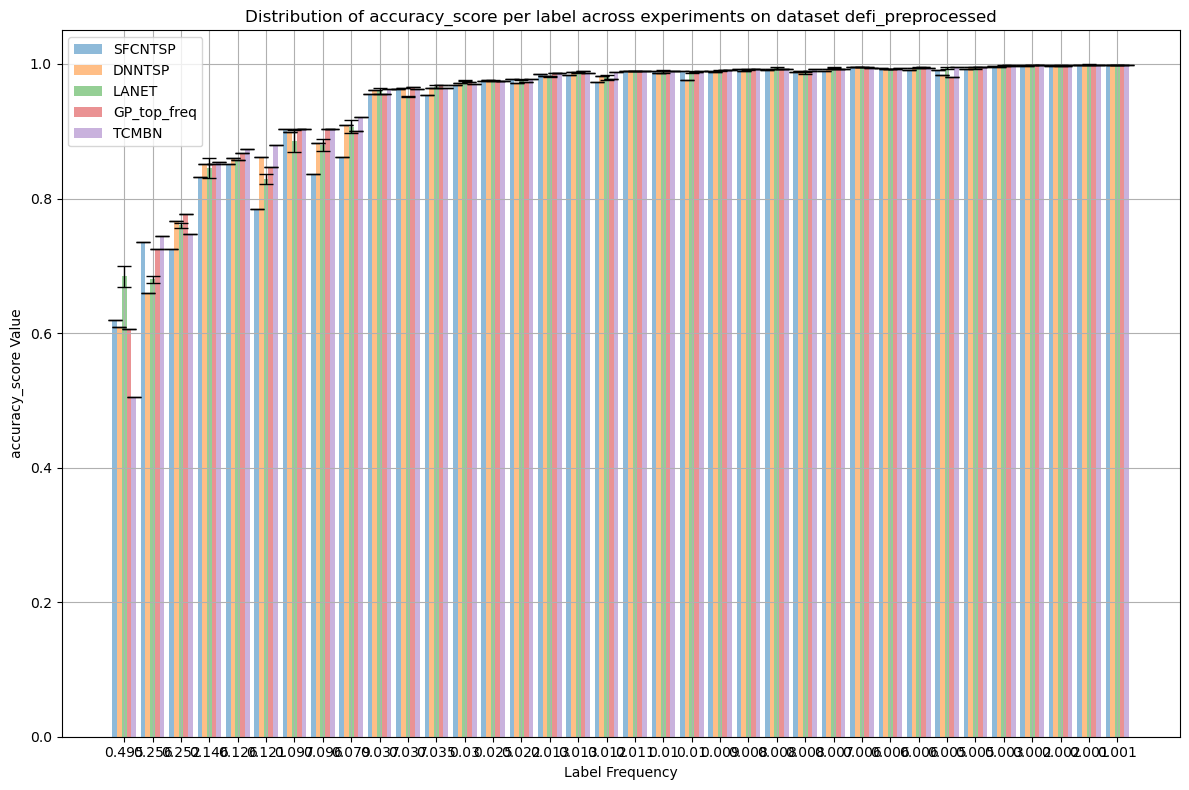

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

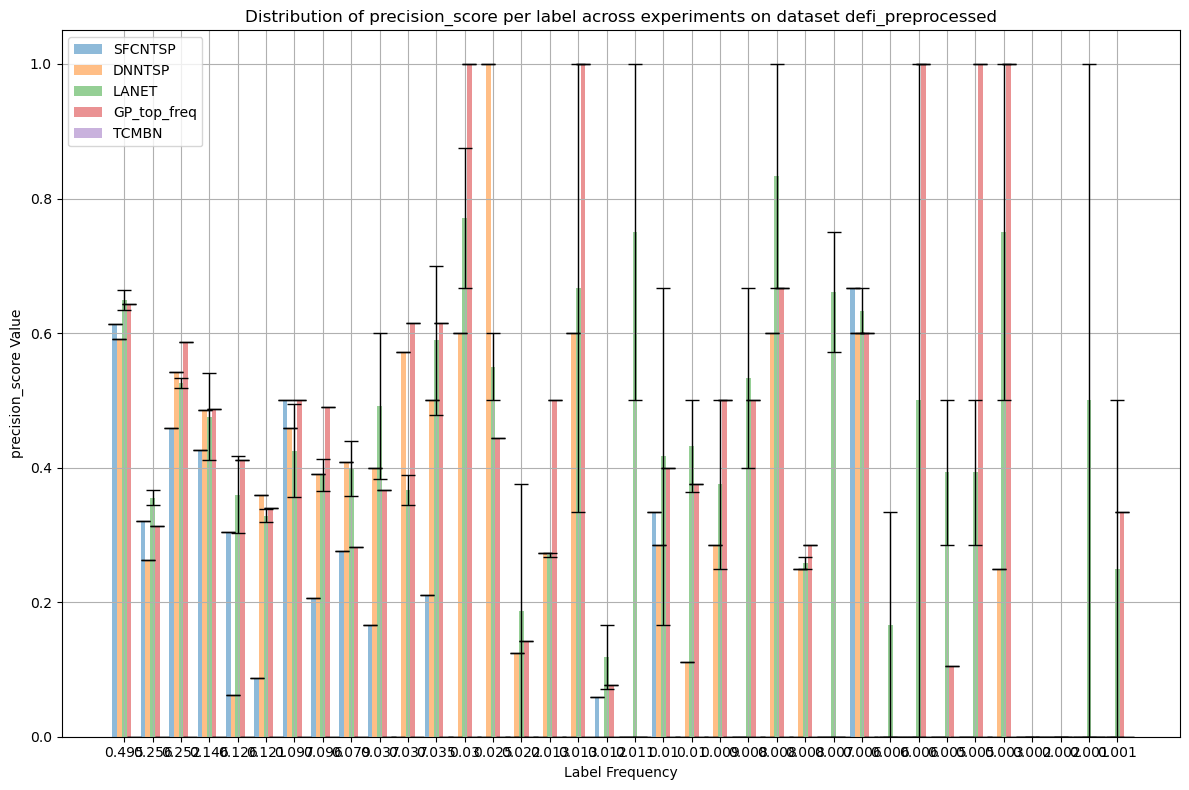

36
[0.126 0.256 0.121 0.495 0.002 0.096 0.146 0.252 0.037 0.025 0.01  0.006
 0.013 0.012 0.002 0.009 0.013 0.097 0.035 0.008 0.003 0.008 0.079 0.008
 0.037 0.005 0.022 0.006 0.005 0.011 0.007 0.006 0.01  0.03  0.001 0.001]


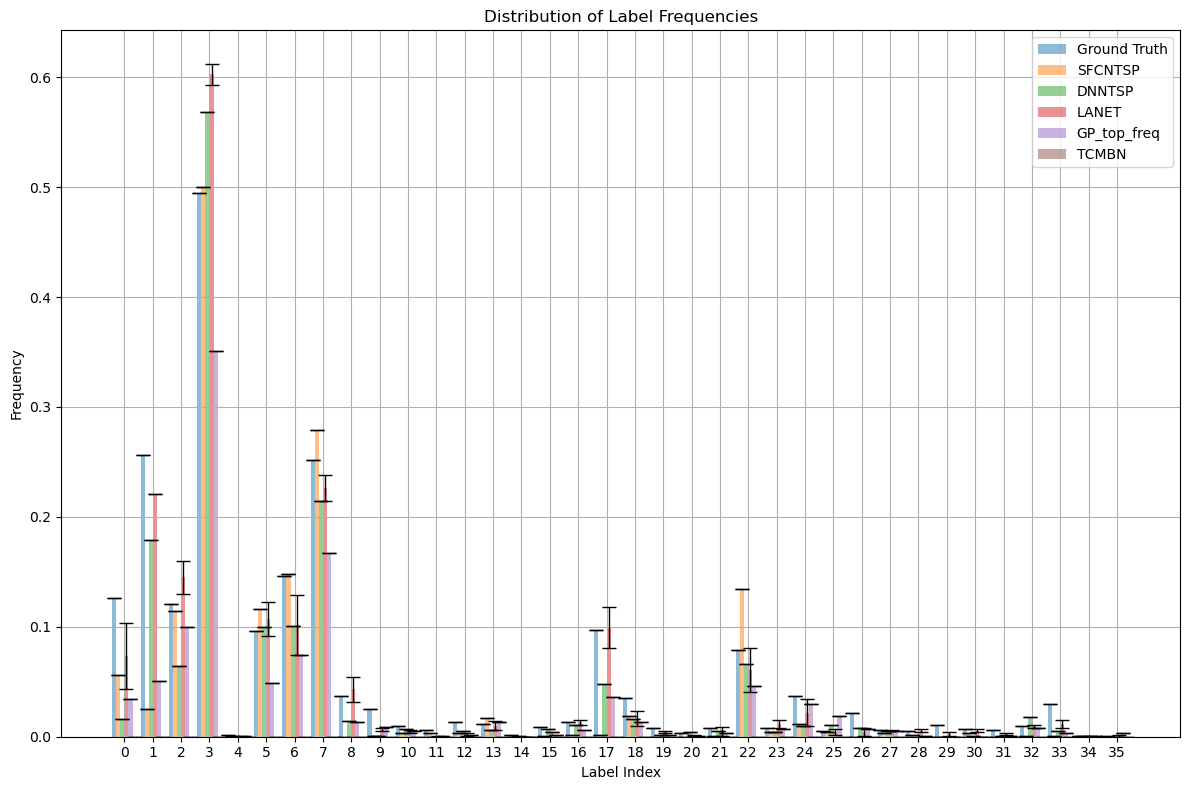

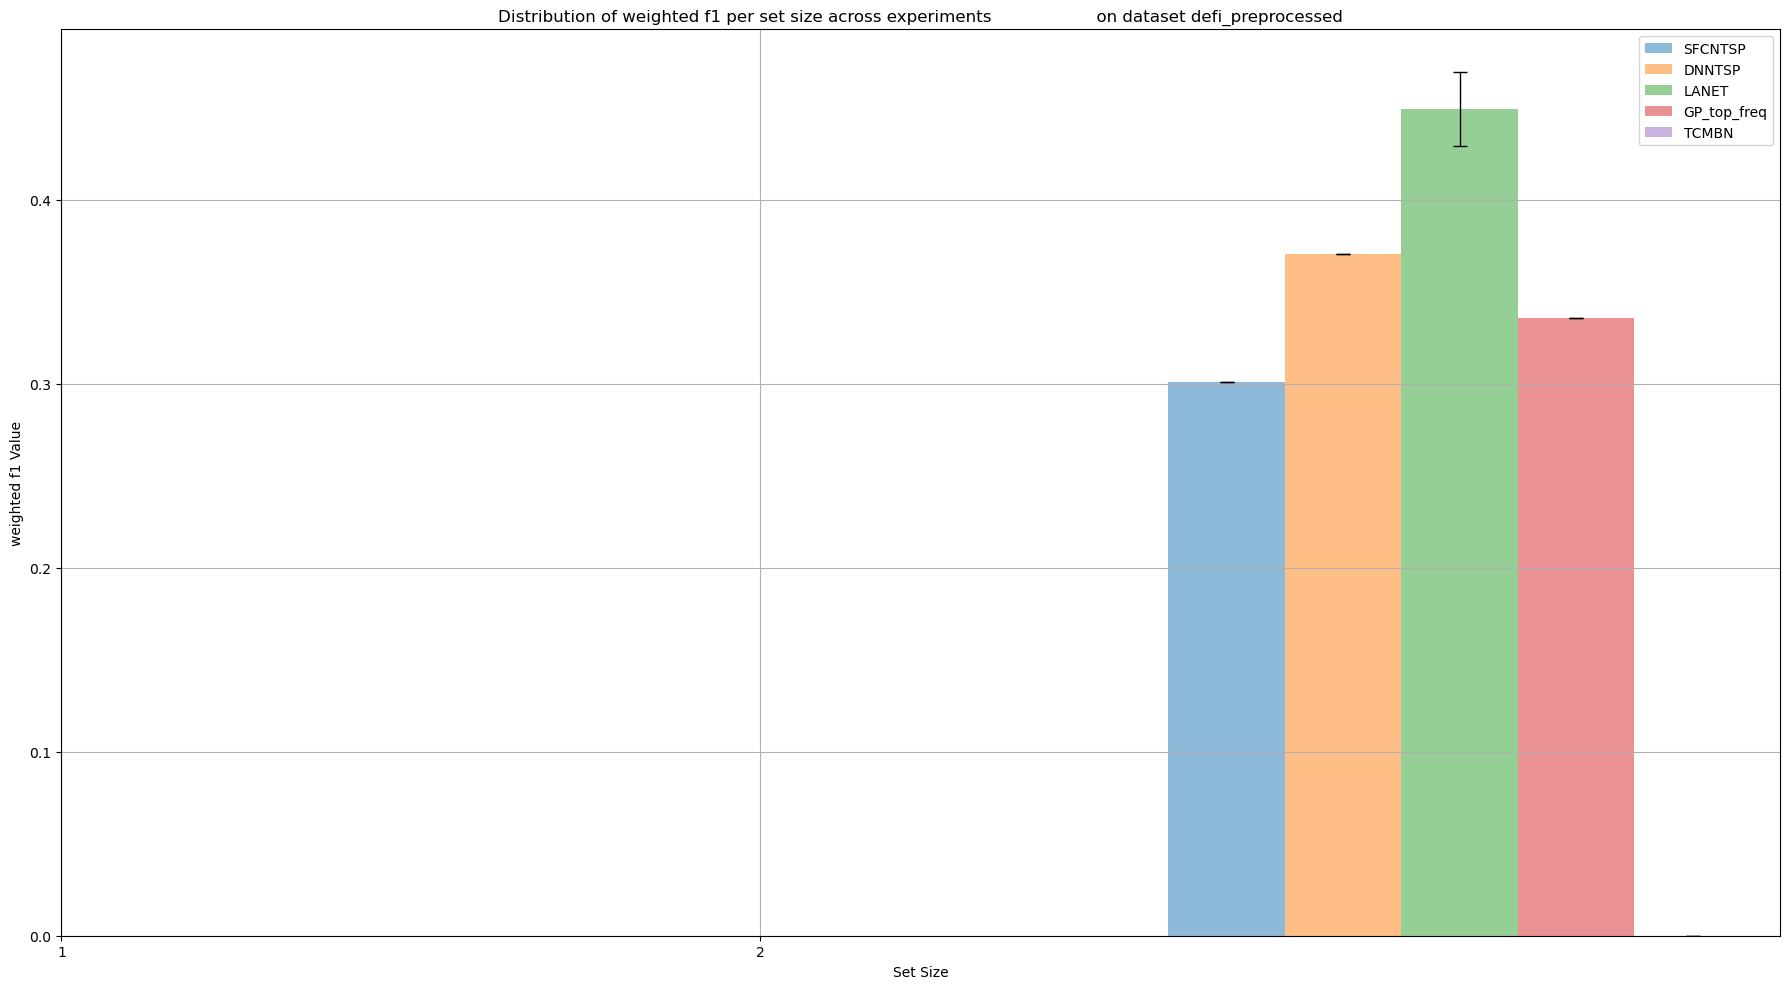

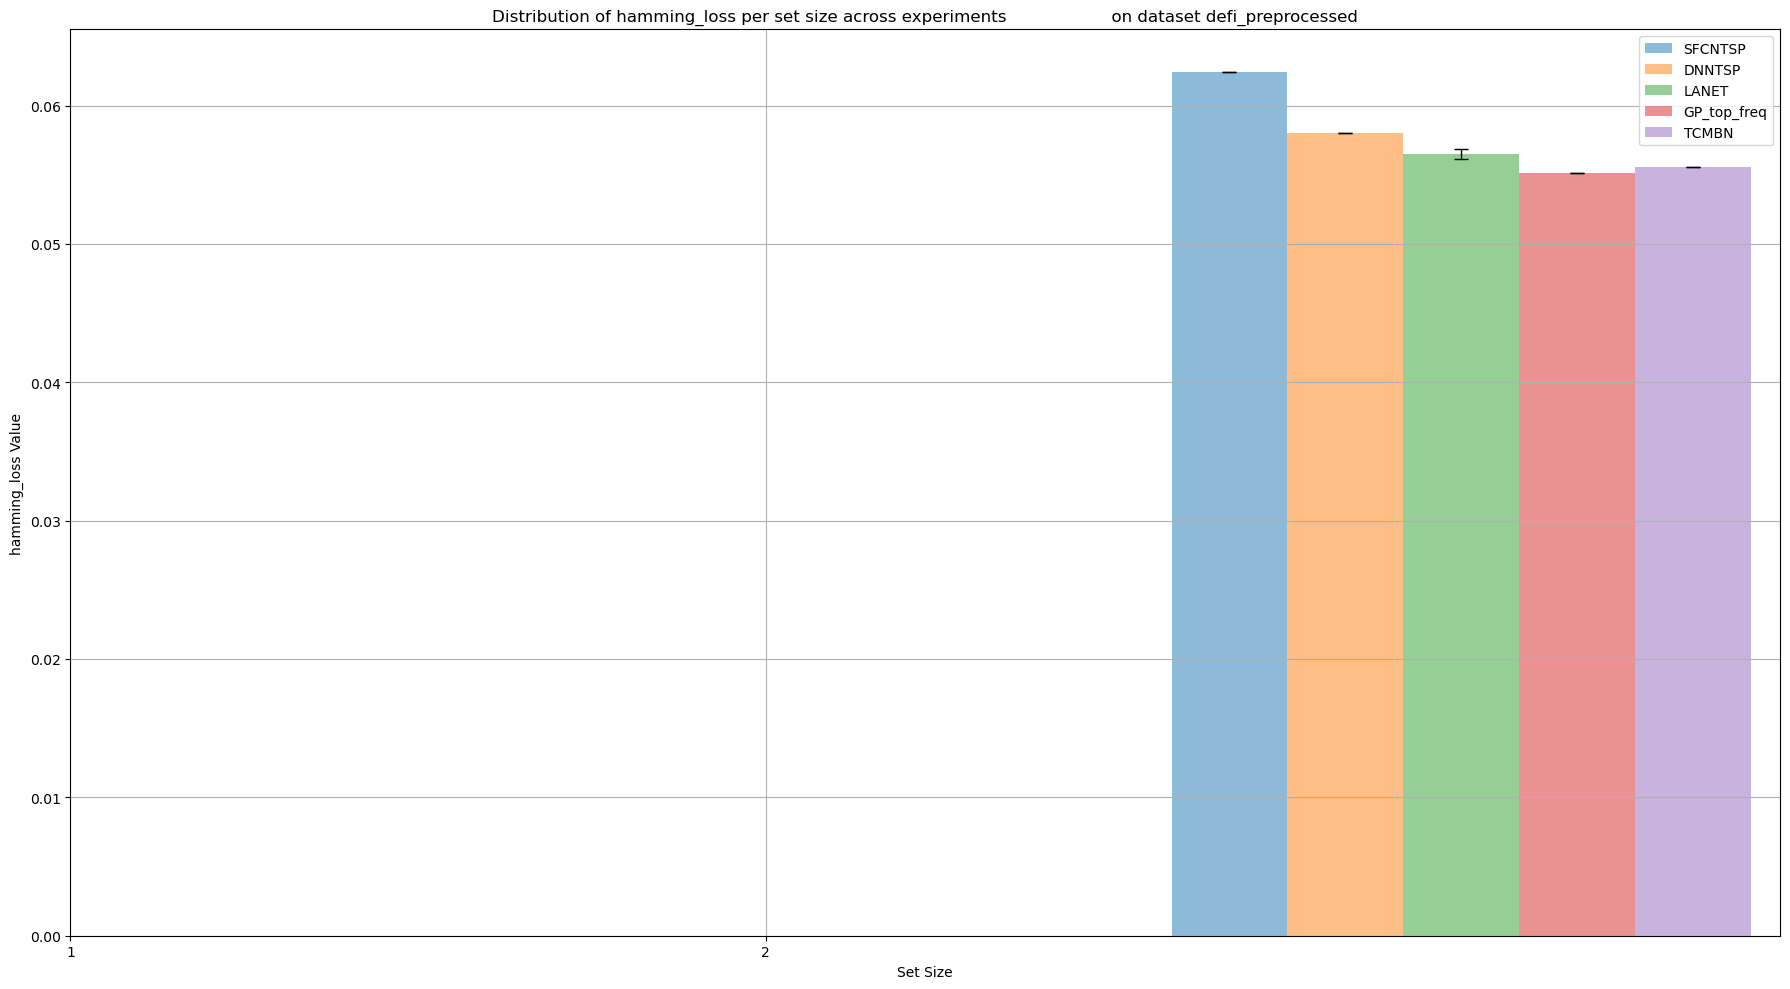

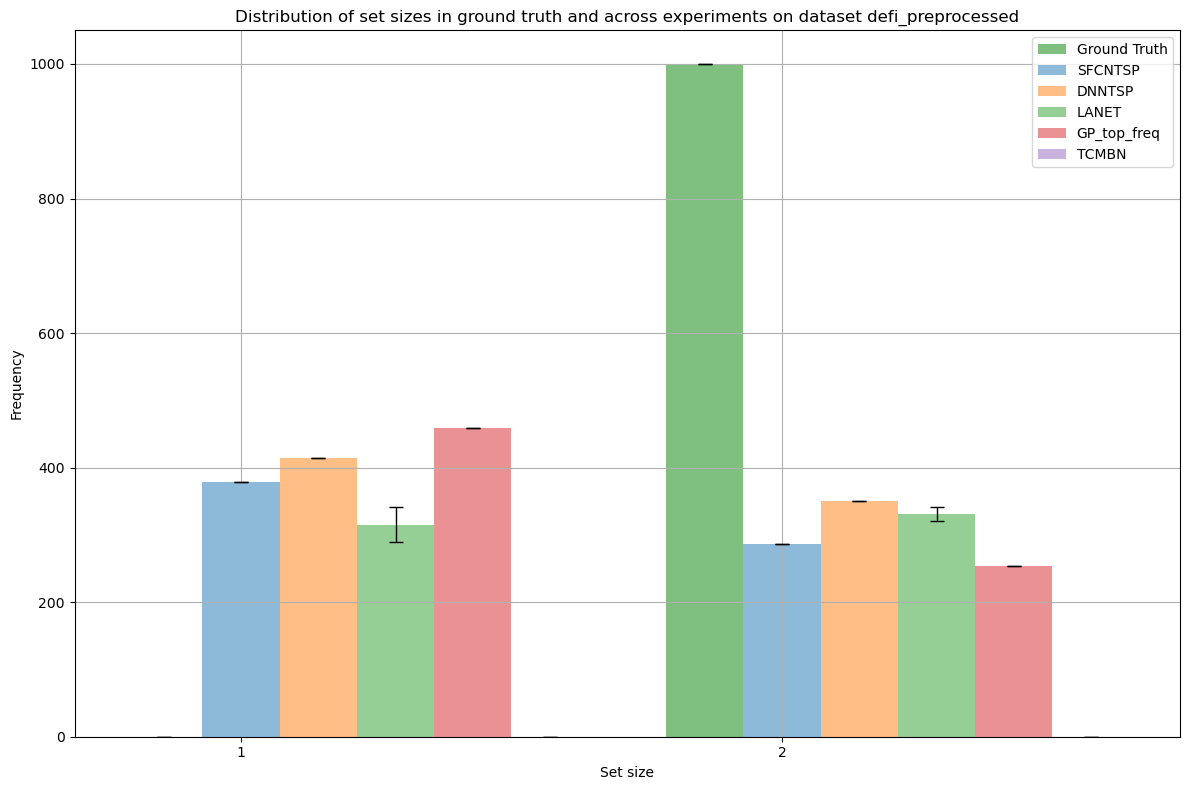

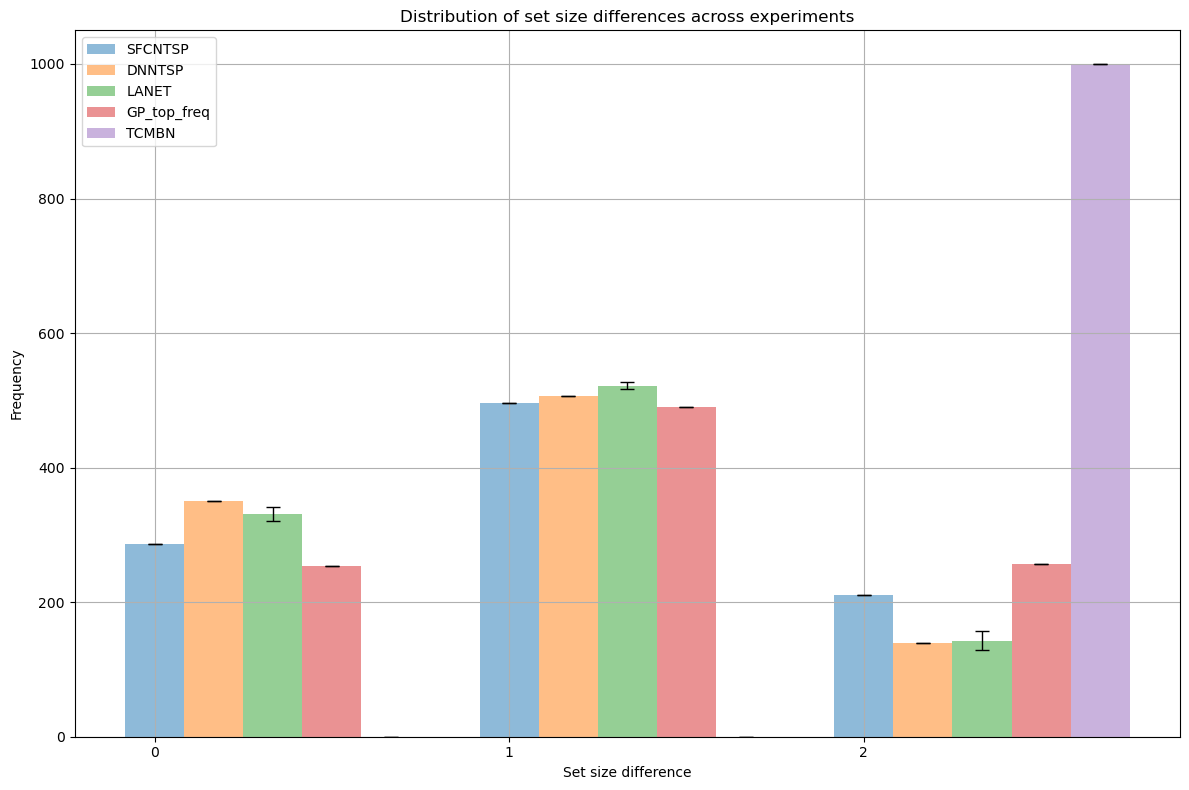

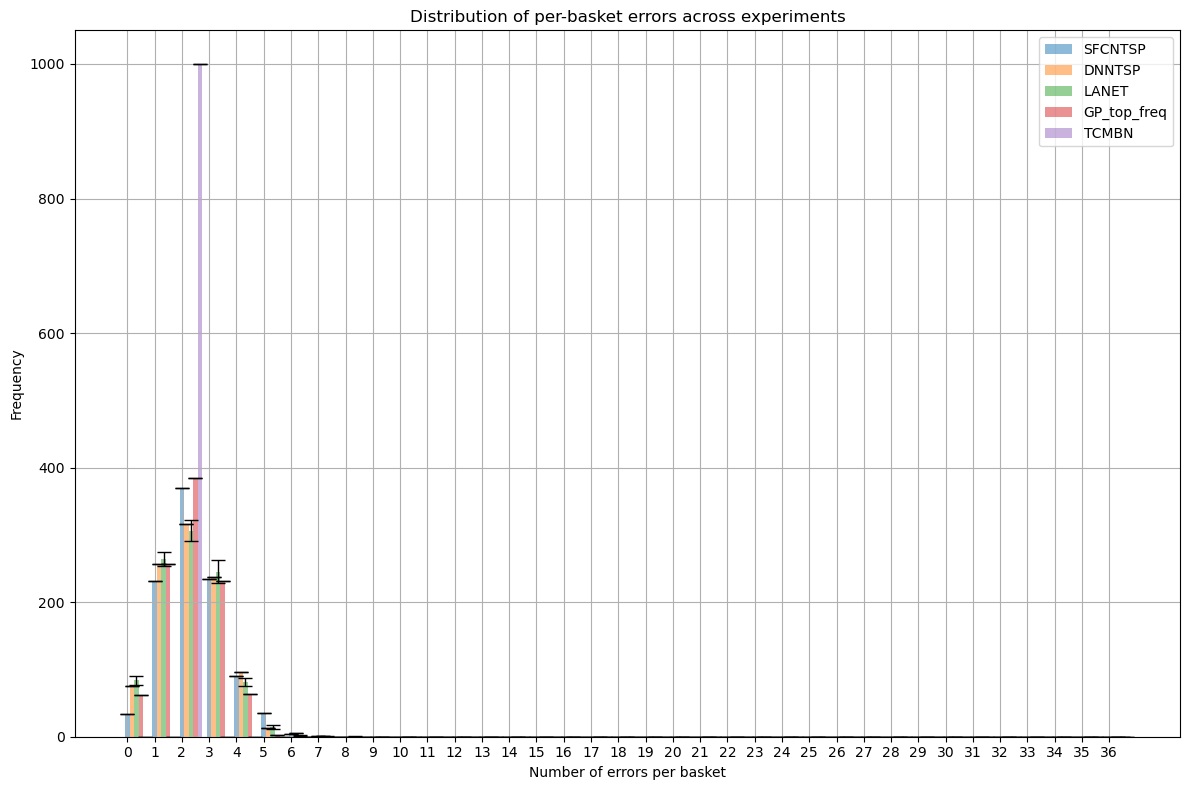

SFCNTSP    DNNTSP     LANET  GP_top_freq     TCMBN
weighted f1(mean)       0.301156  0.370371  0.449090     0.335685  0.000000
weighted f1(std)        0.000000  0.000000  0.020072     0.000000  0.000000
hamming_loss(mean)      0.062389  0.058000  0.056500     0.055111  0.055556
hamming_loss(std)       0.000000  0.000000  0.000389     0.000000  0.000000
weighted ROC AUC(mean)  0.728260  0.728466  0.802943     0.716410  0.551965
weighted ROC AUC(std)   0.000000  0.000000  0.007490     0.000000  0.000000

In [20]:
# У обьекта класса ModelComparison вызываете метод evaluate_and_save
# он построит все графики, посчитает метрики и сохранит их
# при подсчете будут использованы метрики,  которые вы перечислили в массивах выше
# также есть именованные параметры show и save
# show отвечает за вывод графиков(при False, графики не будут выведены),
# нужен чтобы не засорять вывод если нужно
# save отвечает за сохранение


test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)

## Synthea

In [12]:
test_comp = eval_dataset('synthea_preprocessed')

Running tests... 
Experiments are performed on dataset with common name
Max set sizes are equal between datasets
All checks are succesful
Done


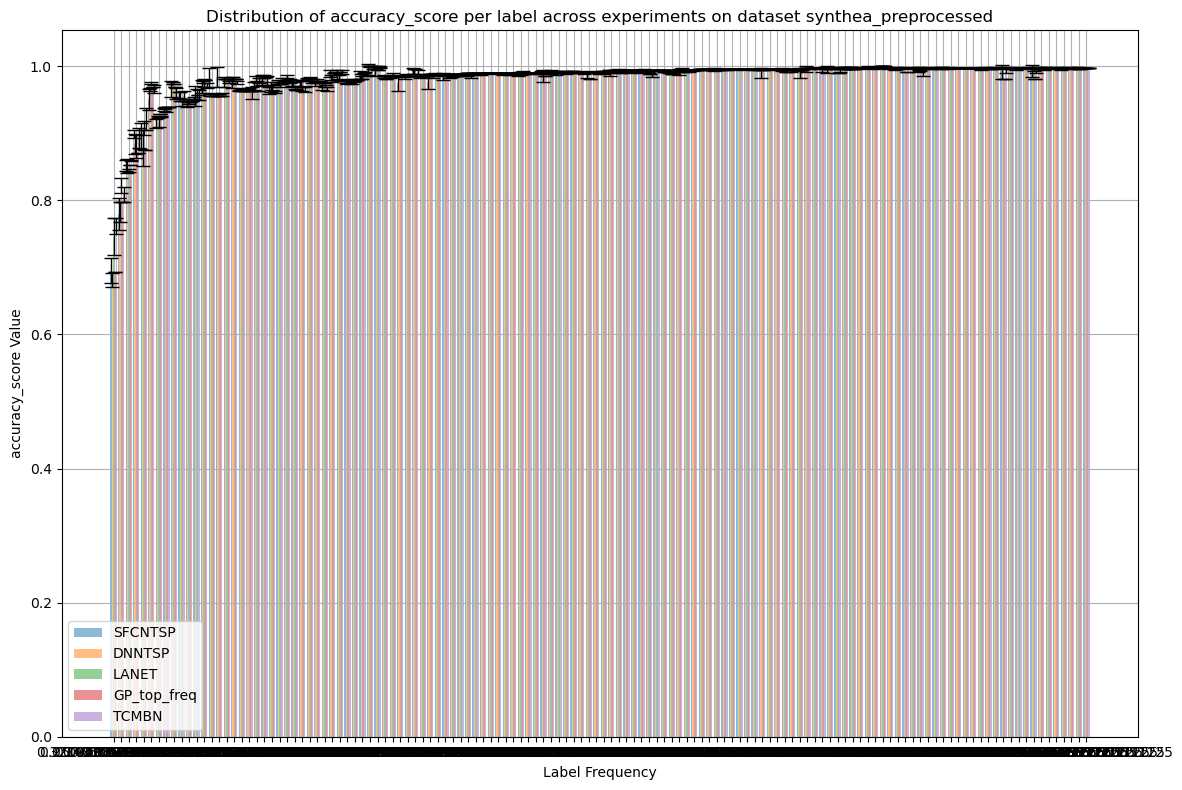

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

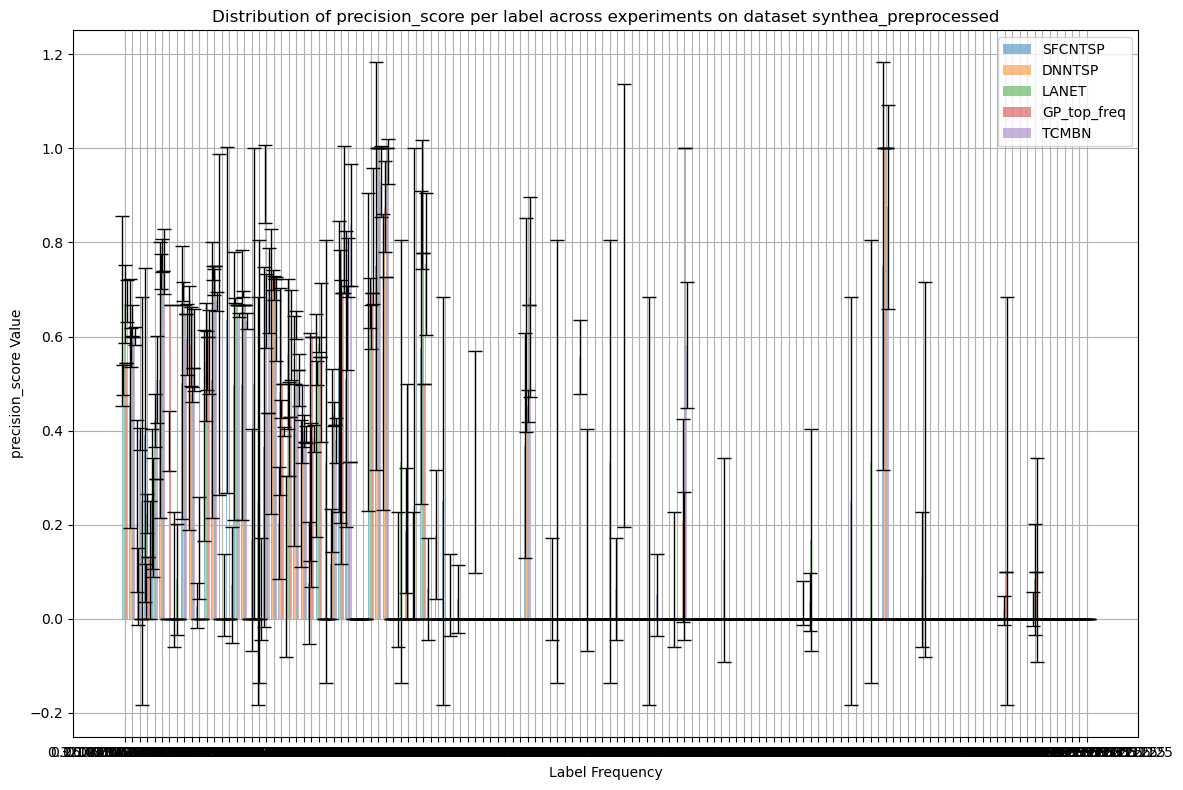

130
[0.00817996 0.00817996 0.00204499 0.01431493 0.00204499 0.01022495
 0.00408998 0.00204499 0.00204499 0.01022495 0.0408998  0.00204499
 0.00408998 0.01840491 0.00408998 0.00613497 0.00204499 0.00204499
 0.00204499 0.02249489 0.00204499 0.00204499 0.0204499  0.00817996
 0.00204499 0.03680982 0.00204499 0.01431493 0.00613497 0.02862986
 0.07566462 0.01022495 0.00204499 0.00204499 0.02249489 0.06134969
 0.01022495 0.04907975 0.00613497 0.02249489 0.0204499  0.01635992
 0.02249489 0.04498978 0.00817996 0.00817996 0.01226994 0.00613497
 0.00613497 0.00613497 0.00408998 0.01431493 0.01431493 0.01022495
 0.01022495 0.0204499  0.0204499  0.00204499 0.00204499 0.03271984
 0.03680982 0.02249489 0.0204499  0.00204499 0.00613497 0.05316973
 0.05112474 0.00204499 0.00204499 0.00204499 0.01226994 0.00204499
 0.25766871 0.01226994 0.00613497 0.32106339 0.03271984 0.02453988
 0.00204499 0.07361963 0.01431493 0.00613497 0.00204499 0.00204499
 0.00408998 0.00817996 0.00613497 0.01226994 0.00408998 0.

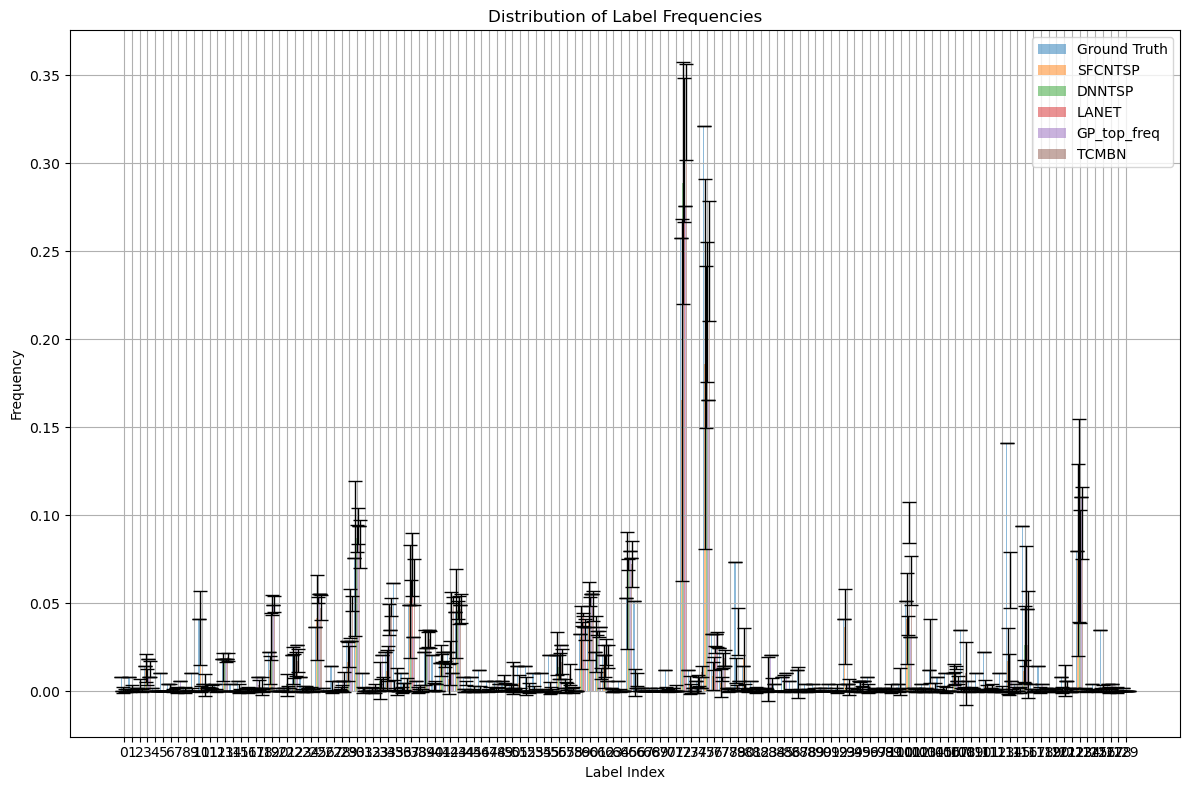

SFCNTSP caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.2525907427704613, 0.1584011859372747, 0.1209900596826644, 0.2074344919631901, 0.11407709199045346, 0.23813403563968163, 0.240035804620894, 0.1821510701195]
DNNTSP caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.13819269959814165, 0.018147416409755496, 0.012715158944828176, 0.06215109803663161, 0.06773763179436415, 0.11369205363166292, 0.22316963839196408, 0.048112522432468816]
LANET caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.13608276348795434, 0.0143639601799777, 0.004905720992100646, 0.027447340579241867, 0.051175897003555286, 0.12480437367032772, 0.15590239111558088, 0.13857990321384964]
GP_top_freq caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TCMBN caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.1443375672

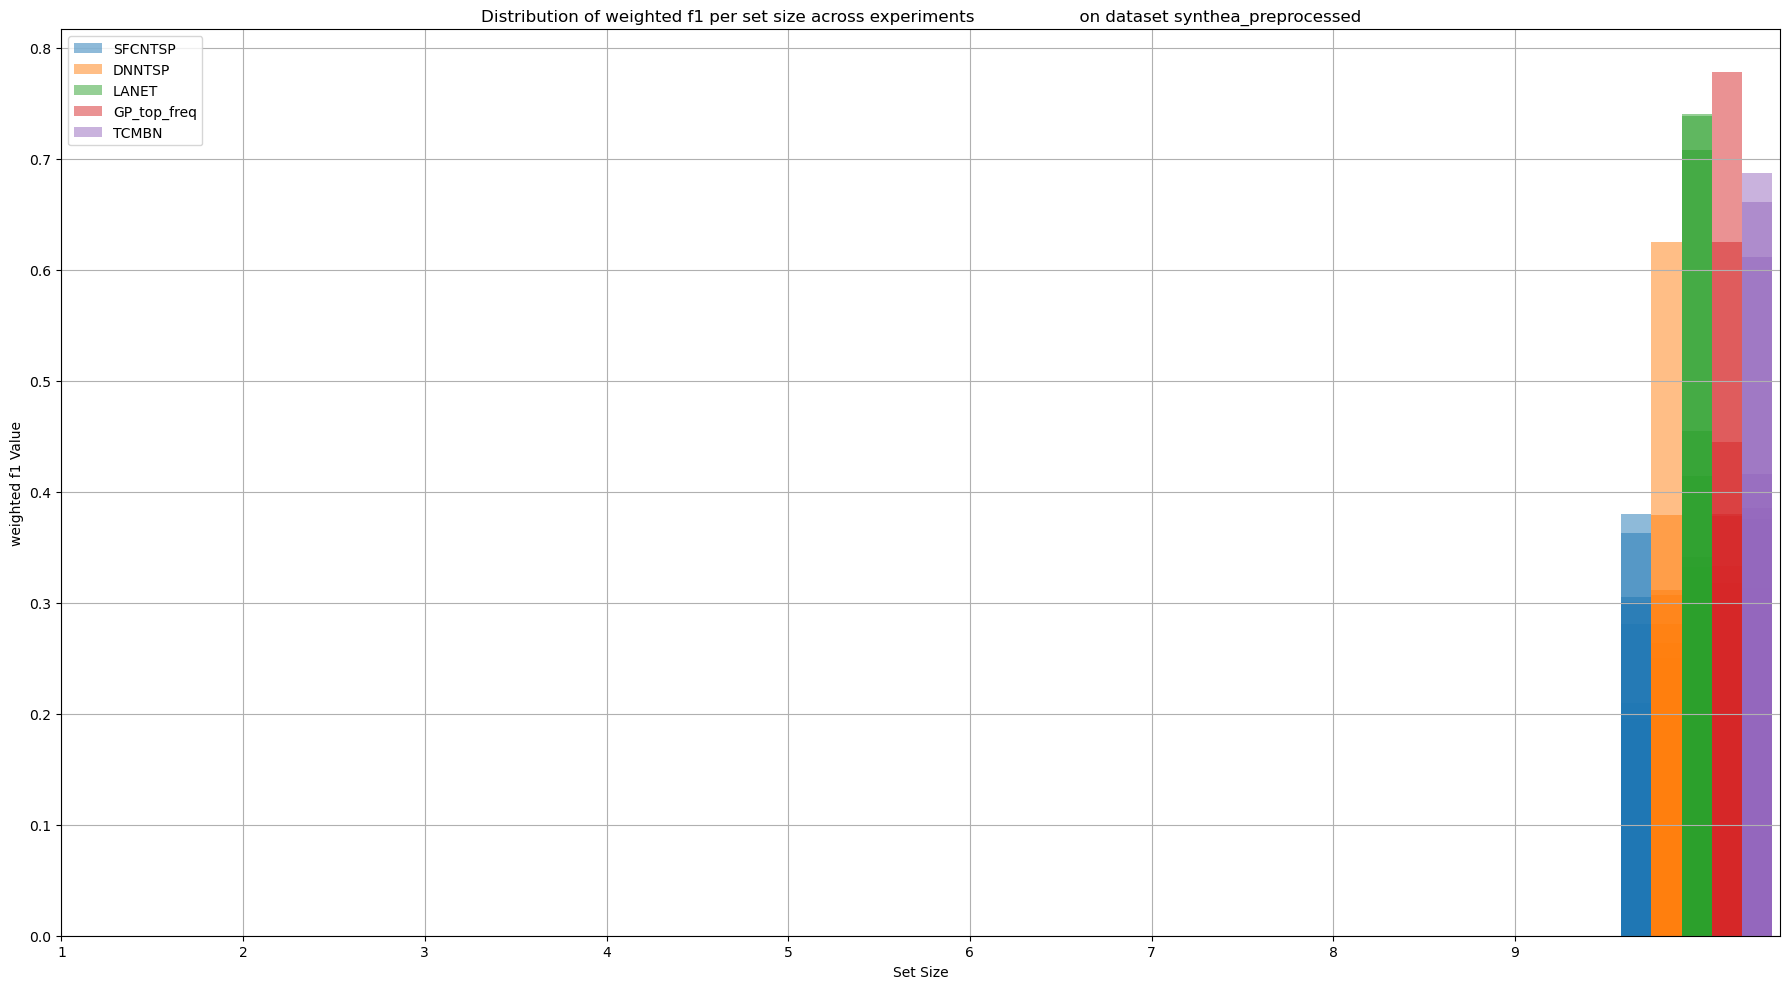

SFCNTSP caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.005624977171405206, 0.0009533128931668036, 0.0007935025014344483, 0.004379494440377864, 0.001998520162579472, 0.007557580847789486, 0.013323467750529828, 0.01373351620873625]
DNNTSP caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.0009065471553673679, 0.0007507524645275117, 0.0008756442911534621, 0.0018318639032547655, 0.0028175975610046046, 0.007336873809140768, 0.012162606385262998, 0.003330866937632457]
LANET caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.00104679048836888, 0.0005259507141566159, 0.0006002322032830901, 0.0015206597444871993, 0.0026148818018424547, 0.0073524147581560916, 0.009593993299420362, 0.009593993299420362]
GP_top_freq caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
TCMBN caused an error in plot_metric_per_set_size: 'x' and 'y

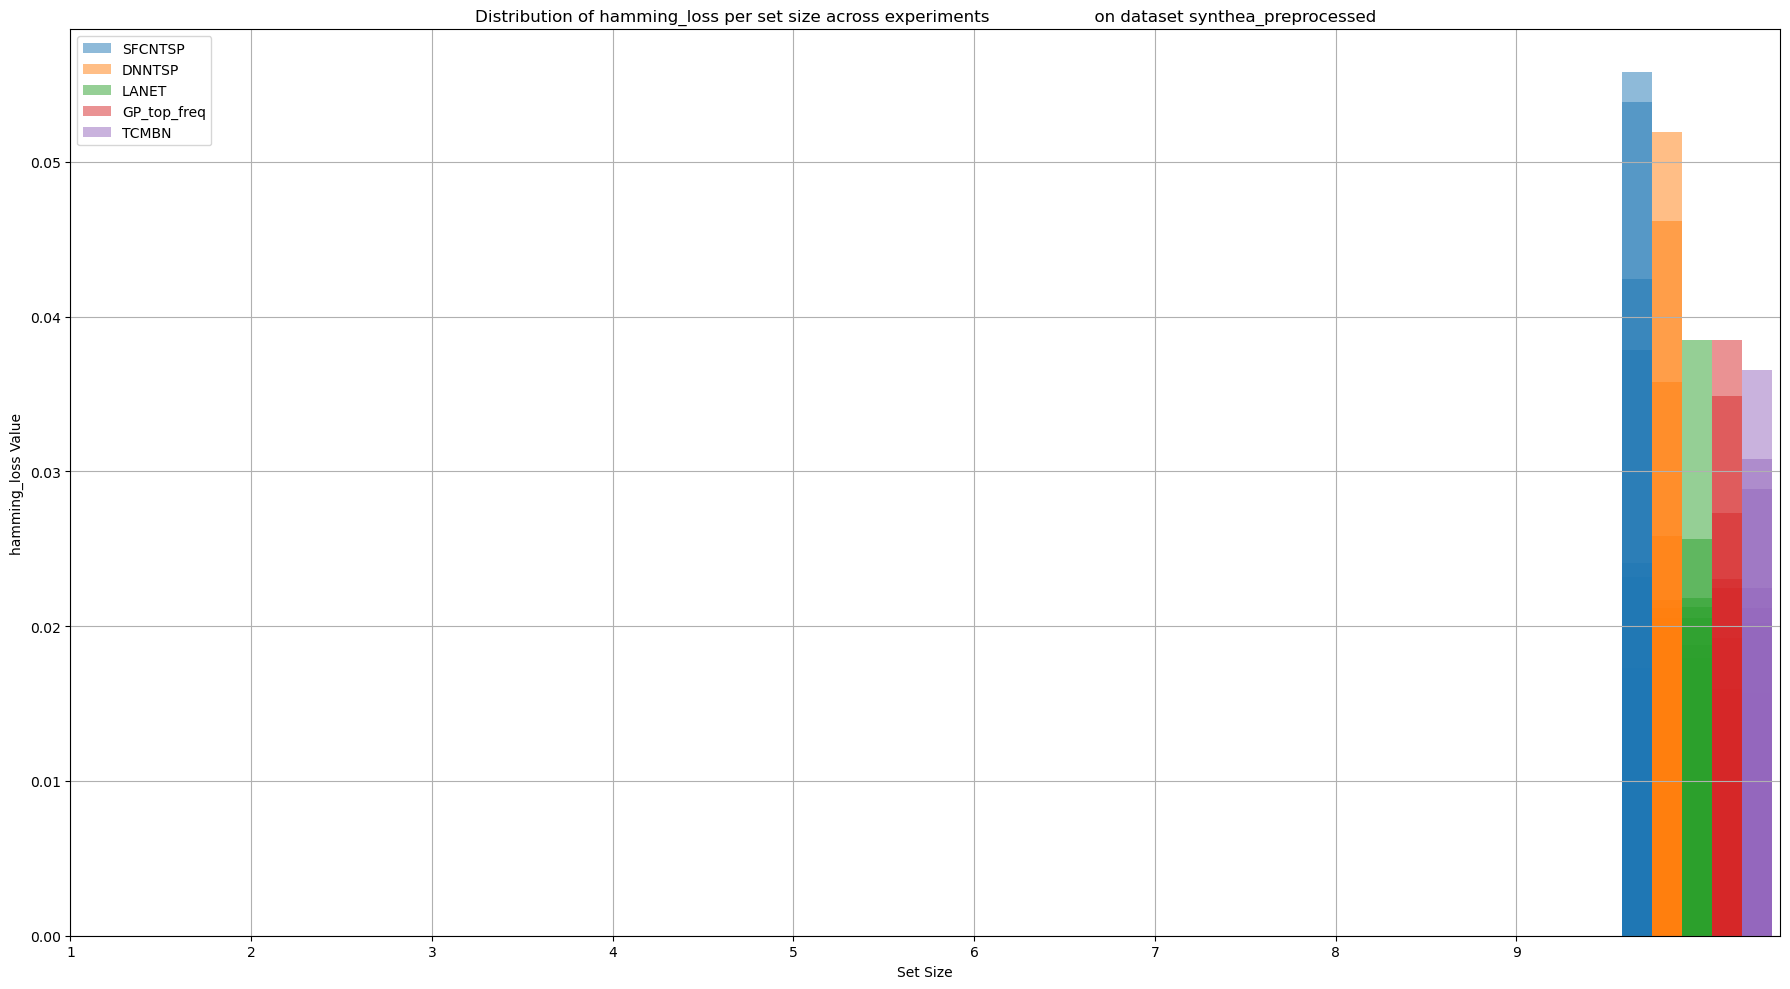

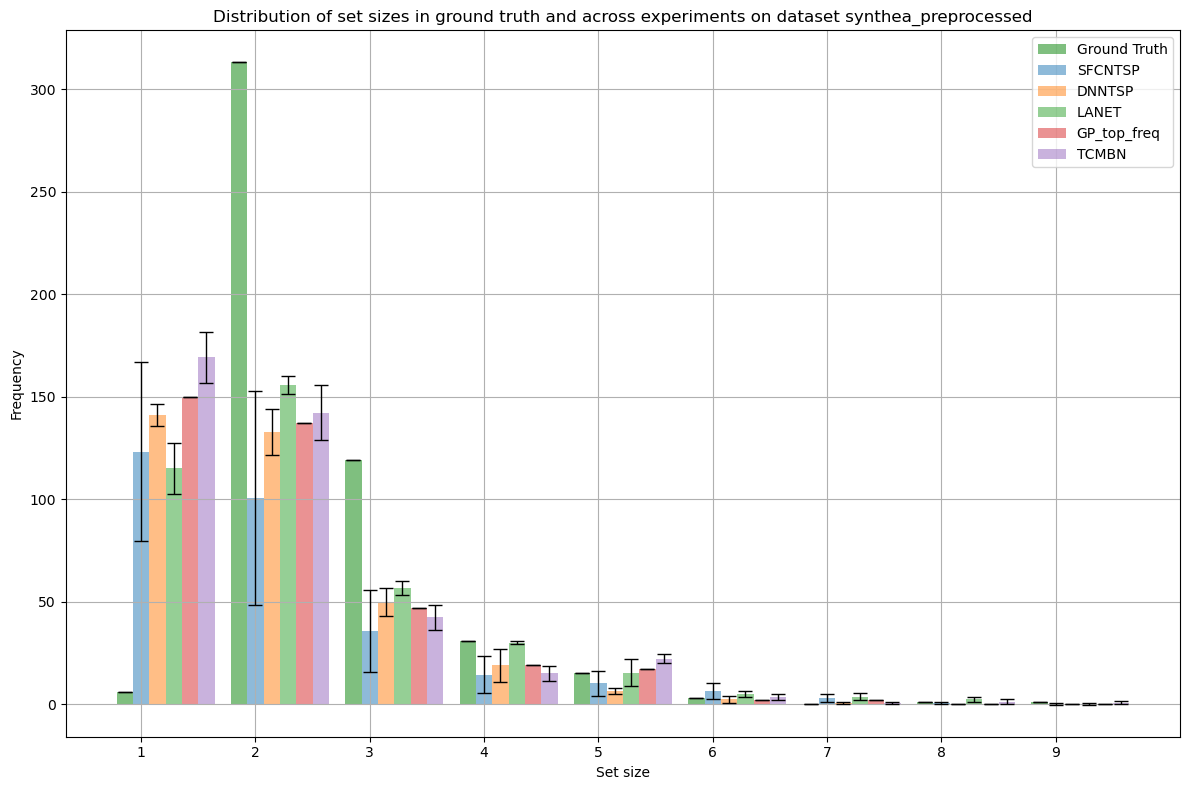

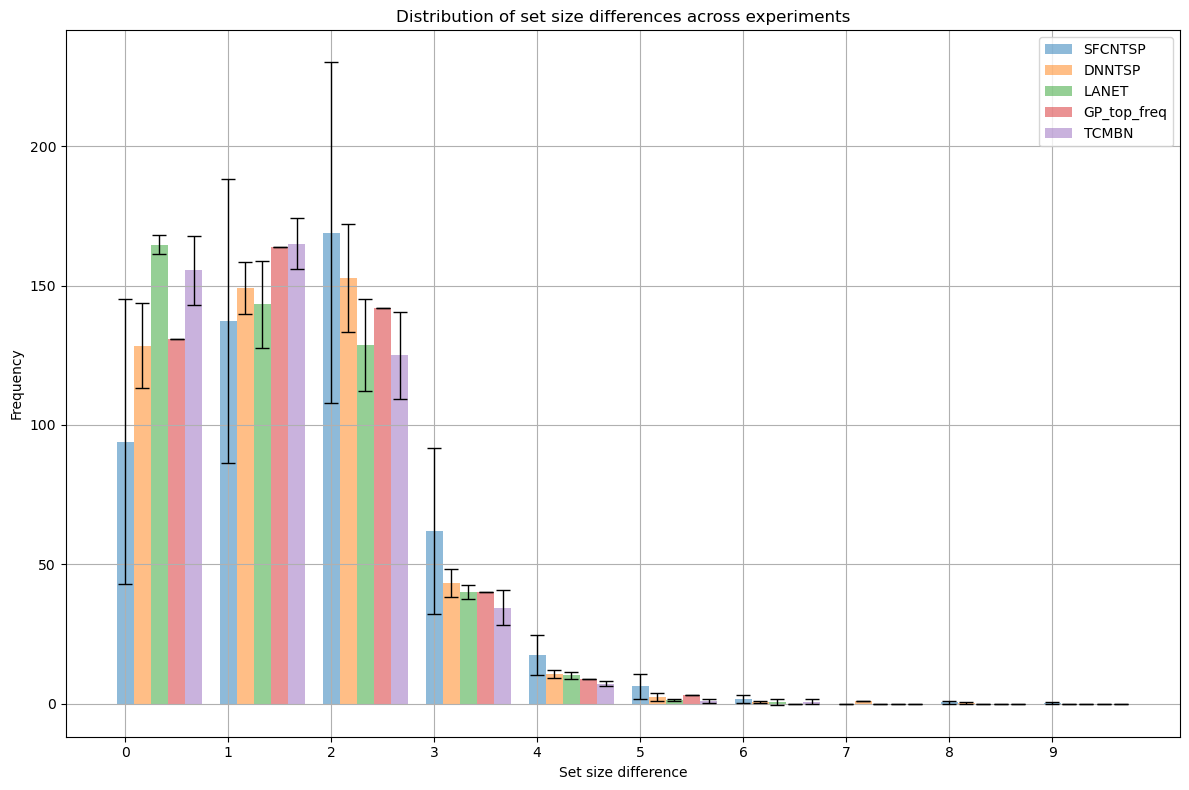

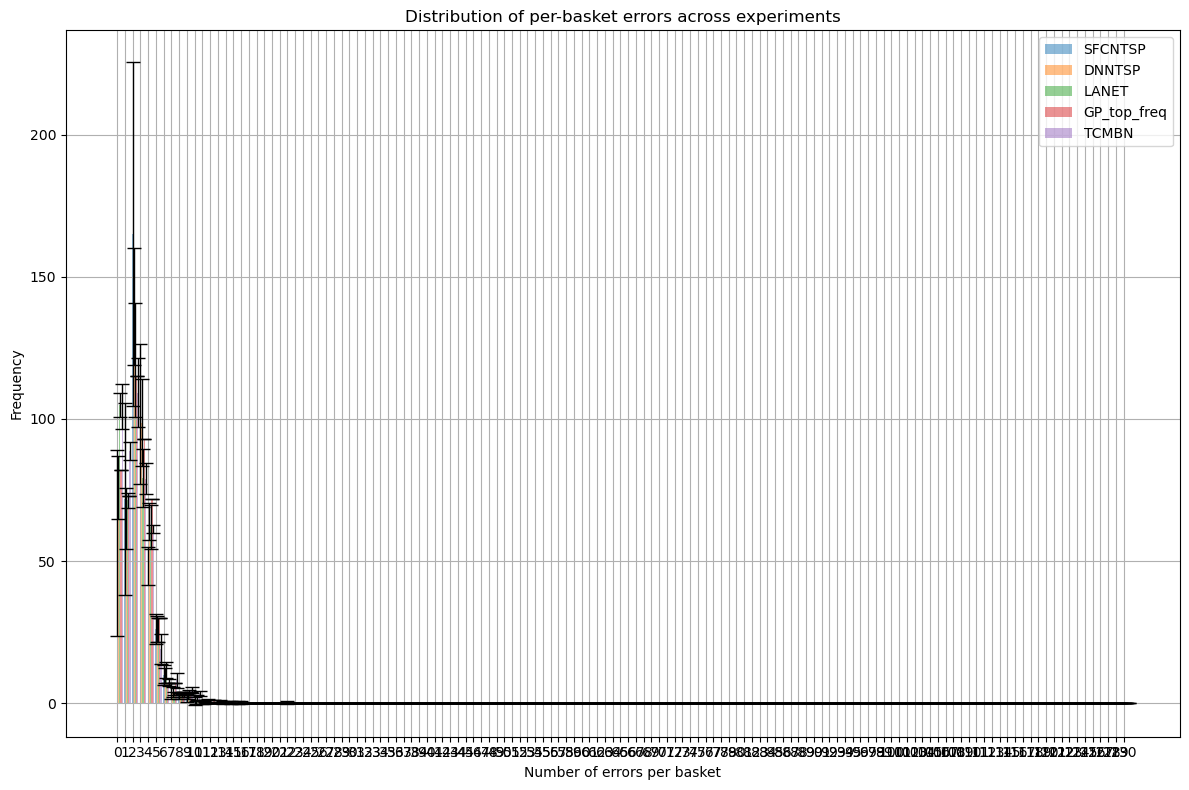

SFCNTSP    DNNTSP     LANET  GP_top_freq     TCMBN
weighted f1(mean)       0.260988  0.298240  0.376600     0.307972  0.355120
weighted f1(std)        0.141368  0.013184  0.011101     0.000000  0.009880
hamming_loss(mean)      0.018487  0.018311  0.017545     0.018893  0.017296
hamming_loss(std)       0.000903  0.000647  0.000525     0.000000  0.000348
weighted ROC AUC(mean)  0.712795  0.706965  0.870165     0.719051  0.830438
weighted ROC AUC(std)   0.140099  0.007554  0.008284     0.000000  0.005744

In [13]:
test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)

In [16]:
for exp in test_comp.experiments:
    print(exp.get_metrics(metric_list[:1]))

{'weighted f1(mean)': 0.008633615814018995, 'weighted f1(std)': 0.004763098630056944}
{'weighted f1(mean)': 0.07916786171471073, 'weighted f1(std)': 0.013365936043561897}
{'weighted f1(mean)': 0.14154207070934857, 'weighted f1(std)': 0.021400352605959336}
{'weighted f1(mean)': 0.015752371584745222, 'weighted f1(std)': 0.010963143659883602}


## Instacart

In [5]:
# dataset_name = "instacart_preprocessed"
# dunnhumby_lanet = ProcessLANET(dataset_name)
# dunnhumby_lanet = DataClass(dunnhumby_lanet)
# dunnhumby_tcmbn = ProcessTCMBN(dataset_name)
# dunnhumby_tcmbn = DataClass(dunnhumby_tcmbn)
# dunnhumby_gp = ProcessGP(dataset_name)
# dunnhumby_gp = DataClass(dunnhumby_gp)

# test_comp = ModelComparison(dunnhumby_lanet, dunnhumby_tcmbn, dunnhumby_gp)

test_comp = eval_dataset("instacart_preprocessed")

Running tests... 
Experiments are performed on dataset with common name
Max set sizes are equal between datasets
All checks are succesful
Done


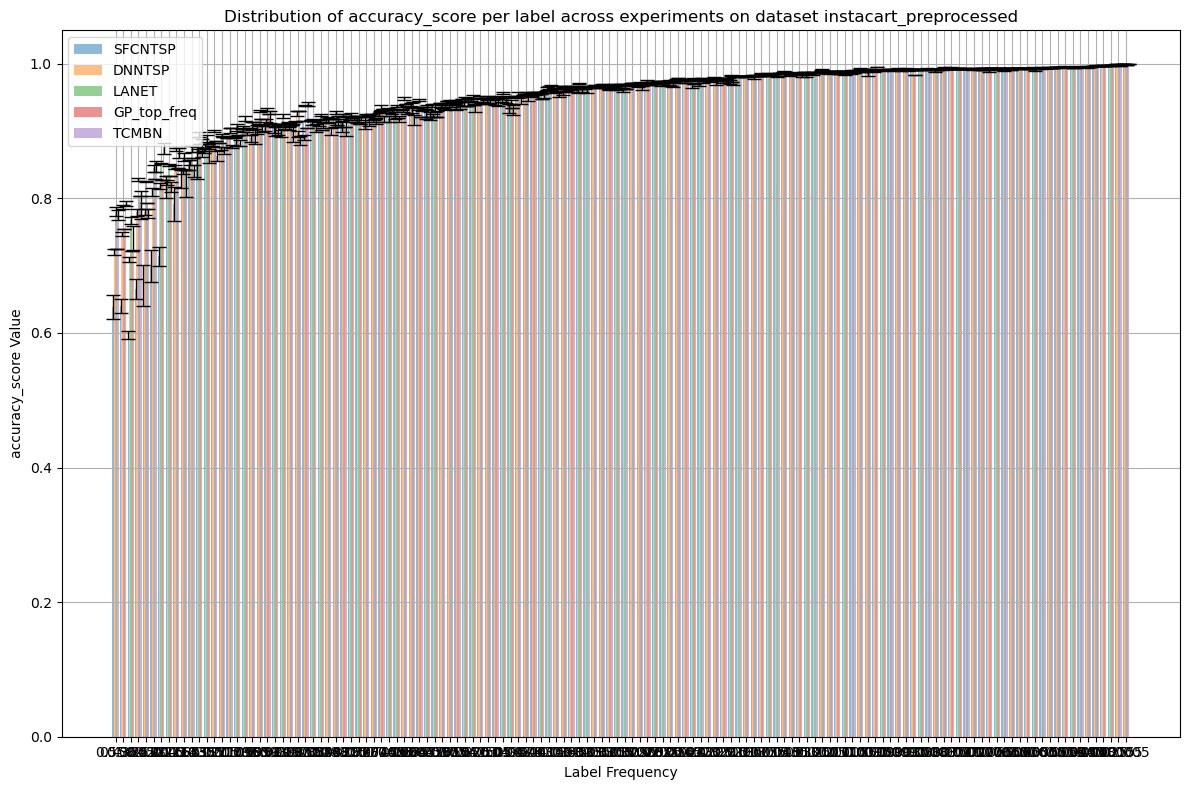

/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/app/miniconda3/envs/main/lib/python3.11/site-packages/sklearn/metrics/_classifica

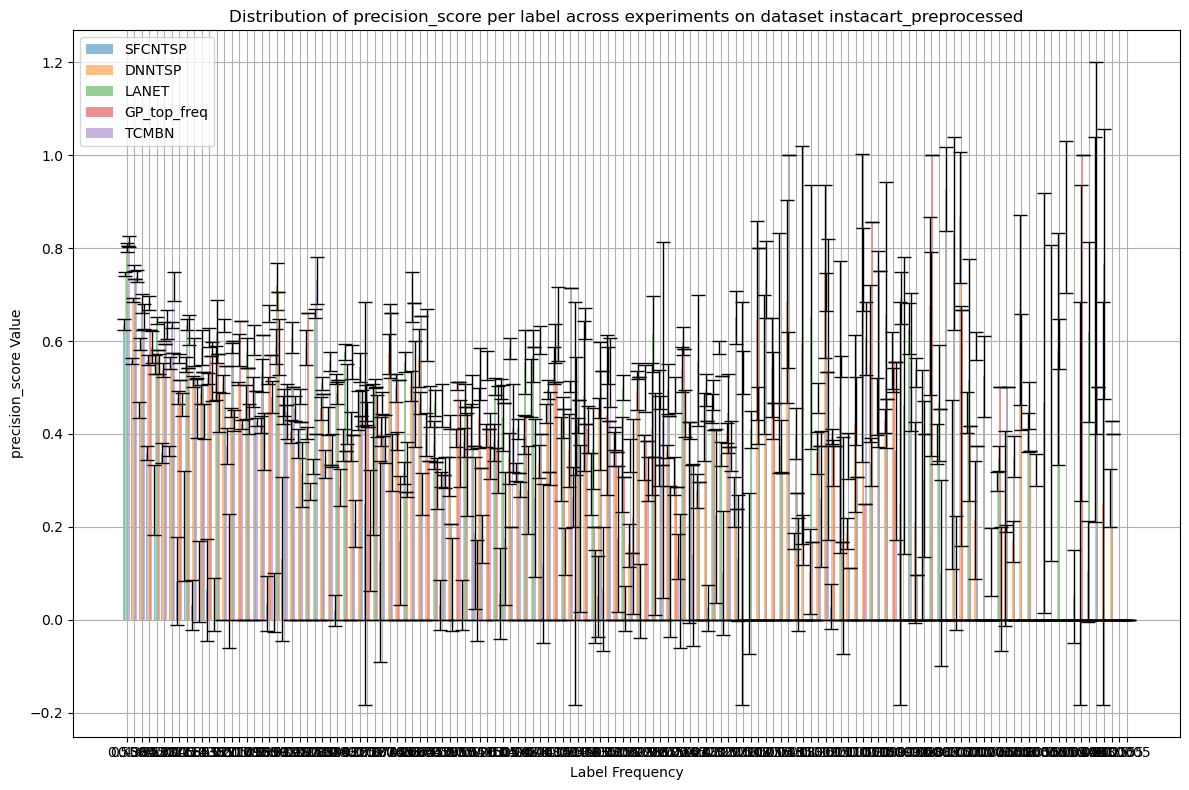

134
[2.150e-02 2.400e-02 8.900e-02 6.050e-02 1.800e-02 1.150e-02 1.400e-02
 9.500e-03 6.500e-02 3.000e-03 9.000e-03 1.300e-02 2.250e-02 3.400e-02
 8.500e-03 9.150e-02 6.850e-02 6.000e-03 7.800e-02 2.250e-02 2.385e-01
 8.000e-03 5.100e-02 5.590e-01 1.850e-02 6.650e-02 9.000e-03 9.000e-03
 2.300e-02 3.000e-02 1.325e-01 8.550e-02 7.000e-03 2.250e-02 4.300e-02
 8.050e-02 1.220e-01 9.250e-02 6.500e-03 7.000e-03 1.200e-02 3.250e-02
 3.450e-02 4.000e-03 7.400e-02 8.000e-03 1.400e-02 2.150e-02 4.450e-02
 4.950e-02 3.150e-02 6.450e-02 8.150e-02 7.700e-02 5.500e-03 1.100e-02
 2.550e-02 1.700e-02 7.650e-02 1.350e-02 5.500e-02 9.000e-03 4.800e-02
 2.400e-02 1.000e-02 4.550e-02 1.115e-01 7.500e-03 8.750e-02 6.500e-03
 1.600e-02 5.850e-02 7.500e-03 3.300e-02 2.800e-02 4.500e-03 9.300e-02
 1.185e-01 4.950e-02 5.000e-03 7.800e-02 5.000e-04 4.370e-01 2.090e-01
 1.800e-02 1.435e-01 5.500e-03 8.450e-02 3.200e-02 7.000e-03 1.680e-01
 4.100e-02 6.850e-02 5.550e-02 2.650e-02 1.095e-01 8.000e-03 9.600e-02
 2

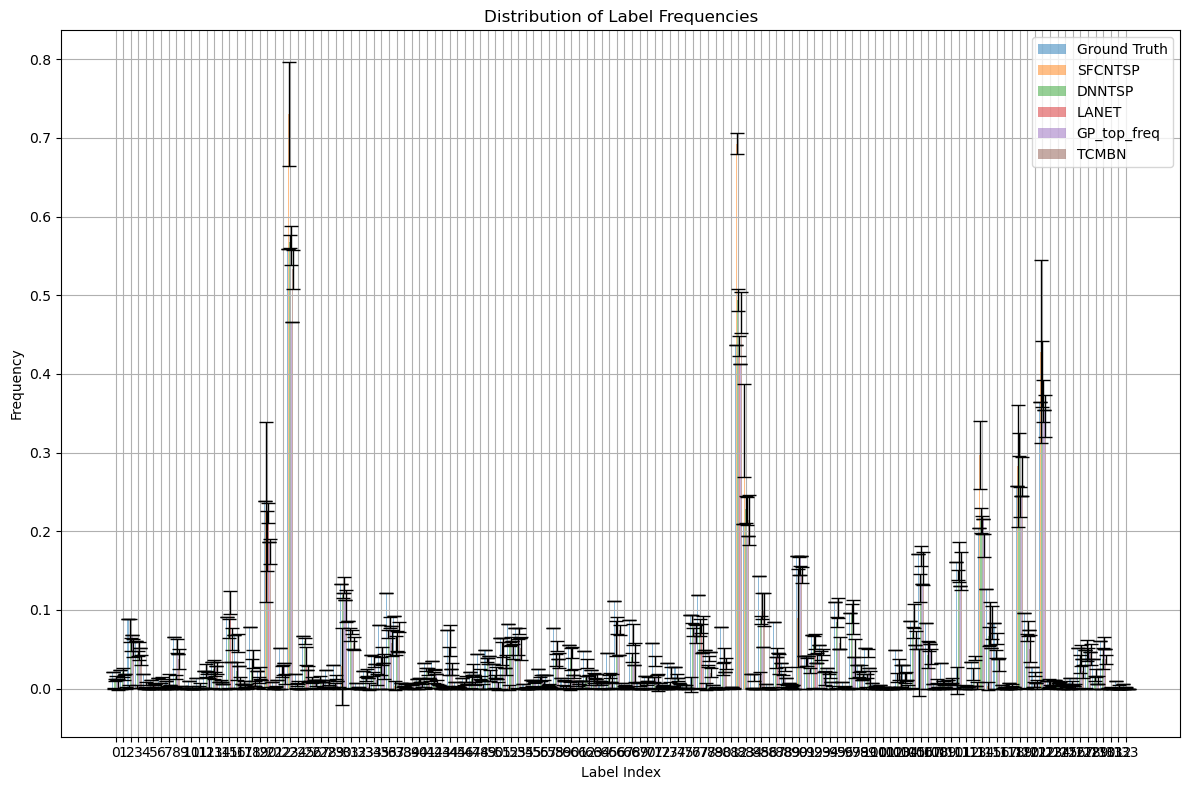

SFCNTSP caused an error in plot_metric_per_set_size: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (43,) and arg 1 with shape (37,).
[0.05939148535813592, 0.09288951778701106, 0.12946658127685334, 0.156412353526095, 0.1595395644337342, 0.19706137715341115, 0.17407549310048825, 0.1842996906620067, 0.1893732144172605, 0.19658950443086462, 0.19751460329723636, 0.20992493540328502, 0.16956133220770678, 0.19025087227332127, 0.16897457168210245, 0.16294446535700635, 0.1524254652818675, 0.154241462180207, 0.1755639097744361, 0.1857333863987784, 0.15845379818594102, 0.16060606060606059, 0.19066102117344352, 0.1769240019240019, 0.11166666666666666, 0.15724999969505465, 0.16882716049382715, 0.08035714285714285, 0.13381226053639847, 0.18666666666666668, 0.07258064516129031, 0.1328125, 0.13970588235294115, 0.1357142857142857, 0.10416666666666666, 0.10625000000000001, 0.11627906976744184]
SFCNTSP caused an error in plot_metric_per_set_size: 'x'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TCMBN caused an error in plot_metric_per_set_size: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (43,) and arg 1 with shape (37,).
[0.28609822864250106, 0.2854797902658971, 0.282128068104938, 0.28767398652830706, 0.30298517551518805, 0.3221479567520332, 0.3151634353109984, 0.31800569749670976, 0.34481740803751215, 0.35429944464000923, 0.38322094108057725, 0.37853659631826264, 0.35840878539082777, 0.4110804193117712, 0.3963477724623976, 0.36447571464726336, 0.38652815961235737, 0.36224456391727616, 0.43114507046837874, 0.408501734802997, 0.3815117793642537, 0.4294949494949495, 0.4659707844490454, 0.44231190766905054, 0.37466666666666665, 0.514547320811057, 0.38839506172839505, 0.25, 0.4075862068965517, 0.5521481481481482, 0.4129032258064516, 0.51875, 0.3941176470588236, 0.45714285714285713, 0.34444444444444444, 0.255, 0.5255813953488373]
TCMBN caused an error in plot_metric_per_set_size: 'x' and 'y' must have the same size
[0.023037

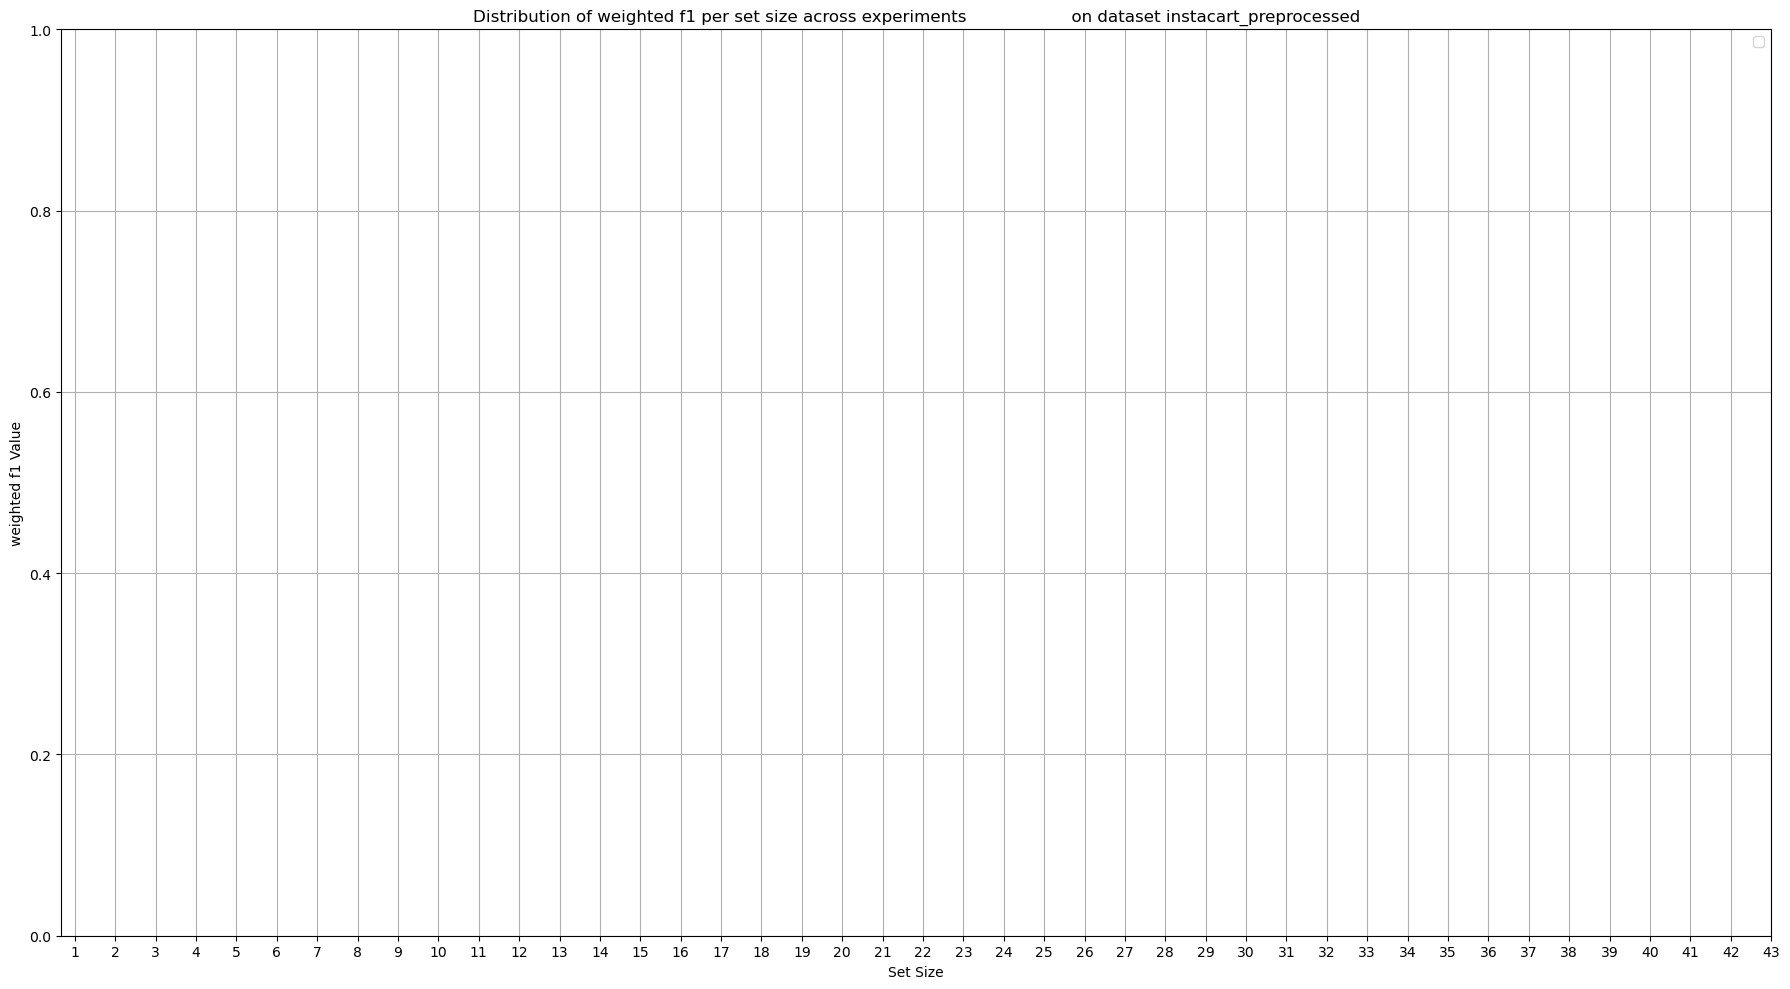

SFCNTSP caused an error in plot_metric_per_set_size: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (43,) and arg 1 with shape (37,).
[0.01976035316375867, 0.026079707843759924, 0.031053747655166792, 0.03747173224785165, 0.04363654699475595, 0.04823340922506113, 0.05451401528940663, 0.06017986988136242, 0.06600195742598483, 0.07145018152480839, 0.07738198542172857, 0.0808457711442786, 0.09065998134328358, 0.09429824561403508, 0.10284514925373134, 0.10936695831188883, 0.11855495251017639, 0.12386437378325763, 0.12593283582089554, 0.12973593570608496, 0.14132462686567165, 0.14676616915422885, 0.148454157782516, 0.15609452736318408, 0.16791044776119404, 0.17190831556503197, 0.17101990049751242, 0.21455223880597016, 0.19527363184079602, 0.1859452736318408, 0.2332089552238806, 0.21268656716417908, 0.22667910447761197, 0.22574626865671643, 0.24067164179104478, 0.26679104477611937, 0.2835820895522388]
SFCNTSP caused an error in plot_metric

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


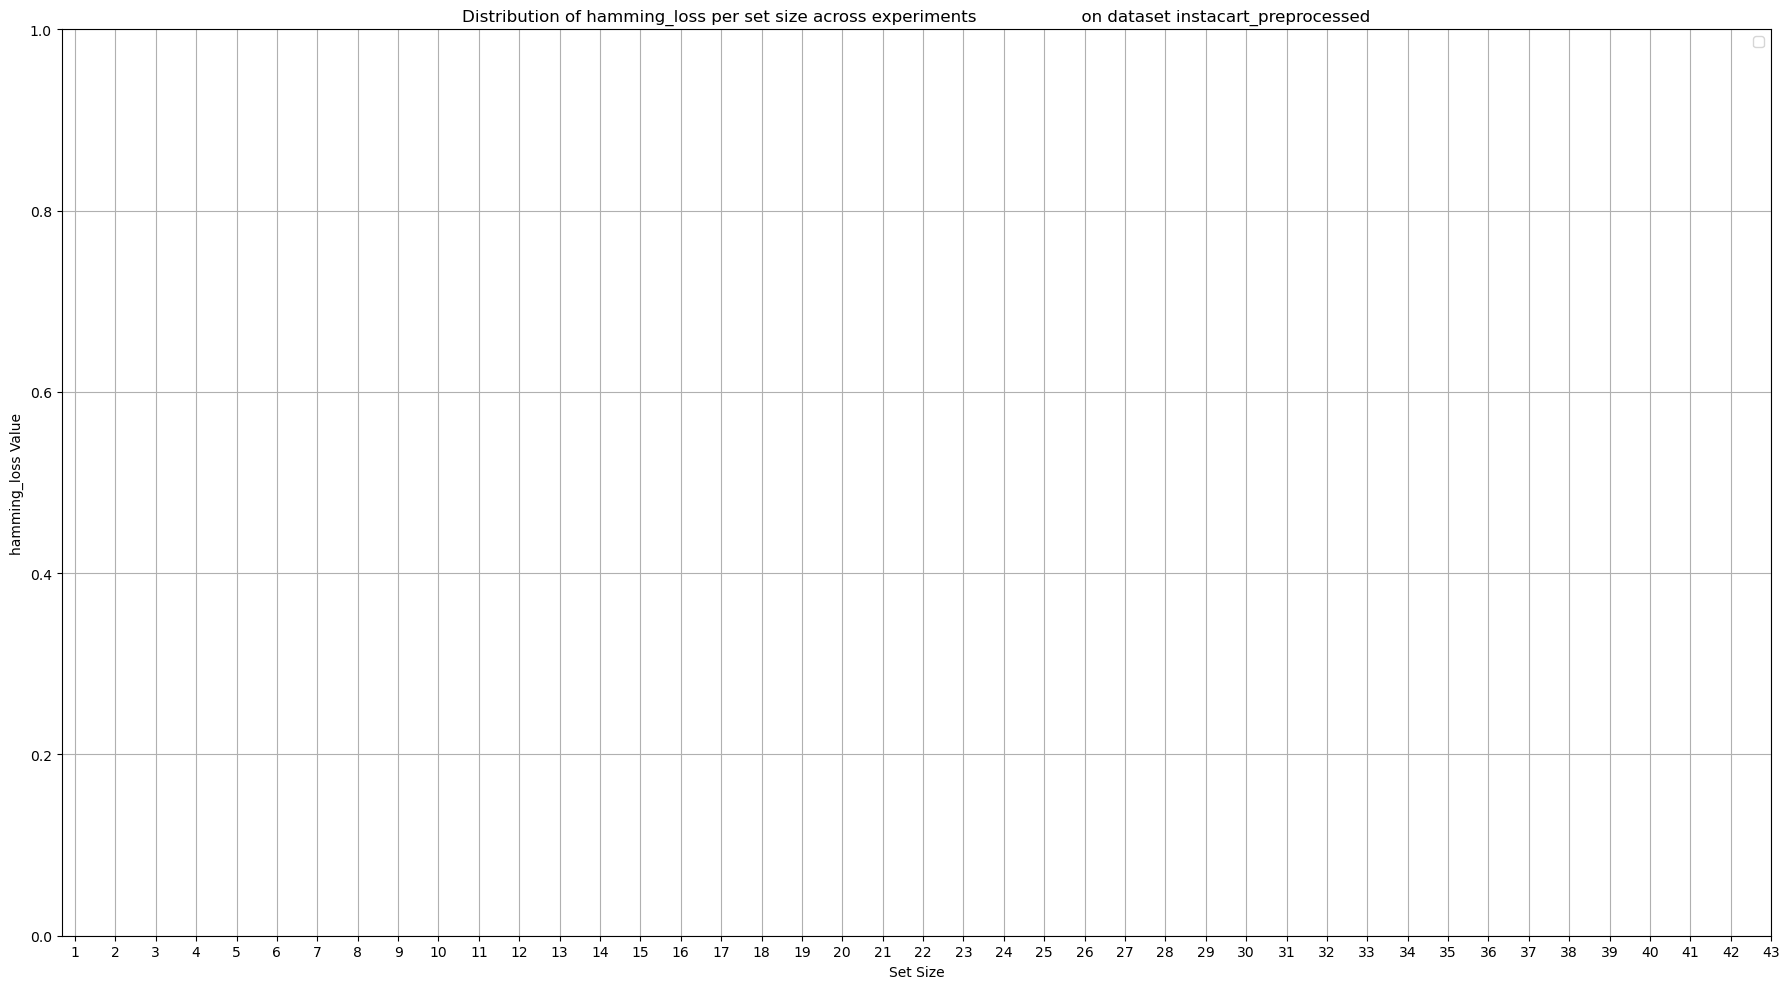

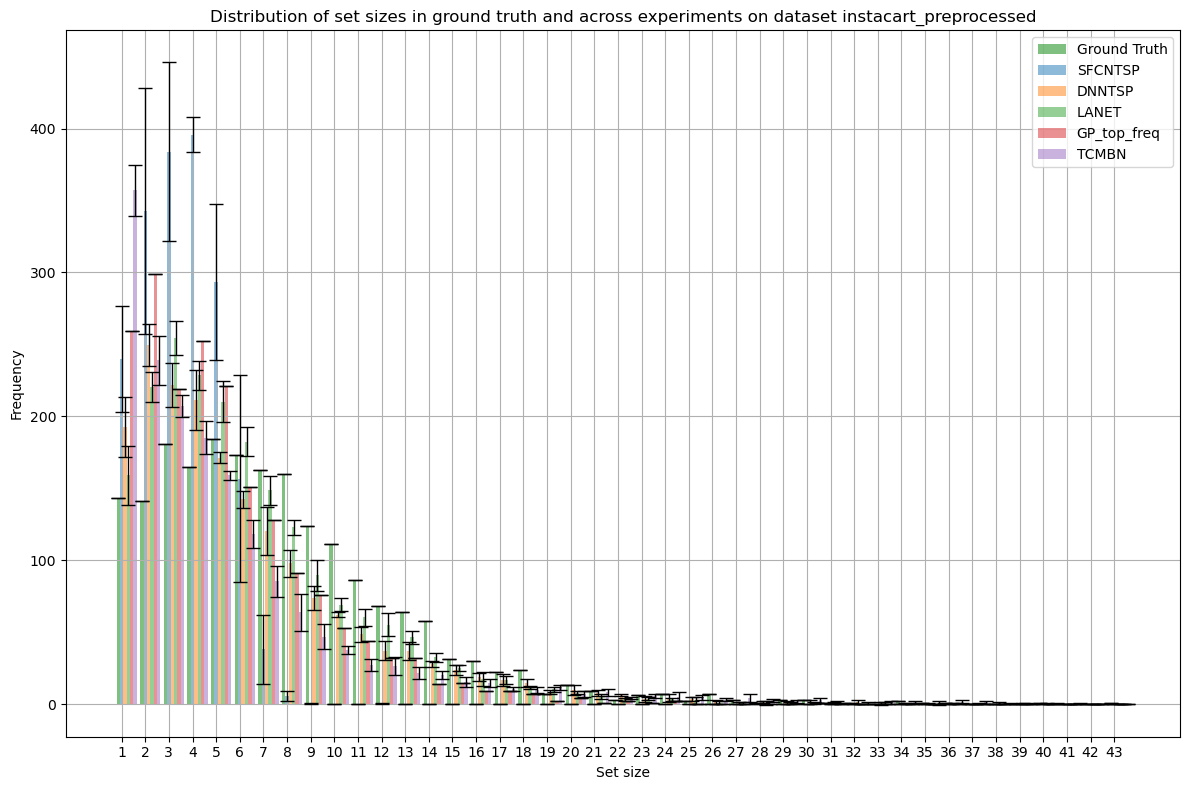

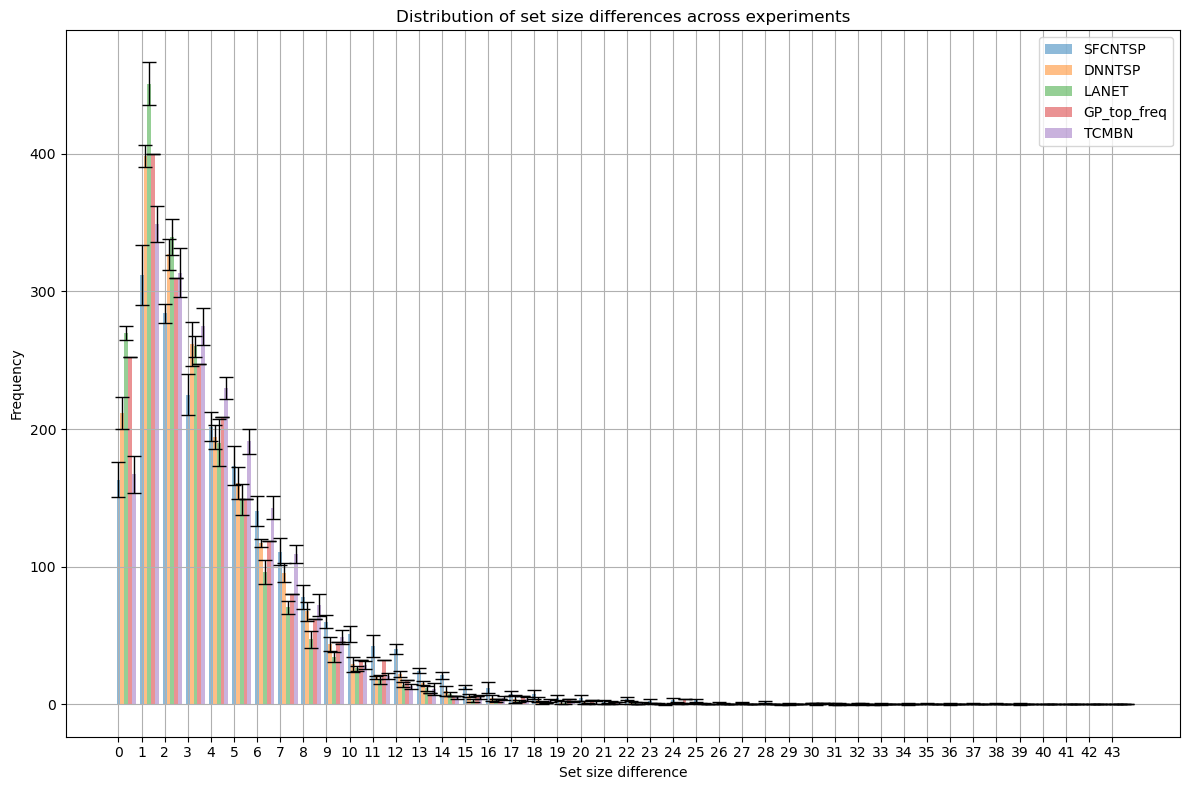

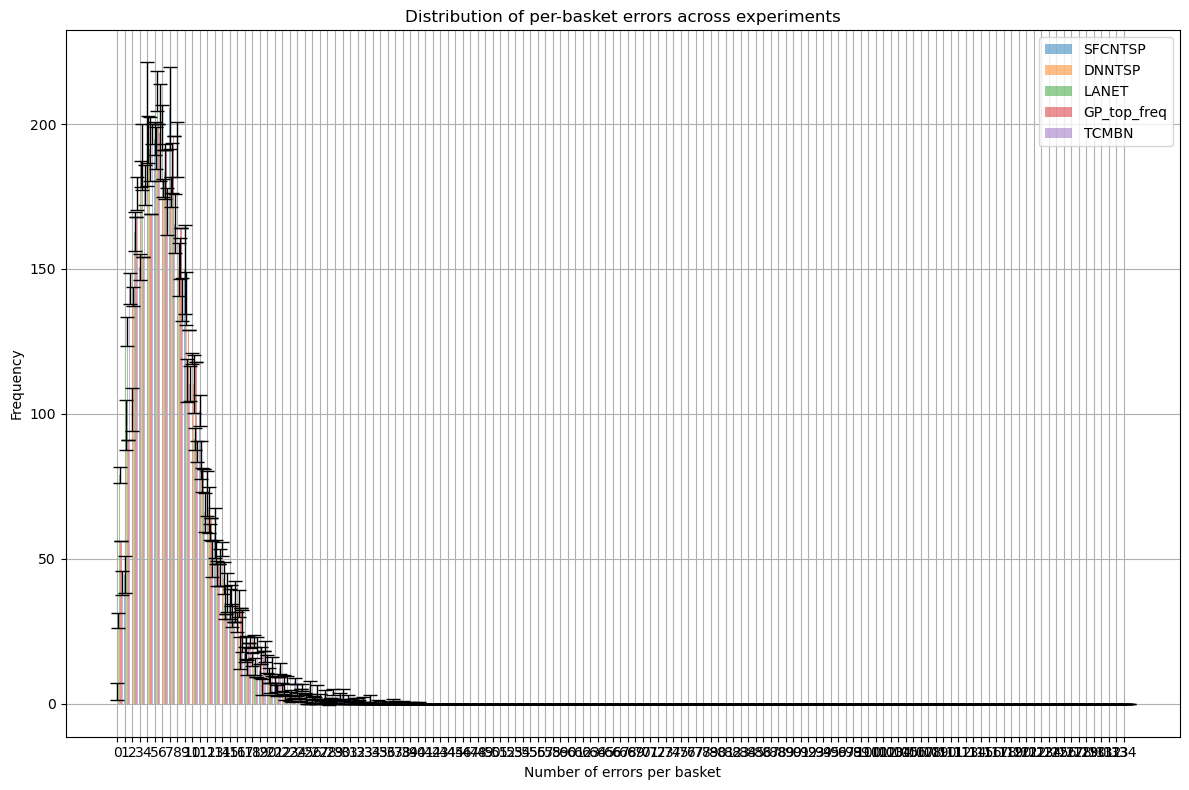

SFCNTSP    DNNTSP     LANET  GP_top_freq     TCMBN
weighted f1(mean)       0.167248  0.416028  0.525129     0.411151  0.368697
weighted f1(std)        0.011237  0.000856  0.001592     0.000000  0.006474
hamming_loss(mean)      0.058084  0.054123  0.047435     0.052108  0.052966
hamming_loss(std)       0.000411  0.000240  0.000336     0.000000  0.000537
weighted ROC AUC(mean)  0.685188  0.791311  0.914461     0.779899  0.818697
weighted ROC AUC(std)   0.044770  0.000446  0.000561     0.000000  0.003012
ndcg 10(mean)           0.475218  0.594229  0.723255     0.594051  0.574032
ndcg 10(std)            0.021572  0.005924  0.000586     0.000000  0.002400

In [6]:
test_comp.evaluate_and_save(metric_list_for_set_sizes, metric_list_for_labels, metric_list, figsize=(12,8),show=True)